In [1]:
from numpy import array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from fitter import Fitter

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import SpectralClustering
from sklearn import tree

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

import time

import synthgauge as sg

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.preprocessing import PolynomialFeatures

from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
crit = pd.read_excel('C:/Users/ursuz/OneDrive/Escritorio/Tesis/critica.xlsx', index_col=0)
sale = pd.read_excel('C:/Users/ursuz/OneDrive/Escritorio/Tesis/vgsales.xlsx', index_col=0)

crit['name'] = crit['name'].str.lower()
sale['name'] = sale['name'].str.lower()

baseuni = pd.merge(crit, sale, on = ["name","platform"])
baseuni

name platform        release_date  \
0     the legend of zelda: ocarina of time      N64   November 23, 1998   
1                 tony hawk's pro skater 2       PS  September 20, 2000   
2                      grand theft auto iv      PS3      April 29, 2008   
3                              soulcalibur       DC   September 8, 1999   
4                       grand theft auto v      PS3  September 17, 2013   
...                                    ...      ...                 ...   
3433                 batman: dark tomorrow       XB      March 18, 2003   
3434  gravity games bike: street vert dirt      PS2       June 27, 2002   
3435               legends of wrestling ii      GBA   November 25, 2002   
3436                           pulse racer       XB     January 2, 2003   
3437                      charlie's angels       GC        July 9, 2003   

                                                summary  meta_score  \
0     As a young boy, Link is tricked by Ganondorf, ...        99.0   
1     As most major publishers' development efforts ...        98.0   
2     [Metacritic's 2008 PS3 Game of the Year; Also ...        98.0   
3     This is a tale of souls and swords, transcendi...        98.0   
4     Los Santos is a vast, sun-soaked metropolis fu...        97.0   
...                                                 ...         ...   
3433  Batman, the Dark Knight detective of Gotham Ci...        25.0   
3434  Gravity Games Bike: Street. Vert. Dirt. delive...        24.0   
3435  Legends of Wrestling II takes you through the ...        24.0   
3436  Pulse Racer takes you to a future where racers...        24.0   
3437  Join Natalie, Dylan, and Alex for an intense a...        23.0   

     user_review  Year     Genre              Publisher  NA_Sales  EU_Sales  \
0            9.1  1998    Action               Nintendo      4.10      1.89   
1            7.4  2000    Sports             Activision      3.05      1.41   
2            7.7  2008    Action   Take-Two Interactive      4.76      3.76   
3            8.4  1999  Fighting     Namco Bandai Games      0.00      0.00   
4            8.3  2013    Action   Take-Two Interactive      7.01      9.27   
...          ...   ...       ...                    ...       ...       ...   
3433         3.3  2003    Action                  Kemco      0.08      0.02   
3434         3.4  2002    Sports           Midway Games      0.05      0.04   
3435         3.6  2002  Fighting  Acclaim Entertainment      0.05      0.02   
3436         2.2  2003    Racing                 Jaleco      0.01      0.00   
3437         4.3  2003    Action                Ubisoft      0.01      0.00   

      JP_Sales  Other_Sales  Global_Sales  
0         1.45         0.16          7.60  
1         0.02         0.20          4.68  
2         0.44         1.62         10.57  
3         0.34         0.00          0.34  
4         0.97         4.14         21.40  
...        ...          ...           ...  
3433      0.00         0.00          0.11  
3434      0.00         0.01          0.10  
3435      0.00         0.00          0.07  
3436      0.00         0.00          0.02  
3437      0.00         0.00          0.02  

[3438 rows x 14 columns]

In [3]:
base2ausar = pd.DataFrame()
base2ausar = base2ausar.assign(Plataforma=baseuni['platform'], Ventas_norteamerica=baseuni['NA_Sales'], Calificacion_critica=baseuni['meta_score'])
base2ausar

Plataforma  Ventas_norteamerica  Calificacion_critica
0           N64                 4.10                  99.0
1            PS                 3.05                  98.0
2           PS3                 4.76                  98.0
3            DC                 0.00                  98.0
4           PS3                 7.01                  97.0
...         ...                  ...                   ...
3433         XB                 0.08                  25.0
3434        PS2                 0.05                  24.0
3435        GBA                 0.05                  24.0
3436         XB                 0.01                  24.0
3437         GC                 0.01                  23.0

[3438 rows x 3 columns]

In [4]:
valores_unicos = base2ausar['Plataforma'].unique()
valores_unicos

array(['N64', 'PS', 'PS3', 'DC', 'PS2', 'PS4', 'GC', 'XB', 'GBA', 'PSV'],
      dtype=object)

In [5]:
condicion = base2ausar['Plataforma'] == 'N64'
N64 = base2ausar[condicion]
N64

Plataforma  Ventas_norteamerica  Calificacion_critica
0           N64                 4.10                  99.0
6           N64                 1.55                  97.0
12          N64                 5.80                  96.0
29          N64                 1.90                  95.0
55          N64                 6.91                  94.0
77          N64                 0.58                  93.0
93          N64                 1.87                  92.0
110         N64                 1.98                  92.0
114         N64                 0.53                  92.0
130         N64                 0.78                  91.0
159         N64                 0.62                  91.0
164         N64                 0.40                  90.0
186         N64                 3.33                  90.0
190         N64                 0.39                  90.0
197         N64                 0.82                  90.0
229         N64                 0.39                  89.0
256         N64                 1.20                  89.0
277         N64                 0.65                  88.0
287         N64                 2.91                  88.0
288         N64                 2.78                  88.0
452         N64                 1.37                  86.0
476         N64                 0.45                  85.0
514         N64                 1.60                  85.0
538         N64                 0.00                  85.0
551         N64                 0.55                  85.0
594         N64                 0.59                  84.0
607         N64                 0.28                  84.0
680         N64                 0.12                  83.0
760         N64                 5.55                  83.0
808         N64                 0.47                  82.0
911         N64                 0.36                  81.0
920         N64                 1.13                  81.0
982         N64                 0.78                  80.0
1006        N64                 0.13                  80.0
1034        N64                 0.56                  80.0
1170        N64                 2.95                  79.0
1182        N64                 1.25                  79.0
1207        N64                 0.25                  78.0
1320        N64                 0.44                  78.0
1343        N64                 0.19                  77.0
1344        N64                 2.23                  77.0
1360        N64                 0.12                  77.0
1363        N64                 0.63                  77.0
1613        N64                 0.14                  75.0
1781        N64                 0.72                  74.0
1783        N64                 0.15                  74.0
1827        N64                 0.16                  73.0
1846        N64                 0.35                  73.0
1929        N64                 0.43                  72.0
2050        N64                 0.37                  71.0
2103        N64                 0.34                  71.0
2493        N64                 0.07                  67.0
2684        N64                 1.29                  65.0
2968        N64                 0.74                  61.0
3218        N64                 0.01                  58.0
3287        N64                 0.83                  57.0
3288        N64                 0.11                  57.0

In [6]:
condicion = base2ausar['Plataforma'] == 'PS'
PS = base2ausar[condicion]
PS

Plataforma  Ventas_norteamerica  Calificacion_critica
1            PS                 3.05                  98.0
16           PS                 3.27                  96.0
20           PS                 4.02                  96.0
35           PS                 1.62                  94.0
41           PS                 0.62                  94.0
...         ...                  ...                   ...
3360         PS                 0.03                  47.0
3388         PS                 0.04                  37.0
3425         PS                 0.12                  28.0
3431         PS                 0.12                  26.0
3432         PS                 0.17                  26.0

[140 rows x 3 columns]

In [7]:
condicion = base2ausar['Plataforma'] == 'PS3'
PS3 = base2ausar[condicion]
PS3

Plataforma  Ventas_norteamerica  Calificacion_critica
2           PS3                 4.76                  98.0
4           PS3                 7.01                  97.0
13          PS3                 3.27                  96.0
15          PS3                 2.70                  96.0
24          PS3                 2.80                  95.0
...         ...                  ...                   ...
3408        PS3                 0.04                  35.0
3409        PS3                 0.28                  34.0
3412        PS3                 0.06                  33.0
3421        PS3                 0.05                  30.0
3428        PS3                 0.11                  27.0

[651 rows x 3 columns]

In [8]:
condicion = base2ausar['Plataforma'] == 'DC'
DC = base2ausar[condicion]
DC

Plataforma  Ventas_norteamerica  Calificacion_critica
3            DC                 0.00                  98.0
11           DC                 1.02                  97.0
71           DC                 0.00                  93.0
196          DC                 0.00                  90.0
228          DC                 0.00                  89.0
248          DC                 0.00                  89.0
275          DC                 0.00                  88.0
586          DC                 0.00                  84.0
667          DC                 0.00                  83.0
820          DC                 0.00                  82.0
858          DC                 0.00                  82.0
1005         DC                 0.00                  80.0
1086         DC                 0.00                  80.0

In [9]:
condicion = base2ausar['Plataforma'] == 'PS2'
PS2 = base2ausar[condicion]
PS2

Plataforma  Ventas_norteamerica  Calificacion_critica
5           PS2                 2.66                  97.0
9           PS2                 6.99                  97.0
18          PS2                 2.08                  96.0
21          PS2                 2.45                  96.0
22          PS2                 9.43                  95.0
...         ...                  ...                   ...
3404        PS2                 0.11                  35.0
3407        PS2                 0.07                  35.0
3414        PS2                 0.00                  32.0
3427        PS2                 0.04                  27.0
3434        PS2                 0.05                  24.0

[1074 rows x 3 columns]

In [10]:
condicion = base2ausar['Plataforma'] == 'PS4'
PS4 = base2ausar[condicion]
PS4

Plataforma  Ventas_norteamerica  Calificacion_critica
7           PS4                 3.80                  97.0
62          PS4                 0.00                  93.0
70          PS4                 1.08                  93.0
75          PS4                 1.30                  93.0
90          PS4                 1.00                  92.0
...         ...                  ...                   ...
3318        PS4                 0.07                  56.0
3324        PS4                 0.04                  55.0
3372        PS4                 0.00                  42.0
3417        PS4                 0.09                  32.0
3418        PS4                 0.00                  31.0

[176 rows x 3 columns]

In [11]:
condicion = base2ausar['Plataforma'] == 'GC'
GC = base2ausar[condicion]
GC

Plataforma  Ventas_norteamerica  Calificacion_critica
8            GC                 1.96                  97.0
14           GC                 0.98                  96.0
17           GC                 1.15                  96.0
19           GC                 2.60                  96.0
53           GC                 0.40                  94.0
...         ...                  ...                   ...
3398         GC                 0.09                  36.0
3401         GC                 0.03                  35.0
3423         GC                 0.06                  29.0
3426         GC                 0.01                  27.0
3437         GC                 0.01                  23.0

[355 rows x 3 columns]

In [12]:
condicion = base2ausar['Plataforma'] == 'XB'
XB = base2ausar[condicion]
XB

Plataforma  Ventas_norteamerica  Calificacion_critica
10           XB                 4.98                  97.0
27           XB                 6.82                  95.0
44           XB                 0.07                  94.0
47           XB                 0.84                  94.0
52           XB                 1.68                  94.0
...         ...                  ...                   ...
3420         XB                 0.04                  30.0
3424         XB                 0.07                  28.0
3430         XB                 0.02                  26.0
3433         XB                 0.08                  25.0
3436         XB                 0.01                  24.0

[592 rows x 3 columns]

In [13]:
condicion = base2ausar['Plataforma'] == 'GBA'
GBA = base2ausar[condicion]
GBA

Plataforma  Ventas_norteamerica  Calificacion_critica
28          GBA                 1.75                  95.0
32          GBA                 0.85                  95.0
96          GBA                 0.50                  92.0
119         GBA                 1.18                  92.0
120         GBA                 0.00                  92.0
...         ...                  ...                   ...
3405        GBA                 0.02                  35.0
3411        GBA                 0.07                  33.0
3422        GBA                 0.10                  30.0
3429        GBA                 0.05                  26.0
3435        GBA                 0.05                  24.0

[286 rows x 3 columns]

In [14]:
condicion = base2ausar['Plataforma'] == 'PSV'
PSV = base2ausar[condicion]
PSV

Plataforma  Ventas_norteamerica  Calificacion_critica
298         PSV                 0.13                  88.0
326         PSV                 0.40                  88.0
362         PSV                 0.03                  87.0
367         PSV                 0.17                  87.0
416         PSV                 0.21                  86.0
...         ...                  ...                   ...
3113        PSV                 0.08                  59.0
3196        PSV                 0.13                  58.0
3211        PSV                 0.00                  58.0
3304        PSV                 0.00                  57.0
3309        PSV                 0.05                  57.0

[94 rows x 3 columns]

In [6]:
N64 = N64.dropna()
N64 = N64[(N64['Ventas_norteamerica'] != 0)]
N64['Ventas_norteamerica'] = N64['Ventas_norteamerica'] * 1000000
N64

Plataforma  Ventas_norteamerica  Calificacion_critica
0           N64            4100000.0                  99.0
6           N64            1550000.0                  97.0
12          N64            5800000.0                  96.0
29          N64            1900000.0                  95.0
55          N64            6910000.0                  94.0
77          N64             580000.0                  93.0
93          N64            1870000.0                  92.0
110         N64            1980000.0                  92.0
114         N64             530000.0                  92.0
130         N64             780000.0                  91.0
159         N64             620000.0                  91.0
164         N64             400000.0                  90.0
186         N64            3330000.0                  90.0
190         N64             390000.0                  90.0
197         N64             820000.0                  90.0
229         N64             390000.0                  89.0
256         N64            1200000.0                  89.0
277         N64             650000.0                  88.0
287         N64            2910000.0                  88.0
288         N64            2780000.0                  88.0
452         N64            1370000.0                  86.0
476         N64             450000.0                  85.0
514         N64            1600000.0                  85.0
551         N64             550000.0                  85.0
594         N64             590000.0                  84.0
607         N64             280000.0                  84.0
680         N64             120000.0                  83.0
760         N64            5550000.0                  83.0
808         N64             470000.0                  82.0
911         N64             360000.0                  81.0
920         N64            1130000.0                  81.0
982         N64             780000.0                  80.0
1006        N64             130000.0                  80.0
1034        N64             560000.0                  80.0
1170        N64            2950000.0                  79.0
1182        N64            1250000.0                  79.0
1207        N64             250000.0                  78.0
1320        N64             440000.0                  78.0
1343        N64             190000.0                  77.0
1344        N64            2230000.0                  77.0
1360        N64             120000.0                  77.0
1363        N64             630000.0                  77.0
1613        N64             140000.0                  75.0
1781        N64             720000.0                  74.0
1783        N64             150000.0                  74.0
1827        N64             160000.0                  73.0
1846        N64             350000.0                  73.0
1929        N64             430000.0                  72.0
2050        N64             370000.0                  71.0
2103        N64             340000.0                  71.0
2493        N64              70000.0                  67.0
2684        N64            1290000.0                  65.0
2968        N64             740000.0                  61.0
3218        N64              10000.0                  58.0
3287        N64             830000.0                  57.0
3288        N64             110000.0                  57.0

In [16]:
PS = PS.dropna()
PS = PS[(PS['Ventas_norteamerica'] != 0)]
PS['Ventas_norteamerica'] = PS['Ventas_norteamerica'] * 1000000
PS

Plataforma  Ventas_norteamerica  Calificacion_critica
1            PS            3050000.0                  98.0
16           PS            3270000.0                  96.0
20           PS            4020000.0                  96.0
35           PS            1620000.0                  94.0
41           PS             620000.0                  94.0
...         ...                  ...                   ...
3360         PS              30000.0                  47.0
3388         PS              40000.0                  37.0
3425         PS             120000.0                  28.0
3431         PS             120000.0                  26.0
3432         PS             170000.0                  26.0

[140 rows x 3 columns]

In [17]:
PS3 = PS3.dropna()
PS3 = PS3[(PS3['Ventas_norteamerica'] != 0)]
PS3['Ventas_norteamerica'] = PS3['Ventas_norteamerica'] * 1000000
PS3

Plataforma  Ventas_norteamerica  Calificacion_critica
2           PS3            4760000.0                  98.0
4           PS3            7010000.0                  97.0
13          PS3            3270000.0                  96.0
15          PS3            2700000.0                  96.0
24          PS3            2800000.0                  95.0
...         ...                  ...                   ...
3408        PS3              40000.0                  35.0
3409        PS3             280000.0                  34.0
3412        PS3              60000.0                  33.0
3421        PS3              50000.0                  30.0
3428        PS3             110000.0                  27.0

[628 rows x 3 columns]

In [18]:
DC = DC.dropna()
DC = DC[(DC['Ventas_norteamerica'] != 0)]
DC['Ventas_norteamerica'] = DC['Ventas_norteamerica'] * 1000000
DC

Plataforma  Ventas_norteamerica  Calificacion_critica
11         DC            1020000.0                  97.0

In [19]:
PS2 = PS2.dropna()
PS2 = PS2[(PS2['Ventas_norteamerica'] != 0)]
PS2['Ventas_norteamerica'] = PS2['Ventas_norteamerica'] * 1000000
PS2

Plataforma  Ventas_norteamerica  Calificacion_critica
5           PS2            2660000.0                  97.0
9           PS2            6990000.0                  97.0
18          PS2            2080000.0                  96.0
21          PS2            2450000.0                  96.0
22          PS2            9430000.0                  95.0
...         ...                  ...                   ...
3403        PS2             170000.0                  35.0
3404        PS2             110000.0                  35.0
3407        PS2              70000.0                  35.0
3427        PS2              40000.0                  27.0
3434        PS2              50000.0                  24.0

[1058 rows x 3 columns]

In [20]:
PS4 = PS4.dropna()
PS4 = PS4[(PS4['Ventas_norteamerica'] != 0)]
PS4['Ventas_norteamerica'] = PS4['Ventas_norteamerica'] * 1000000
PS4

Plataforma  Ventas_norteamerica  Calificacion_critica
7           PS4            3800000.0                  97.0
70          PS4            1080000.0                  93.0
75          PS4            1300000.0                  93.0
90          PS4            1000000.0                  92.0
100         PS4             960000.0                  92.0
...         ...                  ...                   ...
3301        PS4             130000.0                  57.0
3311        PS4              20000.0                  57.0
3318        PS4              70000.0                  56.0
3324        PS4              40000.0                  55.0
3417        PS4              90000.0                  32.0

[145 rows x 3 columns]

In [21]:
GC = GC.dropna()
GC = GC[(GC['Ventas_norteamerica'] != 0)]
GC['Ventas_norteamerica'] = GC['Ventas_norteamerica'] * 1000000
GC

Plataforma  Ventas_norteamerica  Calificacion_critica
8            GC            1960000.0                  97.0
14           GC             980000.0                  96.0
17           GC            1150000.0                  96.0
19           GC            2600000.0                  96.0
53           GC             400000.0                  94.0
...         ...                  ...                   ...
3398         GC              90000.0                  36.0
3401         GC              30000.0                  35.0
3423         GC              60000.0                  29.0
3426         GC              10000.0                  27.0
3437         GC              10000.0                  23.0

[354 rows x 3 columns]

In [22]:
XB = XB.dropna()
XB = XB[(XB['Ventas_norteamerica'] != 0)]
XB['Ventas_norteamerica'] = XB['Ventas_norteamerica'] * 1000000
XB

Plataforma  Ventas_norteamerica  Calificacion_critica
10           XB            4980000.0                  97.0
27           XB            6820000.0                  95.0
44           XB              70000.0                  94.0
47           XB             840000.0                  94.0
52           XB            1680000.0                  94.0
...         ...                  ...                   ...
3420         XB              40000.0                  30.0
3424         XB              70000.0                  28.0
3430         XB              20000.0                  26.0
3433         XB              80000.0                  25.0
3436         XB              10000.0                  24.0

[592 rows x 3 columns]

In [23]:
GBA = GBA.dropna()
GBA = GBA[(GBA['Ventas_norteamerica'] != 0)]
GBA['Ventas_norteamerica'] = GBA['Ventas_norteamerica'] * 1000000
GBA

Plataforma  Ventas_norteamerica  Calificacion_critica
28          GBA            1750000.0                  95.0
32          GBA             850000.0                  95.0
96          GBA             500000.0                  92.0
119         GBA            1180000.0                  92.0
153         GBA             200000.0                  91.0
...         ...                  ...                   ...
3405        GBA              20000.0                  35.0
3411        GBA              70000.0                  33.0
3422        GBA             100000.0                  30.0
3429        GBA              50000.0                  26.0
3435        GBA              50000.0                  24.0

[282 rows x 3 columns]

In [24]:
PSV = PSV.dropna()
PSV = PSV[(PSV['Ventas_norteamerica'] != 0)]
PSV['Ventas_norteamerica'] = PSV['Ventas_norteamerica'] * 1000000
PSV

Plataforma  Ventas_norteamerica  Calificacion_critica
298         PSV             130000.0                  88.0
326         PSV             400000.0                  88.0
362         PSV              30000.0                  87.0
367         PSV             170000.0                  87.0
416         PSV             210000.0                  86.0
...         ...                  ...                   ...
3088        PSV             110000.0                  60.0
3095        PSV             210000.0                  60.0
3113        PSV              80000.0                  59.0
3196        PSV             130000.0                  58.0
3309        PSV              50000.0                  57.0

[70 rows x 3 columns]

In [7]:
base = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/Video_Games_Sales_as_at_22_Dec_2016.csv')

base

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0          Nintendo     41.36     28.96      3.77         8.45         82.53   
1          Nintendo     29.08      3.58      6.81         0.77         40.24   
2          Nintendo     15.68     12.76      3.79         3.29         35.52   
3          Nintendo     15.61     10.93      3.28         2.95         32.77   
4          Nintendo     11.27      8.89     10.22         1.00         31.37   
...             ...       ...       ...       ...          ...           ...   
16714    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   
16715   Codemasters      0.00      0.01      0.00         0.00          0.01   
16716  Idea Factory      0.00      0.00      0.01         0.00          0.01   
16717       Wanadoo      0.01      0.00      0.00         0.00          0.01   
16718    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   

       Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0              76.0          51.0          8       322.0  Nintendo      E  
1               NaN           NaN        NaN         NaN       NaN    NaN  
2              82.0          73.0        8.3       709.0  Nintendo      E  
3              80.0          73.0          8       192.0  Nintendo      E  
4               NaN           NaN        NaN         NaN       NaN    NaN  
...             ...           ...        ...         ...       ...    ...  
16714           NaN           NaN        NaN         NaN       NaN    NaN  
16715           NaN           NaN        NaN         NaN       NaN    NaN  
16716           NaN           NaN        NaN         NaN       NaN    NaN  
16717           NaN           NaN        NaN         NaN       NaN    NaN  
16718           NaN           NaN        NaN         NaN       NaN    NaN  

[16719 rows x 16 columns]

In [8]:
baseausar = pd.DataFrame()
baseausar = baseausar.assign(Plataforma=base['Platform'], Ventas_norteamerica=base['NA_Sales'], Calificacion_critica=base['Critic_Score'])
baseausar

Plataforma  Ventas_norteamerica  Calificacion_critica
0            Wii                41.36                  76.0
1            NES                29.08                   NaN
2            Wii                15.68                  82.0
3            Wii                15.61                  80.0
4             GB                11.27                   NaN
...          ...                  ...                   ...
16714        PS3                 0.00                   NaN
16715       X360                 0.00                   NaN
16716        PSV                 0.00                   NaN
16717        GBA                 0.01                   NaN
16718        PSV                 0.00                   NaN

[16719 rows x 3 columns]

In [9]:
valores_unicos = baseausar['Plataforma'].unique()
valores_unicos

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [10]:
condicion = baseausar['Plataforma'] == 'Wii'
Wii = baseausar[condicion]
Wii

Plataforma  Ventas_norteamerica  Calificacion_critica
0            Wii                41.36                  76.0
2            Wii                15.68                  82.0
3            Wii                15.61                  80.0
7            Wii                13.96                  58.0
8            Wii                14.44                  87.0
...          ...                  ...                   ...
16593        Wii                 0.00                   NaN
16630        Wii                 0.01                   NaN
16668        Wii                 0.00                   NaN
16689        Wii                 0.00                   NaN
16690        Wii                 0.00                   NaN

[1320 rows x 3 columns]

In [11]:
condicion = baseausar['Plataforma'] == 'NES'
NES = baseausar[condicion]
NES

Plataforma  Ventas_norteamerica  Calificacion_critica
1            NES                29.08                   NaN
9            NES                26.93                   NaN
22           NES                 9.54                   NaN
98           NES                 5.39                   NaN
124          NES                 3.74                   NaN
...          ...                  ...                   ...
5858         NES                 0.00                   NaN
6140         NES                 0.00                   NaN
10291        NES                 0.00                   NaN
12023        NES                 0.04                   NaN
12667        NES                 0.06                   NaN

[98 rows x 3 columns]

In [12]:
condicion = baseausar['Plataforma'] == 'GB'
GB = baseausar[condicion]
GB

Plataforma  Ventas_norteamerica  Calificacion_critica
4             GB                11.27                   NaN
5             GB                23.20                   NaN
12            GB                 9.00                   NaN
21            GB                10.83                   NaN
30            GB                 5.89                   NaN
...          ...                  ...                   ...
11835         GB                 0.00                   NaN
11848         GB                 0.00                   NaN
11983         GB                 0.00                   NaN
12144         GB                 0.00                   NaN
12704         GB                 0.00                   NaN

[98 rows x 3 columns]

In [13]:
condicion = baseausar['Plataforma'] == 'DS'
DS = baseausar[condicion]
DS

Plataforma  Ventas_norteamerica  Calificacion_critica
6             DS                11.28                  89.0
10            DS                 9.05                   NaN
11            DS                 9.71                  91.0
19            DS                 4.74                  77.0
20            DS                 6.38                   NaN
...          ...                  ...                   ...
16660         DS                 0.00                   NaN
16679         DS                 0.01                   NaN
16702         DS                 0.01                  48.0
16704         DS                 0.00                   NaN
16708         DS                 0.01                   NaN

[2152 rows x 3 columns]

In [14]:
condicion = baseausar['Plataforma'] == 'X360'
X360 = baseausar[condicion]
X360

Plataforma  Ventas_norteamerica  Calificacion_critica
14          X360                15.00                  61.0
23          X360                 9.66                  97.0
29          X360                 9.04                  88.0
32          X360                 9.70                  87.0
35          X360                 8.25                  83.0
...          ...                  ...                   ...
16617       X360                 0.01                  49.0
16626       X360                 0.00                   NaN
16651       X360                 0.00                   NaN
16658       X360                 0.00                   NaN
16715       X360                 0.00                   NaN

[1262 rows x 3 columns]

In [15]:
condicion = baseausar['Plataforma'] == 'PS3'
PS3 = baseausar[condicion]
PS3

Plataforma  Ventas_norteamerica  Calificacion_critica
16           PS3                 7.02                  97.0
34           PS3                 4.99                  83.0
37           PS3                 5.54                  88.0
41           PS3                 5.99                  88.0
54           PS3                 2.96                  84.0
...          ...                  ...                   ...
16643        PS3                 0.00                   NaN
16678        PS3                 0.00                   NaN
16680        PS3                 0.00                   NaN
16695        PS3                 0.00                   NaN
16714        PS3                 0.00                   NaN

[1331 rows x 3 columns]

In [16]:
condicion = baseausar['Plataforma'] == 'PS2'
PS2 = baseausar[condicion]
PS2

Plataforma  Ventas_norteamerica  Calificacion_critica
17           PS2                 9.43                  95.0
24           PS2                 8.41                  95.0
28           PS2                 6.85                  95.0
38           PS2                 6.99                  97.0
48           PS2                 3.01                  89.0
...          ...                  ...                   ...
16674        PS2                 0.00                   NaN
16675        PS2                 0.00                   NaN
16687        PS2                 0.00                   NaN
16693        PS2                 0.00                   NaN
16713        PS2                 0.00                   NaN

[2161 rows x 3 columns]

In [17]:
condicion = baseausar['Plataforma'] == 'SNES'
SNES = baseausar[condicion]
SNES

Plataforma  Ventas_norteamerica  Calificacion_critica
18          SNES                12.78                   NaN
56          SNES                 5.99                   NaN
71          SNES                 4.36                   NaN
76          SNES                 3.54                   NaN
137         SNES                 2.47                   NaN
...          ...                  ...                   ...
14976       SNES                 0.00                   NaN
15257       SNES                 0.00                   NaN
15341       SNES                 0.00                   NaN
15790       SNES                 0.00                   NaN
16209       SNES                 0.00                   NaN

[239 rows x 3 columns]

In [18]:
condicion = baseausar['Plataforma'] == 'GBA'
GBA = baseausar[condicion]
GBA

Plataforma  Ventas_norteamerica  Calificacion_critica
25           GBA                 6.06                   NaN
58           GBA                 4.34                   NaN
131          GBA                 2.57                  76.0
162          GBA                 3.14                  84.0
166          GBA                 2.62                  93.0
...          ...                  ...                   ...
16673        GBA                 0.01                  72.0
16677        GBA                 0.01                  81.0
16699        GBA                 0.01                  67.0
16712        GBA                 0.01                   NaN
16717        GBA                 0.01                   NaN

[822 rows x 3 columns]

In [19]:
condicion = baseausar['Plataforma'] == 'PS4'
PS4 = baseausar[condicion]
PS4

Plataforma  Ventas_norteamerica  Calificacion_critica
31           PS4                 6.03                   NaN
42           PS4                 3.96                  97.0
77           PS4                 1.12                  82.0
87           PS4                 2.99                   NaN
92           PS4                 2.81                  83.0
...          ...                  ...                   ...
16504        PS4                 0.00                  69.0
16507        PS4                 0.00                   NaN
16530        PS4                 0.01                  61.0
16534        PS4                 0.01                  51.0
16589        PS4                 0.00                   NaN

[393 rows x 3 columns]

In [20]:
condicion = baseausar['Plataforma'] == '3DS'
DS3 = baseausar[condicion]
DS3

Plataforma  Ventas_norteamerica  Calificacion_critica
33           3DS                 5.28                   NaN
40           3DS                 5.03                  85.0
47           3DS                 4.35                   NaN
53           3DS                 4.89                  90.0
62           3DS                 3.66                  78.0
...          ...                  ...                   ...
16652        3DS                 0.00                   NaN
16657        3DS                 0.00                   NaN
16672        3DS                 0.00                   NaN
16681        3DS                 0.00                   NaN
16692        3DS                 0.01                   NaN

[520 rows x 3 columns]

In [39]:
condicion = baseausar['Plataforma'] == 'N64'
N64 = baseausar[condicion]
N64

Plataforma  Ventas_norteamerica  Calificacion_critica
45           N64                 6.91                   NaN
63           N64                 5.55                   NaN
82           N64                 5.80                   NaN
93           N64                 4.10                   NaN
158          N64                 2.95                   NaN
...          ...                  ...                   ...
14565        N64                 0.02                   NaN
15464        N64                 0.02                   NaN
15465        N64                 0.02                   NaN
16697        N64                 0.01                   NaN
16698        N64                 0.01                   NaN

[319 rows x 3 columns]

In [21]:
condicion = baseausar['Plataforma'] == 'PS'
PS = baseausar[condicion]
PS

Plataforma  Ventas_norteamerica  Calificacion_critica
52            PS                 4.02                  96.0
65            PS                 3.01                  92.0
67            PS                 3.88                  93.0
88            PS                 2.28                  90.0
95            PS                 3.78                   NaN
...          ...                  ...                   ...
16344         PS                 0.01                   NaN
16472         PS                 0.00                   NaN
16611         PS                 0.01                   NaN
16628         PS                 0.01                   NaN
16670         PS                 0.01                   NaN

[1197 rows x 3 columns]

In [22]:
condicion = baseausar['Plataforma'] == 'XB'
XB = baseausar[condicion]
XB

Plataforma  Ventas_norteamerica  Calificacion_critica
78            XB                 6.82                  95.0
129           XB                 4.98                  97.0
466           XB                 1.85                  93.0
508           XB                 2.09                  87.0
569           XB                 1.99                  85.0
...          ...                  ...                   ...
16456         XB                 0.01                  78.0
16459         XB                 0.01                  69.0
16471         XB                 0.01                  52.0
16474         XB                 0.01                  42.0
16525         XB                 0.01                   NaN

[824 rows x 3 columns]

In [23]:
condicion = baseausar['Plataforma'] == 'PC'
PC = baseausar[condicion]
PC

Plataforma  Ventas_norteamerica  Calificacion_critica
85            PC                 0.99                  86.0
138           PC                 0.08                  93.0
192           PC                 2.44                  88.0
195           PC                 3.22                   NaN
218           PC                 2.57                  93.0
...          ...                  ...                   ...
16694         PC                 0.00                   NaN
16696         PC                 0.00                  80.0
16700         PC                 0.01                  61.0
16706         PC                 0.00                  60.0
16709         PC                 0.00                  63.0

[974 rows x 3 columns]

In [24]:
condicion = baseausar['Plataforma'] == '2600'
C2600 = baseausar[condicion]
C2600

Plataforma  Ventas_norteamerica  Calificacion_critica
89          2600                 7.28                   NaN
240         2600                 4.21                   NaN
262         2600                 4.00                   NaN
546         2600                 2.56                   NaN
609         2600                 2.36                   NaN
...          ...                  ...                   ...
8742        2600                 0.14                   NaN
9096        2600                 0.13                   NaN
9488        2600                 0.12                   NaN
11748       2600                 0.07                   NaN
11778       2600                 0.07                   NaN

[133 rows x 3 columns]

In [25]:
condicion = baseausar['Plataforma'] == 'PSP'
PSP = baseausar[condicion]
PSP

Plataforma  Ventas_norteamerica  Calificacion_critica
91           PSP                 2.90                  88.0
163          PSP                 0.47                  81.0
204          PSP                 1.70                  86.0
215          PSP                 0.00                   NaN
272          PSP                 2.45                  85.0
...          ...                  ...                   ...
16663        PSP                 0.00                   NaN
16683        PSP                 0.00                   NaN
16686        PSP                 0.00                   NaN
16691        PSP                 0.00                   NaN
16705        PSP                 0.00                   NaN

[1209 rows x 3 columns]

In [26]:
condicion = baseausar['Plataforma'] == 'XOne'
XOne = baseausar[condicion]
XOne

Plataforma  Ventas_norteamerica  Calificacion_critica
99          XOne                 4.59                   NaN
165         XOne                 2.81                  97.0
179         XOne                 3.22                  81.0
242         XOne                 2.78                  84.0
270         XOne                 2.51                  88.0
...          ...                  ...                   ...
16634       XOne                 0.00                  63.0
16647       XOne                 0.00                   NaN
16649       XOne                 0.00                   NaN
16664       XOne                 0.01                  74.0
16676       XOne                 0.01                   NaN

[247 rows x 3 columns]

In [27]:
condicion = baseausar['Plataforma'] == 'WiiU'
WiiU = baseausar[condicion]
WiiU

Plataforma  Ventas_norteamerica  Calificacion_critica
110         WiiU                 3.15                  88.0
185         WiiU                 2.30                  84.0
216         WiiU                 2.60                   NaN
247         WiiU                 1.54                  81.0
248         WiiU                 2.52                  77.0
...          ...                  ...                   ...
16379       WiiU                 0.00                   NaN
16416       WiiU                 0.00                  67.0
16424       WiiU                 0.00                  70.0
16514       WiiU                 0.00                  82.0
16656       WiiU                 0.00                  81.0

[147 rows x 3 columns]

In [28]:
condicion = baseausar['Plataforma'] == 'GC'
GC = baseausar[condicion]
GC

Plataforma  Ventas_norteamerica  Calificacion_critica
111           GC                 4.41                  92.0
112           GC                 4.12                   NaN
136           GC                 4.01                  92.0
233           GC                 2.60                  96.0
356           GC                 2.38                  78.0
...          ...                  ...                   ...
16526         GC                 0.01                  55.0
16569         GC                 0.01                  64.0
16581         GC                 0.01                  40.0
16701         GC                 0.01                  53.0
16710         GC                 0.01                   NaN

[556 rows x 3 columns]

In [29]:
condicion = baseausar['Plataforma'] == 'GEN'
GEN = baseausar[condicion]
GEN

Plataforma  Ventas_norteamerica  Calificacion_critica
145          GEN                 4.47                   NaN
257          GEN                 3.03                   NaN
564          GEN                 1.95                   NaN
588          GEN                 1.86                   NaN
659          GEN                 1.78                   NaN
832          GEN                 1.75                   NaN
960          GEN                 1.24                   NaN
996          GEN                 1.02                   NaN
1099         GEN                 1.00                   NaN
1365         GEN                 0.97                   NaN
1453         GEN                 1.03                   NaN
1842         GEN                 0.95                   NaN
6452         GEN                 0.00                   NaN
7886         GEN                 0.00                   NaN
8894         GEN                 0.00                   NaN
9001         GEN                 0.00                   NaN
9564         GEN                 0.00                   NaN
9788         GEN                 0.00                   NaN
11564        GEN                 0.00                   NaN
11661        GEN                 0.00                   NaN
11987        GEN                 0.00                   NaN
12099        GEN                 0.00                   NaN
12265        GEN                 0.00                   NaN
12985        GEN                 0.00                   NaN
13344        GEN                 0.00                   NaN
14087        GEN                 0.00                   NaN
14134        GEN                 0.00                   NaN
14246        GEN                 0.00                   NaN
14490        GEN                 0.00                   NaN

In [30]:
condicion = baseausar['Plataforma'] == 'DC'
DC = baseausar[condicion]
DC

Plataforma  Ventas_norteamerica  Calificacion_critica
643           DC                 1.26                   NaN
966           DC                 1.10                   NaN
1679          DC                 1.12                   NaN
1712          DC                 0.52                  88.0
1787          DC                 0.41                   NaN
1877          DC                 1.02                  97.0
3815          DC                 0.00                  82.0
4665          DC                 0.00                   NaN
5145          DC                 0.00                   NaN
5240          DC                 0.00                   NaN
5350          DC                 0.00                  98.0
5514          DC                 0.00                   NaN
5693          DC                 0.00                   NaN
6042          DC                 0.00                   NaN
6427          DC                 0.00                   NaN
6965          DC                 0.00                   NaN
7231          DC                 0.00                  80.0
7521          DC                 0.00                  89.0
7643          DC                 0.00                  90.0
7978          DC                 0.00                  80.0
8104          DC                 0.00                   NaN
8307          DC                 0.00                   NaN
8905          DC                 0.00                  88.0
9056          DC                 0.00                   NaN
9078          DC                 0.00                   NaN
9166          DC                 0.00                   NaN
9559          DC                 0.00                  84.0
9662          DC                 0.00                   NaN
9845          DC                 0.00                  89.0
10363         DC                 0.00                   NaN
10523         DC                 0.00                   NaN
10536         DC                 0.00                   NaN
10658         DC                 0.00                   NaN
10686         DC                 0.00                   NaN
10999         DC                 0.00                  93.0
11242         DC                 0.00                   NaN
11312         DC                 0.00                   NaN
11381         DC                 0.00                   NaN
11539         DC                 0.00                   NaN
11928         DC                 0.00                   NaN
12096         DC                 0.00                  82.0
12298         DC                 0.00                   NaN
12303         DC                 0.00                   NaN
12508         DC                 0.00                   NaN
12851         DC                 0.00                   NaN
13110         DC                 0.00                  83.0
13256         DC                 0.00                   NaN
13283         DC                 0.00                   NaN
13932         DC                 0.00                   NaN
14007         DC                 0.00                   NaN
14055         DC                 0.00                   NaN
15999         DC                 0.00                   NaN

In [31]:
condicion = baseausar['Plataforma'] == 'PSV'
PSV = baseausar[condicion]
PSV

Plataforma  Ventas_norteamerica  Calificacion_critica
868          PSV                 0.18                   NaN
1219         PSV                 0.53                  80.0
1294         PSV                 0.71                  33.0
1485         PSV                 0.53                  70.0
1595         PSV                 0.35                  88.0
...          ...                  ...                   ...
16703        PSV                 0.00                   NaN
16707        PSV                 0.00                   NaN
16711        PSV                 0.00                   NaN
16716        PSV                 0.00                   NaN
16718        PSV                 0.00                   NaN

[432 rows x 3 columns]

In [32]:
condicion = baseausar['Plataforma'] == 'SAT'
SAT = baseausar[condicion]
SAT

Plataforma  Ventas_norteamerica  Calificacion_critica
893          SAT                 0.34                   NaN
1748         SAT                 0.21                   NaN
1920         SAT                 0.17                   NaN
3222         SAT                 0.00                   NaN
3254         SAT                 0.00                   NaN
...          ...                  ...                   ...
15009        SAT                 0.00                   NaN
15268        SAT                 0.00                   NaN
15342        SAT                 0.00                   NaN
15374        SAT                 0.00                   NaN
15432        SAT                 0.00                   NaN

[173 rows x 3 columns]

In [33]:
condicion = baseausar['Plataforma'] == 'SCD'
SCD = baseausar[condicion]
SCD

Plataforma  Ventas_norteamerica  Calificacion_critica
1263         SCD                  1.0                   NaN
9009         SCD                  0.0                   NaN
11782        SCD                  0.0                   NaN
12613        SCD                  0.0                   NaN
13011        SCD                  0.0                   NaN
13490        SCD                  0.0                   NaN

In [34]:
condicion = baseausar['Plataforma'] == 'WS'
WS = baseausar[condicion]
WS

Plataforma  Ventas_norteamerica  Calificacion_critica
3926          WS                  0.0                   NaN
6111          WS                  0.0                   NaN
6651          WS                  0.0                   NaN
8040          WS                  0.0                   NaN
8295          WS                  0.0                   NaN
14226         WS                  0.0                   NaN

In [35]:
condicion = baseausar['Plataforma'] == 'NG'
NG = baseausar[condicion]
NG

Plataforma  Ventas_norteamerica  Calificacion_critica
6664          NG                  0.0                   NaN
7018          NG                  0.0                   NaN
7500          NG                  0.0                   NaN
7543          NG                  0.0                   NaN
9202          NG                  0.0                   NaN
9711          NG                  0.0                   NaN
11529         NG                  0.0                   NaN
12120         NG                  0.0                   NaN
12824         NG                  0.0                   NaN
13969         NG                  0.0                   NaN
14502         NG                  0.0                   NaN
15657         NG                  0.0                   NaN

In [36]:
condicion = baseausar['Plataforma'] == 'TG16'
TG16 = baseausar[condicion]
TG16

Plataforma  Ventas_norteamerica  Calificacion_critica
9224        TG16                  0.0                   NaN
15635       TG16                  0.0                   NaN

In [37]:
condicion = baseausar['Plataforma'] == '3DO'
C3DO = baseausar[condicion]
C3DO

Plataforma  Ventas_norteamerica  Calificacion_critica
12664        3DO                  0.0                   NaN
15078        3DO                  0.0                   NaN
15562        3DO                  0.0                   NaN

In [38]:
condicion = baseausar['Plataforma'] == 'GG'
GG = baseausar[condicion]
GG

Plataforma  Ventas_norteamerica  Calificacion_critica
13572         GG                  0.0                   NaN

In [39]:
condicion = baseausar['Plataforma'] == 'PCFX'
PCFX = baseausar[condicion]
PCFX

Plataforma  Ventas_norteamerica  Calificacion_critica
14636       PCFX                  0.0                   NaN

In [40]:
Wii = Wii.dropna()
Wii = Wii[(Wii['Ventas_norteamerica'] != 0)]
Wii['Ventas_norteamerica'] = Wii['Ventas_norteamerica'] * 1000000
Wii

Plataforma  Ventas_norteamerica  Calificacion_critica
0            Wii           41360000.0                  76.0
2            Wii           15680000.0                  82.0
3            Wii           15610000.0                  80.0
7            Wii           13960000.0                  58.0
8            Wii           14440000.0                  87.0
...          ...                  ...                   ...
15345        Wii              20000.0                  19.0
15546        Wii              20000.0                  30.0
15723        Wii              20000.0                  40.0
15926        Wii              20000.0                  60.0
16311        Wii              10000.0                  75.0

[580 rows x 3 columns]

In [41]:
NES = NES.dropna()
NES = NES[(NES['Ventas_norteamerica'] != 0)]
NES['Ventas_norteamerica'] = NES['Ventas_norteamerica'] * 1000000
NES

Empty DataFrame
Columns: [Plataforma, Ventas_norteamerica, Calificacion_critica]
Index: []

In [42]:
GB = GB.dropna()
GB = GB[(GB['Ventas_norteamerica'] != 0)]
GB['Ventas_norteamerica'] = GB['Ventas_norteamerica'] * 1000000
GB

Empty DataFrame
Columns: [Plataforma, Ventas_norteamerica, Calificacion_critica]
Index: []

In [43]:
DS = DS.dropna()
DS = DS[(DS['Ventas_norteamerica'] != 0)]
DS['Ventas_norteamerica'] = DS['Ventas_norteamerica'] * 1000000
DS

Plataforma  Ventas_norteamerica  Calificacion_critica
6             DS           11280000.0                  89.0
11            DS            9710000.0                  91.0
19            DS            4740000.0                  77.0
26            DS            3430000.0                  77.0
43            DS            2500000.0                  86.0
...          ...                  ...                   ...
16331         DS              10000.0                  37.0
16461         DS              10000.0                  55.0
16473         DS              10000.0                  61.0
16497         DS              10000.0                  35.0
16702         DS              10000.0                  48.0

[702 rows x 3 columns]

In [44]:
X360 = X360.dropna()
X360 = X360[(X360['Ventas_norteamerica'] != 0)]
X360['Ventas_norteamerica'] = X360['Ventas_norteamerica'] * 1000000
X360

Plataforma  Ventas_norteamerica  Calificacion_critica
14          X360           15000000.0                  61.0
23          X360            9660000.0                  97.0
29          X360            9040000.0                  88.0
32          X360            9700000.0                  87.0
35          X360            8250000.0                  83.0
...          ...                  ...                   ...
15076       X360              20000.0                  65.0
15614       X360              10000.0                  54.0
15627       X360              20000.0                  62.0
16478       X360              10000.0                  57.0
16617       X360              10000.0                  49.0

[901 rows x 3 columns]

In [45]:
PS3 = PS3.dropna()
PS3 = PS3[(PS3['Ventas_norteamerica'] != 0)]
PS3['Ventas_norteamerica'] = PS3['Ventas_norteamerica'] * 1000000
PS3

Plataforma  Ventas_norteamerica  Calificacion_critica
16           PS3            7020000.0                  97.0
34           PS3            4990000.0                  83.0
37           PS3            5540000.0                  88.0
41           PS3            5990000.0                  88.0
54           PS3            2960000.0                  84.0
...          ...                  ...                   ...
14132        PS3              30000.0                  46.0
14801        PS3              20000.0                  58.0
15420        PS3              20000.0                  63.0
15569        PS3              20000.0                  67.0
15651        PS3              10000.0                  82.0

[784 rows x 3 columns]

In [46]:
PS2 = PS2.dropna()
PS2 = PS2[(PS2['Ventas_norteamerica'] != 0)]
PS2['Ventas_norteamerica'] = PS2['Ventas_norteamerica'] * 1000000
PS2

Plataforma  Ventas_norteamerica  Calificacion_critica
17           PS2            9430000.0                  95.0
24           PS2            8410000.0                  95.0
28           PS2            6850000.0                  95.0
38           PS2            6990000.0                  97.0
48           PS2            3010000.0                  89.0
...          ...                  ...                   ...
16060        PS2              10000.0                  67.0
16132        PS2              10000.0                  48.0
16433        PS2              10000.0                  70.0
16443        PS2              10000.0                  37.0
16595        PS2              10000.0                  64.0

[1280 rows x 3 columns]

In [47]:
SNES = SNES.dropna()
SNES = SNES[(SNES['Ventas_norteamerica'] != 0)]
SNES['Ventas_norteamerica'] = SNES['Ventas_norteamerica'] * 1000000
SNES

Empty DataFrame
Columns: [Plataforma, Ventas_norteamerica, Calificacion_critica]
Index: []

In [48]:
GBA = GBA.dropna()
GBA = GBA[(GBA['Ventas_norteamerica'] != 0)]
GBA['Ventas_norteamerica'] = GBA['Ventas_norteamerica'] * 1000000
GBA

Plataforma  Ventas_norteamerica  Calificacion_critica
131          GBA            2570000.0                  76.0
162          GBA            3140000.0                  84.0
166          GBA            2620000.0                  93.0
266          GBA            3000000.0                  79.0
489          GBA            2070000.0                  79.0
...          ...                  ...                   ...
16631        GBA              10000.0                  81.0
16667        GBA              10000.0                  46.0
16673        GBA              10000.0                  72.0
16677        GBA              10000.0                  81.0
16699        GBA              10000.0                  67.0

[434 rows x 3 columns]

In [49]:
PS4 = PS4.dropna()
PS4 = PS4[(PS4['Ventas_norteamerica'] != 0)]
PS4['Ventas_norteamerica'] = PS4['Ventas_norteamerica'] * 1000000
PS4

Plataforma  Ventas_norteamerica  Calificacion_critica
42           PS4            3960000.0                  97.0
77           PS4            1120000.0                  82.0
92           PS4            2810000.0                  83.0
94           PS4             660000.0                  85.0
105          PS4            2530000.0                  87.0
...          ...                  ...                   ...
15841        PS4              10000.0                  49.0
16490        PS4              10000.0                  42.0
16503        PS4              10000.0                  70.0
16530        PS4              10000.0                  61.0
16534        PS4              10000.0                  51.0

[213 rows x 3 columns]

In [50]:
DS3 = DS3.dropna()
DS3 = DS3[(DS3['Ventas_norteamerica'] != 0)]
DS3['Ventas_norteamerica'] = DS3['Ventas_norteamerica'] * 1000000
DS3

Plataforma  Ventas_norteamerica  Calificacion_critica
40           3DS            5030000.0                  85.0
53           3DS            4890000.0                  90.0
62           3DS            3660000.0                  78.0
73           3DS            2030000.0                  88.0
235          3DS            1800000.0                  86.0
...          ...                  ...                   ...
13985        3DS              20000.0                  49.0
14474        3DS              30000.0                  88.0
14536        3DS              10000.0                  43.0
15523        3DS              10000.0                  26.0
16145        3DS              10000.0                  77.0

[152 rows x 3 columns]

In [70]:
N64 = N64.dropna()
N64 = N64[(N64['Ventas_norteamerica'] != 0)]
N64['Ventas_norteamerica'] = N64['Ventas_norteamerica'] * 1000000
N64

Empty DataFrame
Columns: [Plataforma, Ventas_norteamerica, Calificacion_critica]
Index: []

In [51]:
PS = PS.dropna()
PS = PS[(PS['Ventas_norteamerica'] != 0)]
PS['Ventas_norteamerica'] = PS['Ventas_norteamerica'] * 1000000
PS

Plataforma  Ventas_norteamerica  Calificacion_critica
52            PS            4020000.0                  96.0
65            PS            3010000.0                  92.0
67            PS            3880000.0                  93.0
88            PS            2280000.0                  90.0
106           PS            3270000.0                  96.0
...          ...                  ...                   ...
15175         PS              10000.0                  67.0
15590         PS              10000.0                  62.0
15596         PS              10000.0                  78.0
15822         PS              10000.0                  64.0
15854         PS              10000.0                  62.0

[198 rows x 3 columns]

In [52]:
XB = XB.dropna()
XB = XB[(XB['Ventas_norteamerica'] != 0)]
XB['Ventas_norteamerica'] = XB['Ventas_norteamerica'] * 1000000
XB

Plataforma  Ventas_norteamerica  Calificacion_critica
78            XB            6820000.0                  95.0
129           XB            4980000.0                  97.0
466           XB            1850000.0                  93.0
508           XB            2090000.0                  87.0
569           XB            1990000.0                  85.0
...          ...                  ...                   ...
16446         XB              10000.0                  44.0
16456         XB              10000.0                  78.0
16459         XB              10000.0                  69.0
16471         XB              10000.0                  52.0
16474         XB              10000.0                  42.0

[725 rows x 3 columns]

In [53]:
PC = PC.dropna()
PC = PC[(PC['Ventas_norteamerica'] != 0)]
PC['Ventas_norteamerica'] = PC['Ventas_norteamerica'] * 1000000
PC

Plataforma  Ventas_norteamerica  Calificacion_critica
85            PC             990000.0                  86.0
138           PC              80000.0                  93.0
192           PC            2440000.0                  88.0
218           PC            2570000.0                  93.0
284           PC            4030000.0                  96.0
...          ...                  ...                   ...
16400         PC              10000.0                  71.0
16452         PC              10000.0                  59.0
16549         PC              10000.0                  58.0
16588         PC              10000.0                  78.0
16700         PC              10000.0                  61.0

[308 rows x 3 columns]

In [54]:
C2600 = C2600.dropna()
C2600 = C2600[(C2600['Ventas_norteamerica'] != 0)]
C2600['Ventas_norteamerica'] = C2600['Ventas_norteamerica'] * 1000000
C2600

Empty DataFrame
Columns: [Plataforma, Ventas_norteamerica, Calificacion_critica]
Index: []

In [55]:
PSP = PSP.dropna()
PSP = PSP[(PSP['Ventas_norteamerica'] != 0)]
PSP['Ventas_norteamerica'] = PSP['Ventas_norteamerica'] * 1000000
PSP

Plataforma  Ventas_norteamerica  Calificacion_critica
91           PSP            2900000.0                  88.0
163          PSP             470000.0                  81.0
204          PSP            1700000.0                  86.0
272          PSP            2450000.0                  85.0
344          PSP            1650000.0                  74.0
...          ...                  ...                   ...
15895        PSP              20000.0                  59.0
16028        PSP              10000.0                  60.0
16229        PSP              10000.0                  71.0
16376        PSP              10000.0                  43.0
16501        PSP              10000.0                  56.0

[447 rows x 3 columns]

In [56]:
XOne = XOne.dropna()
XOne = XOne[(XOne['Ventas_norteamerica'] != 0)]
XOne['Ventas_norteamerica'] = XOne['Ventas_norteamerica'] * 1000000
XOne

Plataforma  Ventas_norteamerica  Calificacion_critica
165         XOne            2810000.0                  97.0
179         XOne            3220000.0                  81.0
242         XOne            2780000.0                  84.0
270         XOne            2510000.0                  88.0
373         XOne            2270000.0                  72.0
...          ...                  ...                   ...
16190       XOne              10000.0                  80.0
16267       XOne              10000.0                  75.0
16317       XOne              10000.0                  56.0
16325       XOne              10000.0                  66.0
16664       XOne              10000.0                  74.0

[161 rows x 3 columns]

In [57]:
WiiU = WiiU.dropna()
WiiU = WiiU[(WiiU['Ventas_norteamerica'] != 0)]
WiiU['Ventas_norteamerica'] = WiiU['Ventas_norteamerica'] * 1000000
WiiU

Plataforma  Ventas_norteamerica  Calificacion_critica
110         WiiU            3150000.0                  88.0
185         WiiU            2300000.0                  84.0
247         WiiU            1540000.0                  81.0
248         WiiU            2520000.0                  77.0
260         WiiU            2110000.0                  93.0
...          ...                  ...                   ...
12457       WiiU              60000.0                  76.0
12605       WiiU              40000.0                  43.0
13002       WiiU              30000.0                  58.0
14518       WiiU              10000.0                  52.0
14697       WiiU              20000.0                  48.0

[82 rows x 3 columns]

In [58]:
GC = GC.dropna()
GC = GC[(GC['Ventas_norteamerica'] != 0)]
GC['Ventas_norteamerica'] = GC['Ventas_norteamerica'] * 1000000
GC

Plataforma  Ventas_norteamerica  Calificacion_critica
111           GC            4410000.0                  92.0
136           GC            4010000.0                  92.0
233           GC            2600000.0                  96.0
356           GC            2380000.0                  78.0
435           GC            1920000.0                  87.0
...          ...                  ...                   ...
16480         GC              10000.0                  61.0
16526         GC              10000.0                  55.0
16569         GC              10000.0                  64.0
16581         GC              10000.0                  40.0
16701         GC              10000.0                  53.0

[447 rows x 3 columns]

In [59]:
GEN = GEN.dropna()
GEN = GEN[(GEN['Ventas_norteamerica'] != 0)]
GEN['Ventas_norteamerica'] = GEN['Ventas_norteamerica'] * 1000000
GEN

Empty DataFrame
Columns: [Plataforma, Ventas_norteamerica, Calificacion_critica]
Index: []

In [60]:
DC = DC.dropna()
DC = DC[(DC['Ventas_norteamerica'] != 0)]
DC['Ventas_norteamerica'] = DC['Ventas_norteamerica'] * 1000000
DC

Plataforma  Ventas_norteamerica  Calificacion_critica
1712         DC             520000.0                  88.0
1877         DC            1020000.0                  97.0

In [61]:
PSV = PSV.dropna()
PSV = PSV[(PSV['Ventas_norteamerica'] != 0)]
PSV['Ventas_norteamerica'] = PSV['Ventas_norteamerica'] * 1000000
PSV

Plataforma  Ventas_norteamerica  Calificacion_critica
1219         PSV             530000.0                  80.0
1294         PSV             710000.0                  33.0
1485         PSV             530000.0                  70.0
1595         PSV             350000.0                  88.0
1831         PSV             360000.0                  93.0
...          ...                  ...                   ...
12406        PSV              30000.0                  83.0
12463        PSV              10000.0                  76.0
12684        PSV              10000.0                  71.0
14093        PSV              20000.0                  71.0
14813        PSV              10000.0                  43.0

[90 rows x 3 columns]

In [62]:
SAT = SAT.dropna()
SAT = SAT[(SAT['Ventas_norteamerica'] != 0)]
SAT['Ventas_norteamerica'] = SAT['Ventas_norteamerica'] * 1000000
SAT

Empty DataFrame
Columns: [Plataforma, Ventas_norteamerica, Calificacion_critica]
Index: []

In [63]:
SCD = SCD.dropna()
SCD = SCD[(SCD['Ventas_norteamerica'] != 0)]
SCD['Ventas_norteamerica'] = SCD['Ventas_norteamerica'] * 1000000
SCD

Empty DataFrame
Columns: [Plataforma, Ventas_norteamerica, Calificacion_critica]
Index: []

In [64]:
WS = WS.dropna()
WS = WS[(WS['Ventas_norteamerica'] != 0)]
WS['Ventas_norteamerica'] = WS['Ventas_norteamerica'] * 1000000
WS

Empty DataFrame
Columns: [Plataforma, Ventas_norteamerica, Calificacion_critica]
Index: []

In [65]:
NG = NG.dropna()
NG = NG[(NG['Ventas_norteamerica'] != 0)]
NG['Ventas_norteamerica'] = NG['Ventas_norteamerica'] * 1000000
NG

Empty DataFrame
Columns: [Plataforma, Ventas_norteamerica, Calificacion_critica]
Index: []

In [66]:
TG16 = TG16.dropna()
TG16 = TG16[(TG16['Ventas_norteamerica'] != 0)]
TG16['Ventas_norteamerica'] = TG16['Ventas_norteamerica'] * 1000000
TG16

Empty DataFrame
Columns: [Plataforma, Ventas_norteamerica, Calificacion_critica]
Index: []

In [67]:
C3DO = C3DO.dropna()
C3DO = C3DO[(C3DO['Ventas_norteamerica'] != 0)]
C3DO['Ventas_norteamerica'] = C3DO['Ventas_norteamerica'] * 1000000
C3DO

Empty DataFrame
Columns: [Plataforma, Ventas_norteamerica, Calificacion_critica]
Index: []

In [68]:
GG = GG.dropna()
GG = GG[(GG['Ventas_norteamerica'] != 0)]
GG['Ventas_norteamerica'] = GG['Ventas_norteamerica'] * 1000000
GG

Empty DataFrame
Columns: [Plataforma, Ventas_norteamerica, Calificacion_critica]
Index: []

In [69]:
PCFX = PCFX.dropna()
PCFX = PCFX[(PCFX['Ventas_norteamerica'] != 0)]
PCFX['Ventas_norteamerica'] = PCFX['Ventas_norteamerica'] * 1000000
PCFX

Empty DataFrame
Columns: [Plataforma, Ventas_norteamerica, Calificacion_critica]
Index: []

Se tomara de la base de datos unificada la plataforma N64 porque de la otra base de datos no tiene la calificacion de la critica

In [70]:
N64.to_csv('n64real.csv', index=False)
Wii.to_csv('wiireal.csv', index=False)
DS.to_csv('dsreal.csv', index=False)
X360.to_csv('x360real.csv', index=False)
PS3.to_csv('ps3real.csv', index=False)
PS2.to_csv('ps2real.csv', index=False)
GBA.to_csv('gbareal.csv', index=False)
PS4.to_csv('ps4real.csv', index=False)
DS3.to_csv('ds3real.csv', index=False)
PS.to_csv('psreal.csv', index=False)
XB.to_csv('xbreal.csv', index=False)
PC.to_csv('pcreal.csv', index=False)
PSP.to_csv('pspreal.csv', index=False)
XOne.to_csv('xonereal.csv', index=False)
WiiU.to_csv('wiiureal.csv', index=False)
GC.to_csv('gcreal.csv', index=False)
PSV.to_csv('psvreal.csv', index=False)

In [2]:
ds3real = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/ds3real.csv', index_col=0)
dsreal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/dsreal.csv', index_col=0)
gbareal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/gbareal.csv', index_col=0)
gcreal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/gcreal.csv', index_col=0)
n64real = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/n64real.csv', index_col=0)
pcreal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/pcreal.csv', index_col=0)
ps2real = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/ps2real.csv', index_col=0)
ps3real = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/ps3real.csv', index_col=0)
ps4real = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/ps4real.csv', index_col=0)
pspreal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/pspreal.csv', index_col=0)
psreal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/psreal.csv', index_col=0)
psvreal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/psvreal.csv', index_col=0)
wiireal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/wiireal.csv', index_col=0)
wiiureal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/wiiureal.csv', index_col=0)
x360real = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/x360real.csv', index_col=0)
xbreal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/xbreal.csv', index_col=0)
xonereal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/xonereal.csv', index_col=0)

Fitting 109 distributions:  41%|████▏     | 45/109 [00:03<00:04, 14.26it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3382: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 109 distributions:  63%|██████▎   | 69/109 [00:06<00:05,  6.70it/s]SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitting 109 distributions:  80%|███████▉  | 87/109 [00:13<00:11,  1.89it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and cal

sumsquare_error          aic          bic  kl_div  ks_statistic  \
norminvgauss     1.238219e-12  3571.308608 -4910.971048     inf      0.053139   
invgamma         1.243857e-12  3612.103028 -4915.304477     inf      0.051063   
geninvgauss      1.265487e-12  3612.273253 -4907.660084     inf      0.050958   
nct              1.423877e-12  3589.612561 -4889.735276     inf      0.051291   
fisk             1.515172e-12  3617.380249 -4885.312976     inf      0.057904   

              ks_pvalue  
norminvgauss   0.763505  
invgamma       0.803617  
geninvgauss    0.805586  
nct            0.799315  
fisk           0.666112

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


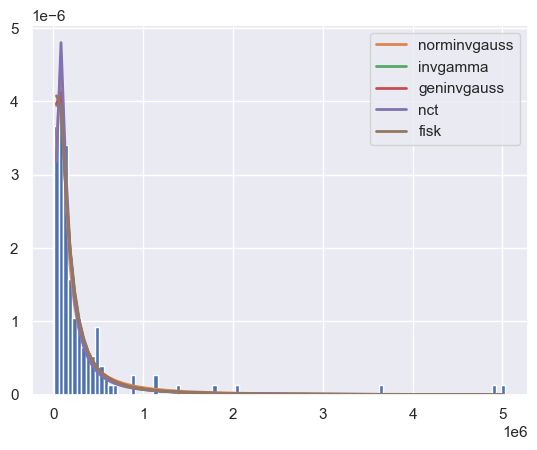

In [74]:
f = Fitter(ds3real['Ventas_norteamerica'])
f.fit()
f.summary()

In [75]:
f.get_best(method = 'sumsquare_error')

{'norminvgauss': {'a': 1.5922831221152338,
  'b': 1.5708248621649041,
  'loc': 34657.40053096816,
  'scale': 48121.81022168456}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Fitting 109 distributions:  63%|██████▎   | 69/109 [00:10<00:04,  9.86it/s]SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitting 109 distributions:  83%|████████▎ | 90/109 [00:15<00:06,  2.97it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  94%|█████████▎| 102/109 [00:21<00:04,  1.73it/s]c:\Users\ursuz\anaconda3\lib\site-pa

{'johnsonsb': {'a': -1.0638242254820276,
  'b': 1.6683535940251781,
  'loc': 5.138037319291487,
  'scale': 96.85505922949882}}

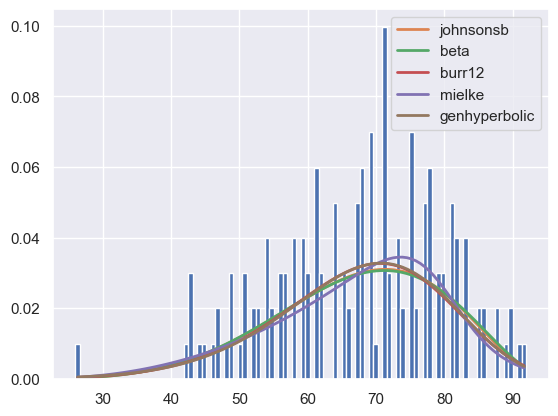

In [76]:
f = Fitter(ds3real['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:  22%|██▏       | 24/109 [00:04<00:19,  4.36it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3382: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 109 distributions:  63%|██████▎   | 69/109 [00:29<01:06,  1.66s/it]SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitting 109 distributions:  72%|███████▏  | 78/109 [00:37<00:31,  1.02s/it]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and cal

sumsquare_error          aic           bic  kl_div  ks_statistic  \
exponweib      5.800075e-14  4102.860309 -25970.426491     inf      0.060790   
halfcauchy     7.829915e-14  3867.170512 -25772.877573     inf      0.074058   
invgauss       7.953893e-14  4263.134570 -25755.295407     inf      0.066048   
fisk           9.681808e-14  3984.994052 -25617.291201     inf      0.055155   
lognorm        1.282265e-13  4154.171681 -25420.053929     inf      0.065350   

            ks_pvalue  
exponweib    0.010690  
halfcauchy   0.000856  
invgauss     0.004171  
fisk         0.026882  
lognorm      0.004747

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


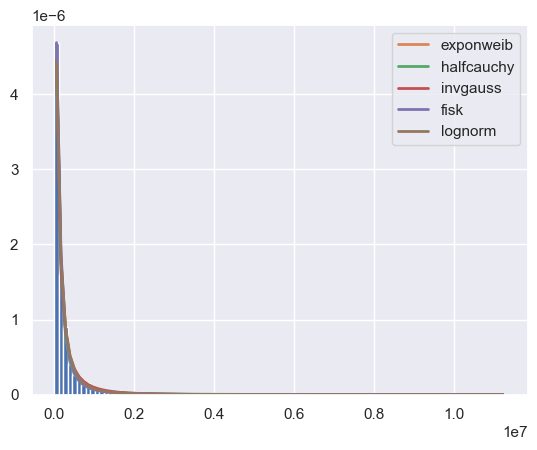

In [77]:
f = Fitter(dsreal['Ventas_norteamerica'])
f.fit()
f.get_best(method = 'sumsquare_error')
f.summary()

In [78]:
f.get_best(method = 'sumsquare_error')

{'exponweib': {'a': 38.25825097001383,
  'c': 0.24298465632421368,
  'loc': 1604.1920801359647,
  'scale': 406.1567564430686}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  14%|█▍        | 15/109 [00:30<03:00,  1.92s/i

{'dgamma': {'a': 1.5062713725030208,
  'loc': 64.43117703532295,
  'scale': 7.20069929835074}}

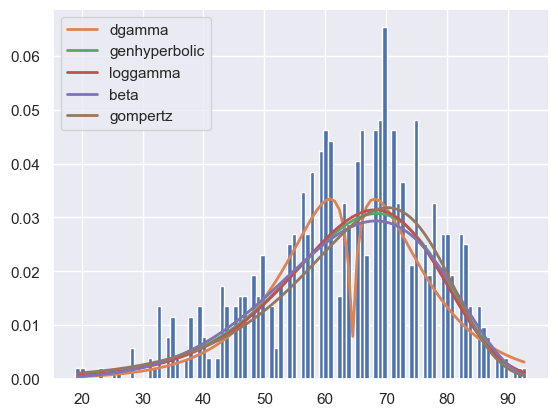

In [79]:
f = Fitter(dsreal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  30%|███       | 33/109 [00:17<00:30,  2.47it/

{'fatiguelife': {'c': 1.6997359627943454,
  'loc': 3156.70656487999,
  'scale': 98330.00491523193}}

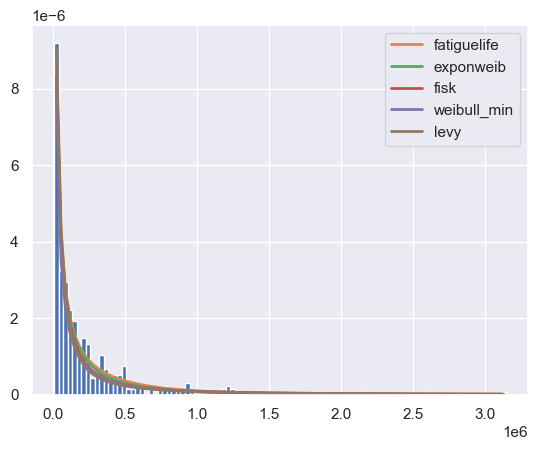

In [80]:
f = Fitter(gbareal['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:   0%|          | 0/109 [00:00<?, ?it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
SKIPPED

{'mielke': {'k': 4.502912830551574,
  's': 22.45373354956885,
  'loc': -0.4232893790671255,
  'scale': 81.60941125335488}}

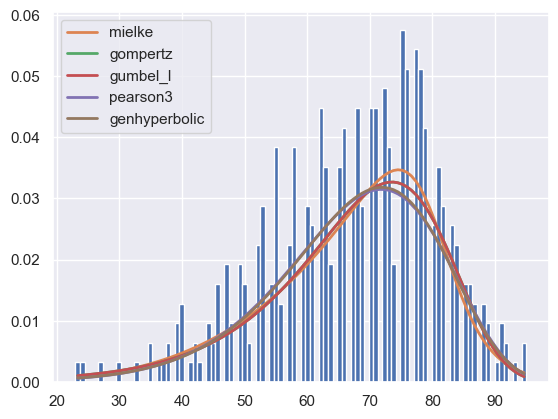

In [81]:
f = Fitter(gbareal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  25%|██▍       | 27/109 [00:23<00:59,  1.38it/

{'kappa3': {'a': 1.4652958414095738,
  'loc': 9999.99998350253,
  'scale': 133959.11970988495}}

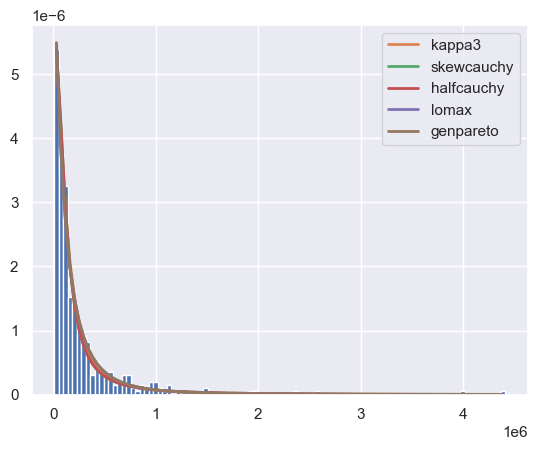

In [82]:
f = Fitter(gcreal['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  28%|██▊       | 31/109 [00:30<01:02,  1.25it/

{'gausshyper': {'a': 17.00639084013502,
  'b': 2.901126232027906,
  'c': -35.27039056109716,
  'z': -0.2513729098996634,
  'loc': -27.65964847282541,
  'scale': 127.5556829602551}}

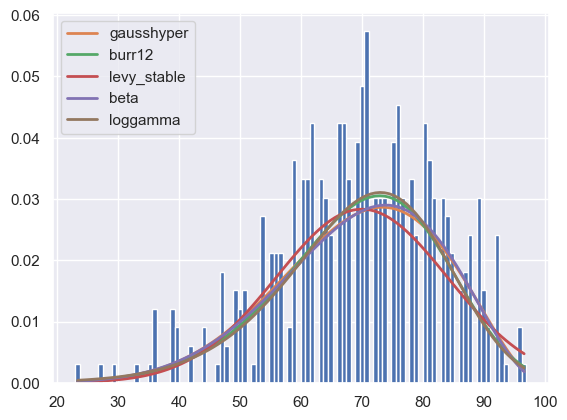

In [83]:
f = Fitter(gcreal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  24%|██▍       | 26/109 [00:35<01:30,  1.09s/i

{'loglaplace': {'c': 1.0815106313449534,
  'loc': -536.2694155056637,
  'scale': 590536.2694527204}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


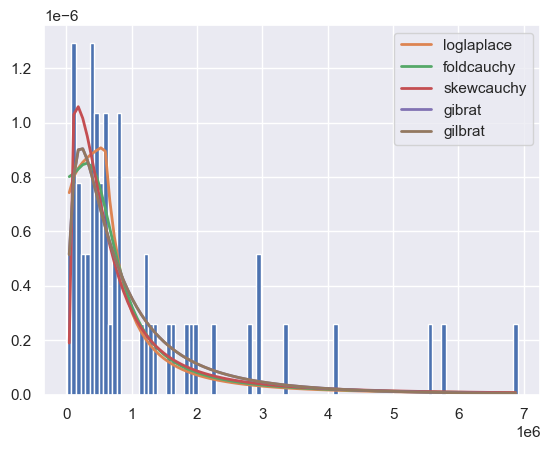

In [84]:
f = Fitter(n64real['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:  10%|█         | 11/109 [00:12<00:51,  1.90it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  73%|███████▎  | 80/109 [01:00<00:15,  1.84it/s]SKIPPED johnsonsu distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
Fitting 109 distributions: 100%|██████████| 109/109 [01:34<00:00,  1.15it/s]
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up t

{'triang': {'c': 0.7802047110046046,
  'loc': 52.81719567323002,
  'scale': 47.65775417993392}}

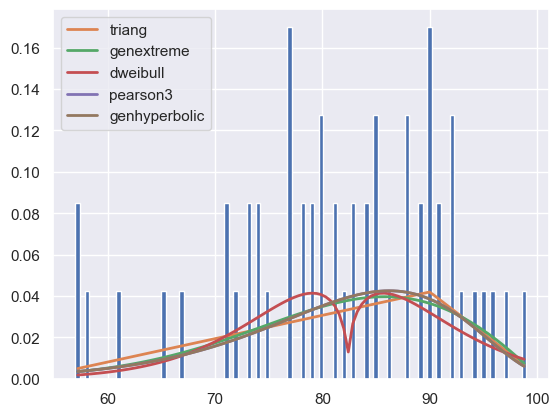

In [85]:
f = Fitter(n64real['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:  29%|██▉       | 32/109 [00:36<01:24,  1.09s/it]SKIPPED burr distribution (taking more than 30 seconds)
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3382: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 109 distributions:  43%|████▎     | 47/109 [00:45<00:26,  2.36it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4199: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(llc, _a, x)[0]
Fitting 109 distributions:  63%|██████▎   | 69/109 [01:02<00:39,  1.02it/s]SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitting 109 distributions:  75%|███████▌  | 82/109 [01:13<00:38,  1.42s/it]SKIPPED levy_stable distribution (taking more than 30 seconds)
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\

{'alpha': {'a': 2.271964305297909e-14,
  'loc': -45.233657331159066,
  'scale': 18484.830121159306}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


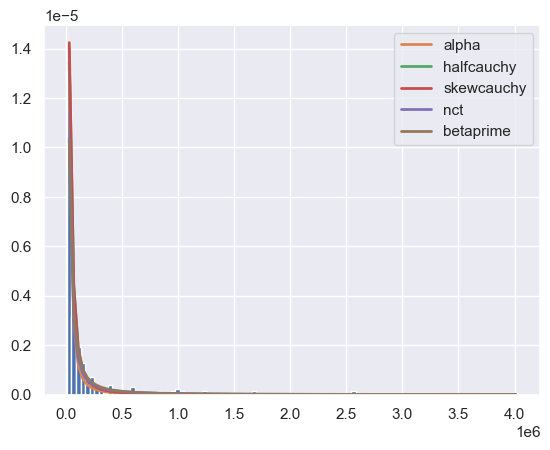

In [86]:
f = Fitter(pcreal['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  27%|██▋       | 29/109 [00:37<00:34,  2.30it/

{'loggamma': {'c': 1.014941078869636,
  'loc': 82.52690547762984,
  'scale': 8.563353686758795}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


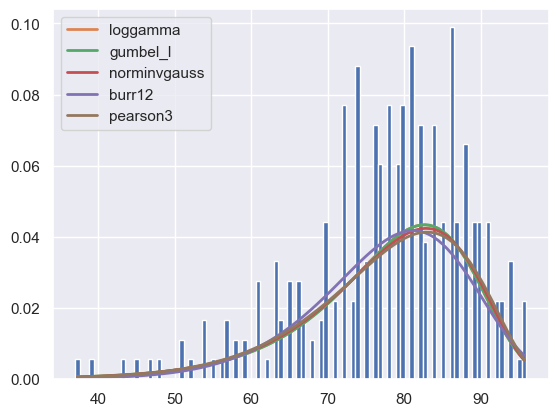

In [87]:
f = Fitter(pcreal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:   2%|▏         | 2/109 [00:14<11:51,  6.65s/it]SKIPPED arcsine distribution (taking more than 30 seconds)
SKIPPED anglit distribution (taking more than 30 seconds)
Fitting 109 distributions:   5%|▍         | 5/109 [00:41<10:59,  6.34s/it]SKIPPED alpha distribution (taking more than 30 seconds)
SKIPPED argus distribution (taking more than 30 seconds)
SKIPPED betaprime distribution (taking more than 30 seconds)
Fitting 109 distributions:  10%|█         | 11/109 [00:43<01:26,  1.13it/s]SKIPPED burr12 distribution (taking more than 30 seconds)
SKIPPED chi distribution (taking more than 30 seconds)
Fitting 109 distributions:  13%|█▎        | 14/109 [00:46<01:19,  1.20it/s]SKIPPED dgamma distribution (taking more than 30 seconds)
SKIPPED dweibull distribution (taking more than 30 seconds)
Fitting 109 distributions:  17%|█▋        | 18/109 [00:50<01:22,  1.10it/s]SKIPPED erlang distribution (taking more than 30 seconds)
SKIPPED exponnorm distribution (taking more th

{'pareto': {'b': 1.6108719999906471,
  'loc': -264941.12379598274,
  'scale': 274941.1237959827}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


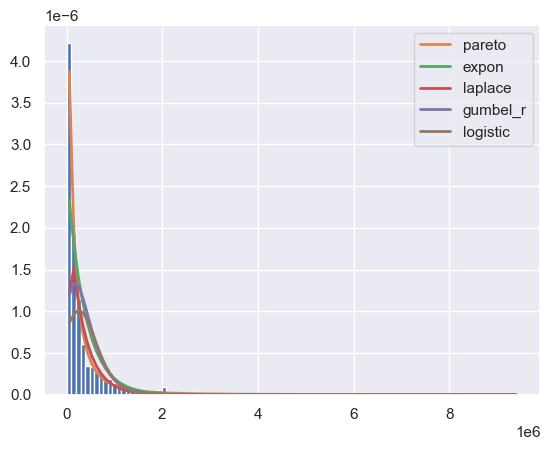

In [88]:
f = Fitter(ps2real['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:   4%|▎         | 4/109 [00:37<16:14,  9.28s/it

{'norm': {'loc': 68.76953125, 'scale': 13.067343949910917}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


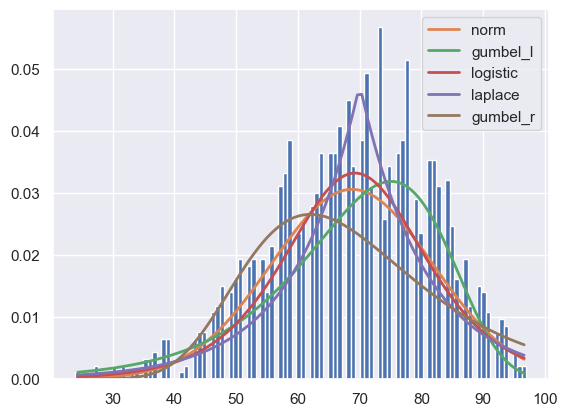

In [89]:
f = Fitter(ps2real['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:   2%|▏         | 2/109 [00:11<08:59,  5.04s/it

{'pareto': {'b': 2.8312815036187278,
  'loc': -781536.8685465753,
  'scale': 791536.8685465752}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


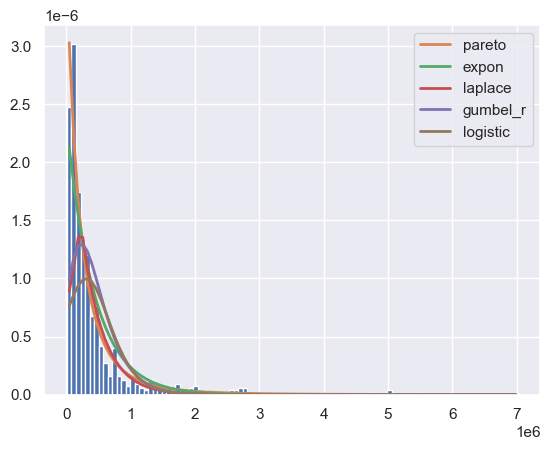

In [92]:
f = Fitter(ps3real['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:   4%|▎         | 4/109 [00:40<16:25,  9.38s/it

{'gumbel_l': {'loc': 77.13512924720743, 'scale': 11.52205590875782}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


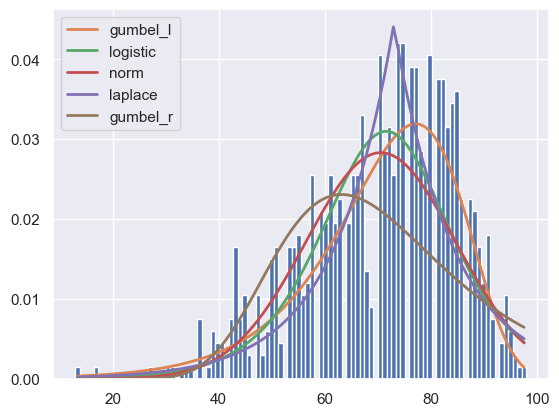

In [93]:
f = Fitter(ps3real['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  21%|██        | 23/109 [00:39<01:39,  1.15s/i

{'fatiguelife': {'c': 2.062645425224636,
  'loc': 3746.069775924942,
  'scale': 123409.8202699213}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


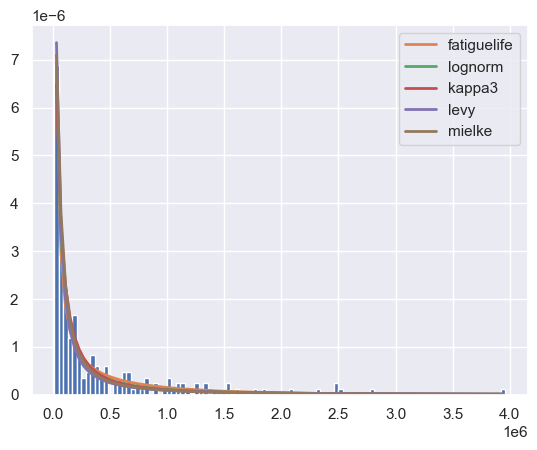

In [94]:
f = Fitter(ps4real['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  16%|█▌        | 17/109 [00:44<03:12,  2.09s/i

{'dgamma': {'a': 1.2781197761941219,
  'loc': 75.43468591127899,
  'scale': 6.844802841339743}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


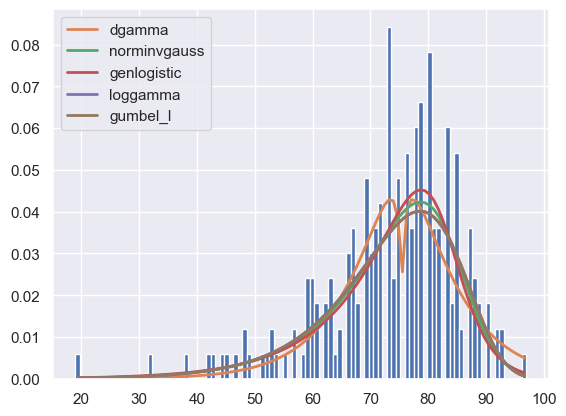

In [95]:
f = Fitter(ps4real['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  14%|█▍        | 15/109 [00:43<01:57,  1.25s/i

{'foldcauchy': {'c': 0.9777244620204713,
  'loc': 353.6917634248448,
  'scale': 78049.16778473955}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


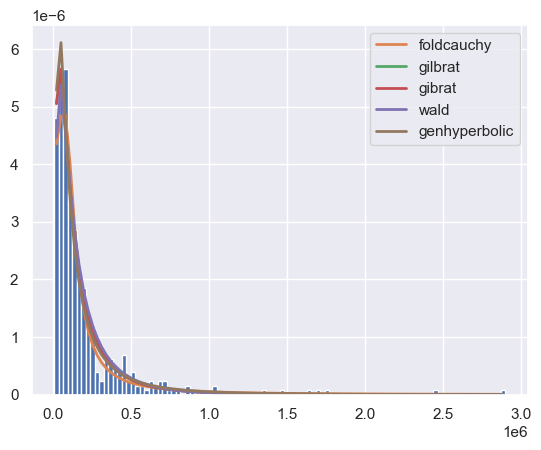

In [96]:
f = Fitter(pspreal['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  16%|█▌        | 17/109 [00:46<02:55,  1.91s/i

{'beta': {'a': 9.163787562688384,
  'b': 3.341473818951683,
  'loc': -4.40999786381785,
  'scale': 97.94027978425481}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


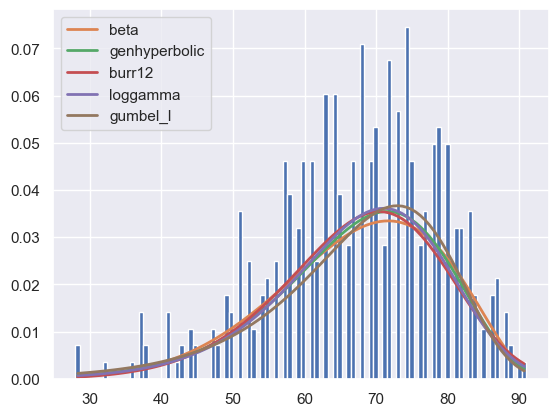

In [97]:
f = Fitter(pspreal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  15%|█▍        | 16/109 [00:39<01:26,  1.08it/

{'invgauss': {'mu': 3.678256294567858,
  'loc': -10780.136378962194,
  'scale': 147213.02091074432}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


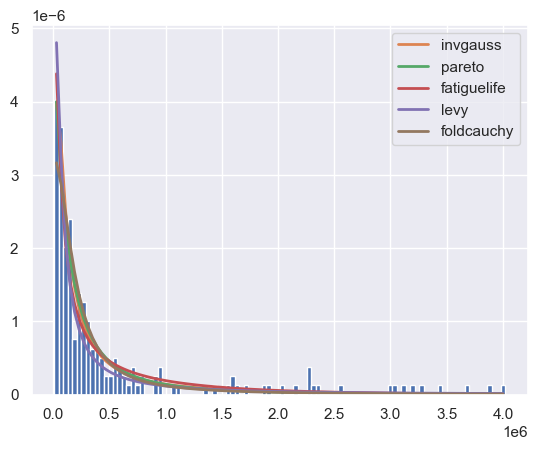

In [98]:
f = Fitter(psreal['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  17%|█▋        | 18/109 [00:40<01:59,  1.31s/i

{'beta': {'a': 5.245691869894831,
  'b': 1.776256136231137,
  'loc': -8.555919620594855,
  'scale': 106.9701145875029}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


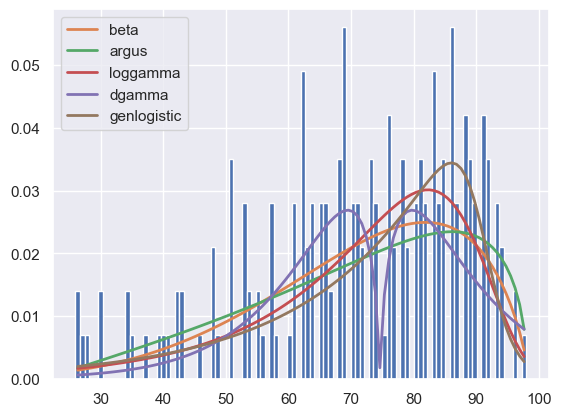

In [99]:
f = Fitter(psreal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:   8%|▊         | 9/109 [00:40<04:40,  2.80s/it

{'fatiguelife': {'c': 1.2679650271096712,
  'loc': 2309.599671509329,
  'scale': 59951.729191009115}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


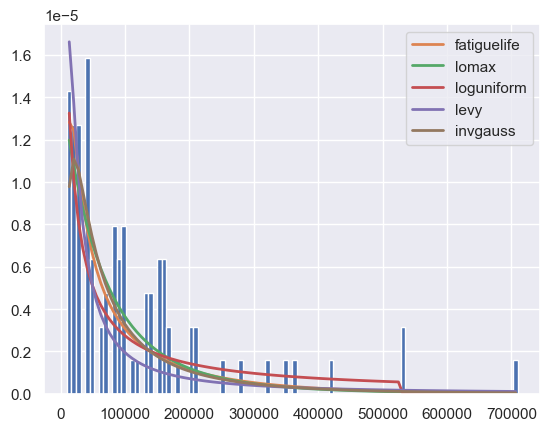

In [100]:
f = Fitter(psvreal['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  11%|█         | 12/109 [00:43<03:53,  2.40s/i

{'dgamma': {'a': 1.609916285149877,
  'loc': 73.57390345314012,
  'scale': 5.769031904978732}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


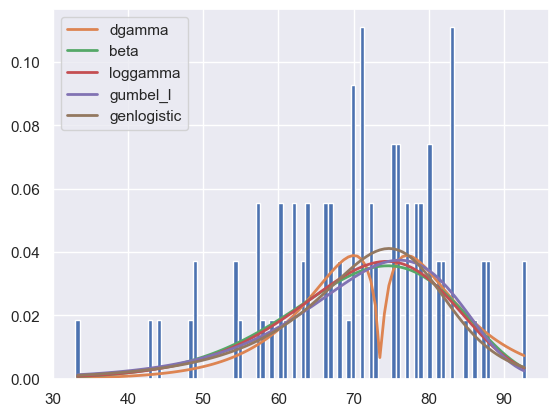

In [101]:
f = Fitter(psvreal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:   0%|          | 0/109 [00:00<?, ?it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
SKIPPED

{'pareto': {'b': 1.837962344979827,
  'loc': -447203.62668906135,
  'scale': 457203.6266890613}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


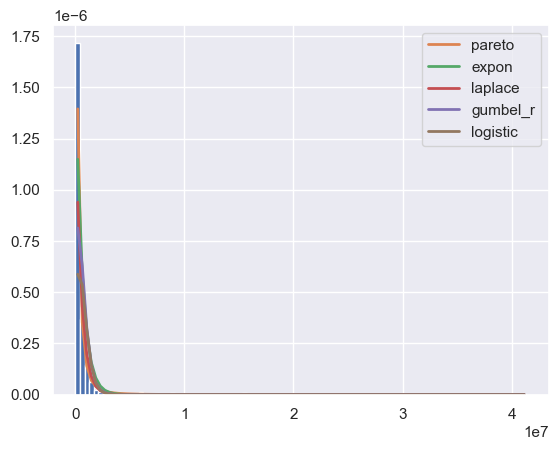

In [102]:
f = Fitter(wiireal['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:   0%|          | 0/109 [00:00<?, ?it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
SKIPPED

{'gumbel_l': {'loc': 69.94342715022462, 'scale': 13.021057866036536}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


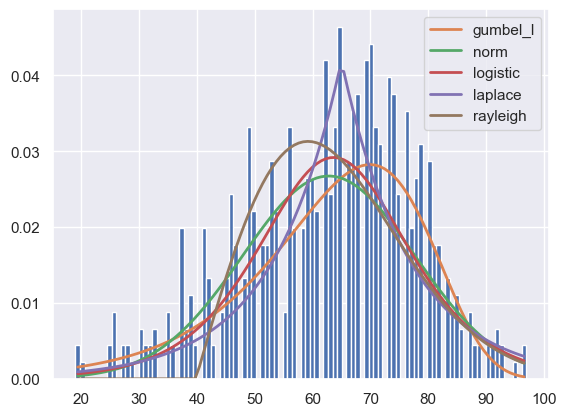

In [103]:
f = Fitter(wiireal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:   7%|▋         | 8/109 [00:49<05:13,  3.11s/it

{'pareto': {'b': 2.8376202494177196,
  'loc': -660456.4604207143,
  'scale': 670456.4604207142}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


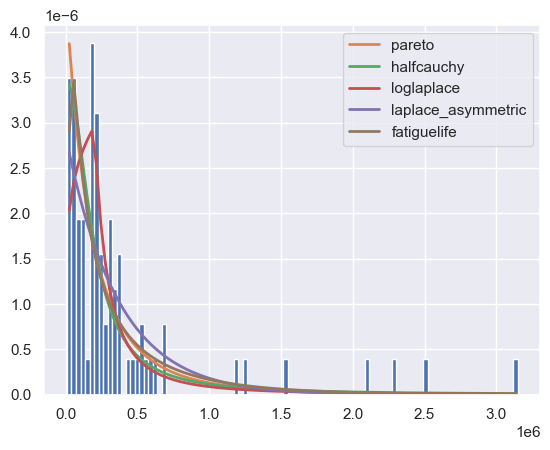

In [104]:
f = Fitter(wiiureal['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:   0%|          | 0/109 [00:00<?, ?it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
SKIPPED

{'loggamma': {'c': 0.4602852488255255,
  'loc': 85.142215652924,
  'scale': 6.43263317349776}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


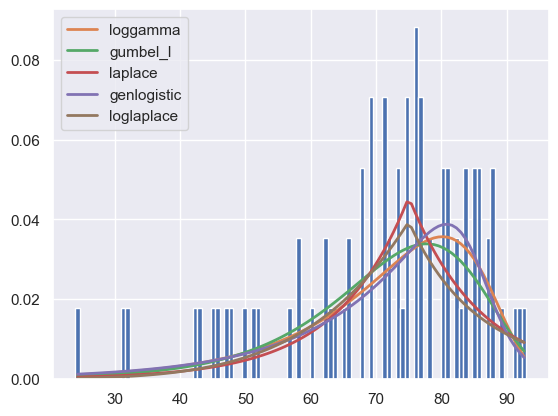

In [105]:
f = Fitter(wiiureal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:   2%|▏         | 2/109 [00:23<20:07, 11.29s/it]SKIPPED anglit distribution (taking more than 30 seconds)
SKIPPED alpha distribution (taking more than 30 seconds)
Fitting 109 distributions:   4%|▎         | 4/109 [00:45<17:09,  9.80s/it]SKIPPED argus distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
Fitting 109 distributions:   9%|▉         | 10/109 [00:52<02:56,  1.78s/it]SKIPPED cauchy distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
Fitting 109 distributions:  10%|█         | 11/109 [00:53<02:37,  1.61s/it]SKIPPED cosine distribution (taking more than 30 seconds)
SKIPPED dweibull distribution (taking more than 30 seconds)
Fitting 109 distributions:  14%|█▍        | 15/109 [01:00<02:44,  1.75s/it]SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED chi distribution (taking more than 30 seconds)
Fitting 109 distributions:  17%|█▋        | 18/109 [01

{'pareto': {'b': 1.997898927857518,
  'loc': -596016.5051352283,
  'scale': 606016.5051352282}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


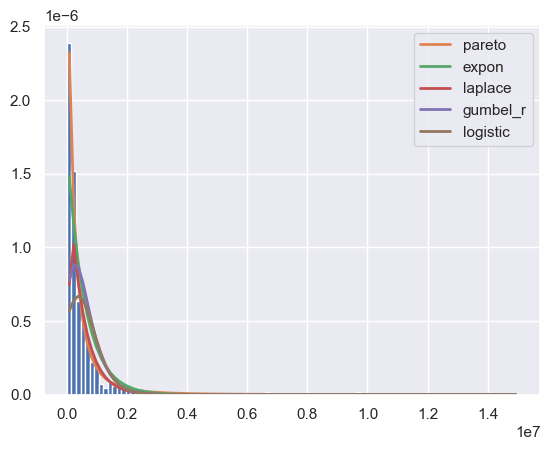

In [106]:
f = Fitter(x360real['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:   5%|▍         | 5/109 [00:44<11:18,  6.52s/it

{'gumbel_l': {'loc': 75.68861269796307, 'scale': 12.344554897586136}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


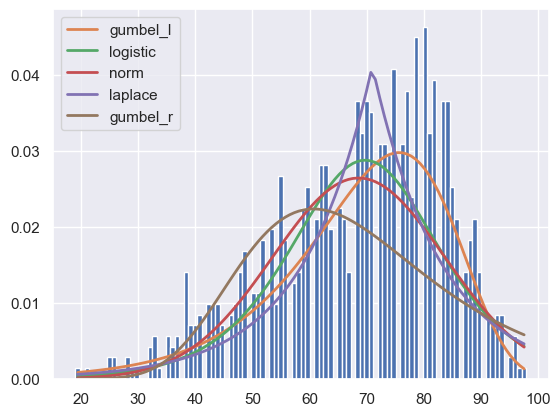

In [107]:
f = Fitter(x360real['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:   3%|▎         | 3/109 [00:46<28:39, 16.22s/it]SKIPPED anglit distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
Fitting 109 distributions:   7%|▋         | 8/109 [00:50<04:21,  2.59s/it]SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED bradford distribution (taking more than 30 seconds)
Fitting 109 distributions:  12%|█▏        | 13/109 [00:57<02:47,  1.74s/it]SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED cosine distribution (taking more than 30 seconds)
Fitting 109 distributions:  20%|██        | 22/109 [01:07<01:14,  1.17it/s]SKIPPED f distribution (taking more than 30 seconds)
SKIPPED fatiguelife distribution (taking more than 30 seconds)
Fitting 109 distributions:  25%|██▍       | 27/109 [01:25<02:43,  1.99s/it]SKIPPED gamma distribution (taking more than 30 seconds)
SKIPPED gausshyper distribution (taking more than 30 seconds)
Fitting 109 distributions:  34%|███▍      | 37/1

{'expon': {'loc': 10000.0, 'scale': 224427.58620689655}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


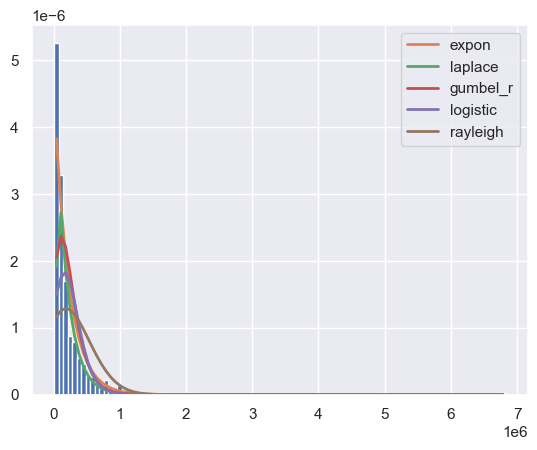

In [108]:
f = Fitter(xbreal['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:  26%|██▌       | 28/109 [00:05<00:17,  4.50it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3382: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  t1 = integrate.quad(llc, -np.inf, x)[0]
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3382: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 109 distributions:  74%|███████▍  | 81/109 [00:38<00:27,  1.00it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in orde

{'beta': {'a': 22.451828433505117,
  'b': 3.529483560514736,
  'loc': -113.87950281116031,
  'scale': 212.62134558898097}}

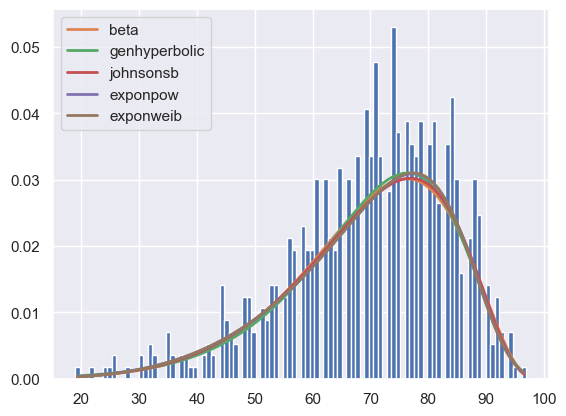

In [3]:
f = Fitter(xbreal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:  28%|██▊       | 30/109 [00:09<00:14,  5.57it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3382: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 109 distributions:  63%|██████▎   | 69/109 [00:21<00:09,  4.14it/s]SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitting 109 distributions:  83%|████████▎ | 91/109 [00:37<00:16,  1.11it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and cal

{'truncweibull_min': {'c': 0.13245279330528698,
  'a': 0.005685779571574392,
  'b': 1.4914610626902052,
  'loc': -2284.0597984731994,
  'scale': 2160488.222205326}}

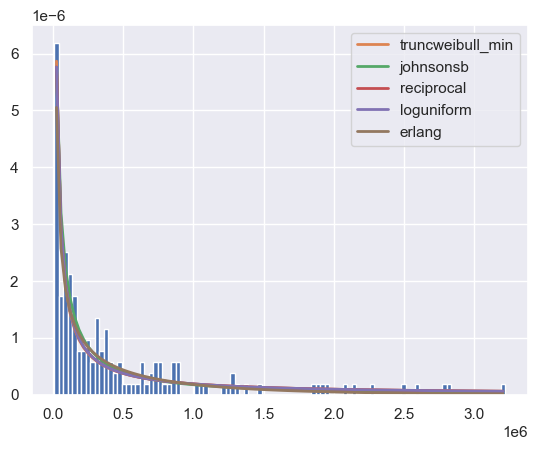

In [4]:
f = Fitter(xonereal['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  61%|██████▏   | 67/109 [00:32<00:23,  1.79it/

{'johnsonsu': {'a': 2.072929878678482,
  'b': 1.761556002907372,
  'loc': 91.88420954477795,
  'scale': 10.591743392533072}}

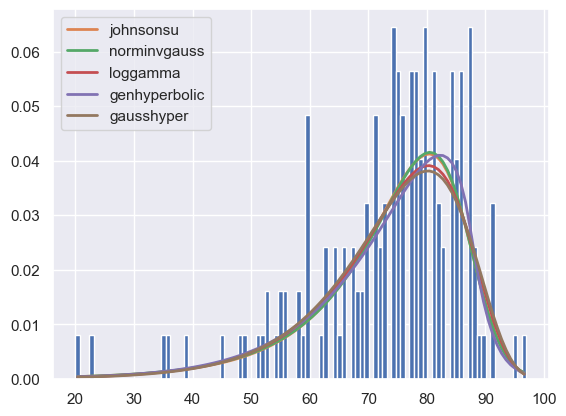

In [5]:
f = Fitter(xonereal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

In [91]:
from scipy.stats import burr12, burr, genpareto, pearson3, johnsonsb, halfgennorm, dgamma, rdist, mielke, norminvgauss, exponweib, fatiguelife, kappa3, gausshyper, loglaplace, triang, alpha, loggamma, pareto, gumbel_l, foldcauchy, beta, invgauss, expon, truncweibull_min, johnsonsu, norm

ds3syn = pd.DataFrame(norminvgauss.rvs(a=1.5922831221152338, b=1.5708248621649041, loc=34657.40053096816, scale=48121.81022168456, size=1500), columns=['Ventas_norteamerica'])
ds3syn['Calificacion_critica'] = johnsonsb.rvs(a=-1.0638242254820276, b=1.6683535940251781, loc=5.138037319291487, scale=96.85505922949882, size=1500)


dssyn= pd.DataFrame(exponweib.rvs(a=38.25825097001383, c=0.24298465632421368, loc=1604.1920801359647, scale=406.1567564430686, size=1500), columns=['Ventas_norteamerica'])
dssyn['Calificacion_critica'] = dgamma.rvs(a=1.5062713725030208, loc=64.43117703532295, scale=7.20069929835074, size=1500)


gbasyn= pd.DataFrame(fatiguelife.rvs(c=1.6997359627943454, loc=3156.70656487999, scale=98330.00491523193, size=1500), columns=['Ventas_norteamerica'])
gbasyn['Calificacion_critica'] = mielke.rvs(k=4.502912830551574, s=22.45373354956885, loc=-0.4232893790671255, scale=81.60941125335488, size=1500)


gcsyn= pd.DataFrame(kappa3.rvs(a=1.4652958414095738, loc=9999.99998350253, scale=133959.11970988495, size=1500), columns=['Ventas_norteamerica'])
gcsyn['Calificacion_critica'] = gausshyper.rvs(a=17.00639084013502, b=2.901126232027906, c=-35.27039056109716, z=-0.2513729098996634, loc=-27.65964847282541, scale=127.5556829602551, size=1500)


n64syn= pd.DataFrame(loglaplace.rvs(c=1.0815106313449534, loc=-536.2694155056637, scale=590536.2694527204, size=1500), columns=['Ventas_norteamerica'])
n64syn['Calificacion_critica'] = triang.rvs(c=0.7802047110046046, loc=52.81719567323002, scale=47.65775417993392, size=1500)

pcsyn= pd.DataFrame(alpha.rvs(a=2.271964305297909e-14, loc=-45.233657331159066, scale=18484.830121159306, size=1500), columns=['Ventas_norteamerica'])
pcsyn['Calificacion_critica'] = loggamma.rvs(c=1.014941078869636, loc=82.52690547762984, scale=8.563353686758795, size=1500)

ps2syn= pd.DataFrame(pareto.rvs(b=1.6108719999906471, loc=-264941.12379598274, scale=274941.1237959827, size=1500), columns=['Ventas_norteamerica'])
ps2syn['Calificacion_critica'] = norm.rvs(loc=68.76953125, scale=13.067343949910917, size=1500)


ps3syn= pd.DataFrame(pareto.rvs(b=2.8312815036187278, loc=-781536.8685465753, scale=791536.8685465752, size=1500), columns=['Ventas_norteamerica'])
ps3syn['Calificacion_critica'] = gumbel_l.rvs(loc=77.13512924720743, scale=11.52205590875782, size=1500)


ps4syn= pd.DataFrame(fatiguelife.rvs(c=2.062645425224636, loc=3746.069775924942, scale=123409.8202699213, size=1500), columns=['Ventas_norteamerica'])
ps4syn['Calificacion_critica'] = dgamma.rvs(a=1.2781197761941219, loc=75.43468591127899, scale=6.844802841339743, size=1500)

pspsyn= pd.DataFrame(foldcauchy.rvs(c=0.9777244620204713, loc=353.6917634248448, scale=78049.16778473955, size=1500), columns=['Ventas_norteamerica'])
pspsyn['Calificacion_critica'] = beta.rvs(a=9.163787562688384, b=3.341473818951683, loc=-4.40999786381785, scale=97.94027978425481, size=1500)


pssyn= pd.DataFrame(invgauss.rvs(mu=3.678256294567858, loc=-10780.136378962194, scale=147213.02091074432, size=1500), columns=['Ventas_norteamerica'])
pssyn['Calificacion_critica'] = beta.rvs(a=5.245691869894831, b=1.776256136231137, loc=-8.555919620594855, scale=106.9701145875029, size=1500)


psvsyn= pd.DataFrame(fatiguelife.rvs(c=1.2679650271096712, loc=2309.599671509329, scale=59951.729191009115, size=1500), columns=['Ventas_norteamerica'])
psvsyn['Calificacion_critica'] = dgamma.rvs(a=1.609916285149877, loc=73.57390345314012, scale=5.769031904978732, size=1500)


wiisyn= pd.DataFrame(pareto.rvs(b=1.837962344979827, loc=-447203.62668906135, scale=457203.6266890613, size=1500), columns=['Ventas_norteamerica'])
wiisyn['Calificacion_critica'] = gumbel_l.rvs(loc=69.94342715022462, scale=13.021057866036536, size=1500)


wiiusyn= pd.DataFrame(pareto.rvs(b=2.8376202494177196, loc=-660456.4604207143, scale=670456.4604207142, size=1500), columns=['Ventas_norteamerica'])
wiiusyn['Calificacion_critica'] = loggamma.rvs(c=0.4602852488255255, loc=85.142215652924, scale=6.43263317349776, size=1500)


x360syn= pd.DataFrame(pareto.rvs(b=1.997898927857518, loc=-596016.5051352283, scale=606016.5051352282, size=1500), columns=['Ventas_norteamerica'])
x360syn['Calificacion_critica'] = gumbel_l.rvs(loc=75.68861269796307, scale=12.344554897586136, size=1500)


xbsyn= pd.DataFrame(expon.rvs(loc=10000.0, scale=224427.58620689655, size=1500), columns=['Ventas_norteamerica'])
xbsyn['Calificacion_critica'] = beta.rvs(a=22.451828433505117, b=3.529483560514736, loc=-113.87950281116031, scale=212.62134558898097, size=1500)


xonesyn= pd.DataFrame(truncweibull_min.rvs(c=0.13245279330528698, a=0.005685779571574392, b=1.4914610626902052, loc=-2284.0597984731994, scale=2160488.222205326, size=1500), columns=['Ventas_norteamerica'])
xonesyn['Calificacion_critica'] = johnsonsu.rvs(a=2.072929878678482, b=1.761556002907372, loc=91.88420954477795, scale=10.591743392533072, size=1500)

In [92]:
ds3syn.to_csv('ds3syn.csv', index=False)
dssyn.to_csv('dssyn.csv', index=False)
gbasyn.to_csv('gbasyn.csv', index=False)
gcsyn.to_csv('gcsyn.csv', index=False)
n64syn.to_csv('n64syn.csv', index=False)
pcsyn.to_csv('pcsyn.csv', index=False)
ps2syn.to_csv('ps2syn.csv', index=False)
ps3syn.to_csv('ps3syn.csv', index=False)
ps4syn.to_csv('ps4syn.csv', index=False)
pspsyn.to_csv('pspsyn.csv', index=False)
pssyn.to_csv('pssyn.csv', index=False)
psvsyn.to_csv('psvsyn.csv', index=False)
wiisyn.to_csv('wiisyn.csv', index=False)
wiiusyn.to_csv('wiiusyn.csv', index=False)
x360syn.to_csv('x360syn.csv', index=False)
xbsyn.to_csv('xbsyn.csv', index=False)
xonesyn.to_csv('xonesyn.csv', index=False)

In [3]:
ds3syn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/ds3syn.csv')
dssyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/dssyn.csv')
gbasyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/gbasyn.csv')
gcsyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/gcsyn.csv')
n64syn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/n64syn.csv')
pcsyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/pcsyn.csv')
ps2syn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/ps2syn.csv')
ps3syn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/ps3syn.csv')
ps4syn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/ps4syn.csv')
pspsyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/pspsyn.csv')
pssyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/pssyn.csv')
psvsyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/psvsyn.csv')
wiisyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/wiisyn.csv')
wiiusyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/wiiusyn.csv')
x360syn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/x360syn.csv')
xbsyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/xbsyn.csv')
xonesyn = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/xonesyn.csv')

In [94]:
evaluator = sg.Evaluator(ds3real, ds3syn)
evaluator.describe_numeric()

count           mean            std  \
Calificacion_critica_real    152.0      67.434211      12.445734   
Calificacion_critica_synth  1500.0      67.723475      12.064937   
Ventas_norteamerica_real     152.0  324802.631579  673506.166872   
Ventas_norteamerica_synth   1500.0  303289.191452  519098.347150   

                                     min           25%            50%  \
Calificacion_critica_real      26.000000     58.750000      69.000000   
Calificacion_critica_synth     26.111637     59.666647      68.403857   
Ventas_norteamerica_real    10000.000000  80000.000000  150000.000000   
Ventas_norteamerica_synth  -48233.942088  74124.253227  142276.977056   

                                      75%           max  
Calificacion_critica_real       77.000000  9.200000e+01  
Calificacion_critica_synth      76.586340  9.581780e+01  
Ventas_norteamerica_real    302500.000000  5.030000e+06  
Ventas_norteamerica_synth   313886.410572  9.417704e+06

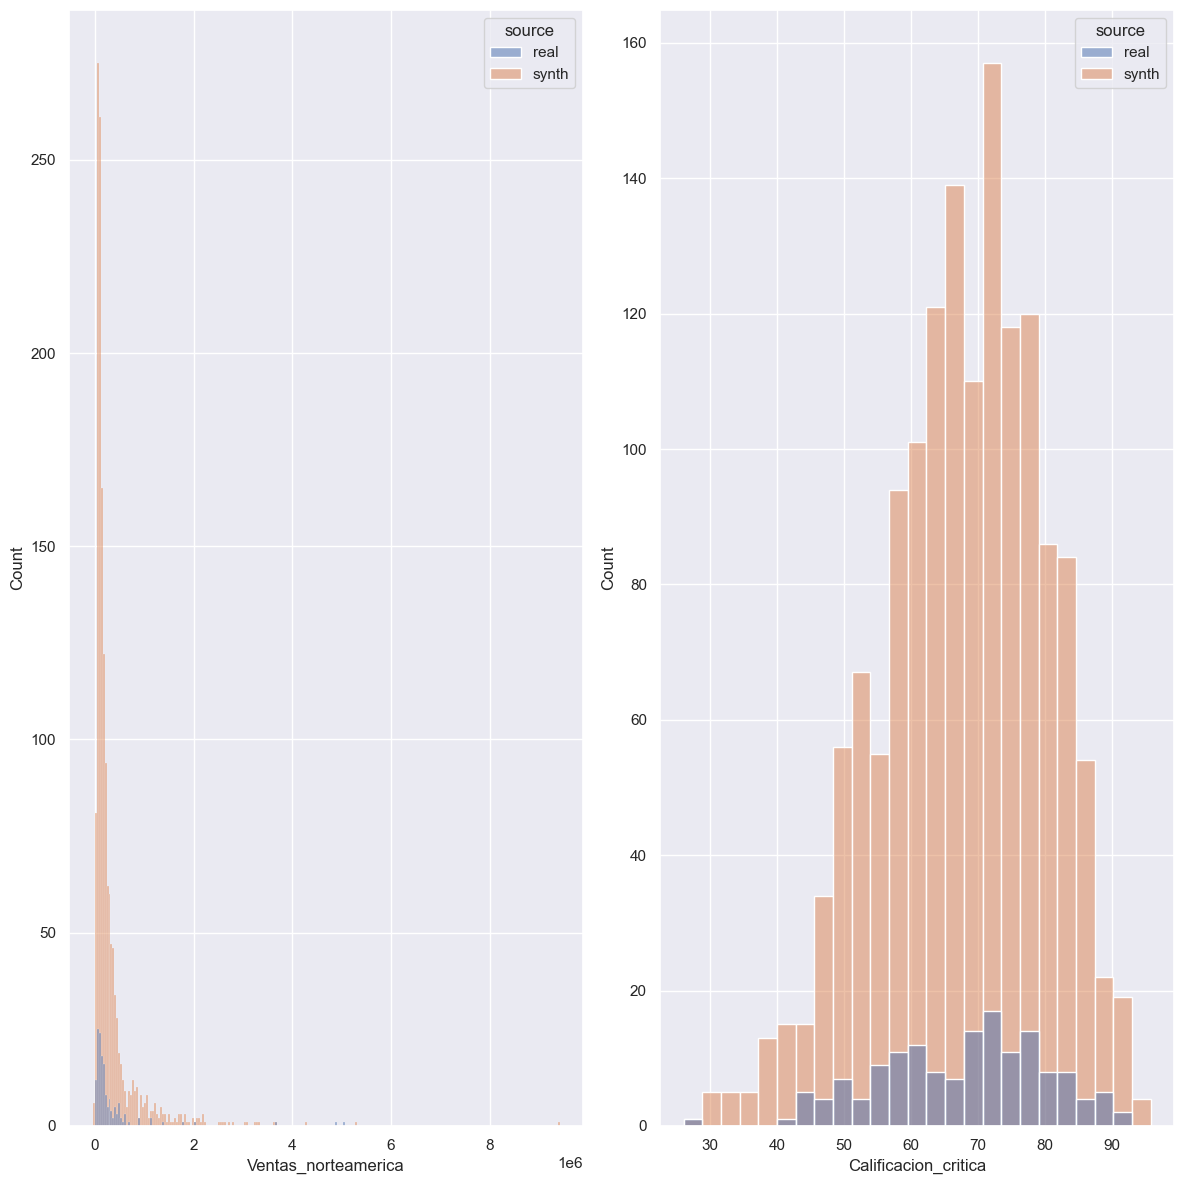

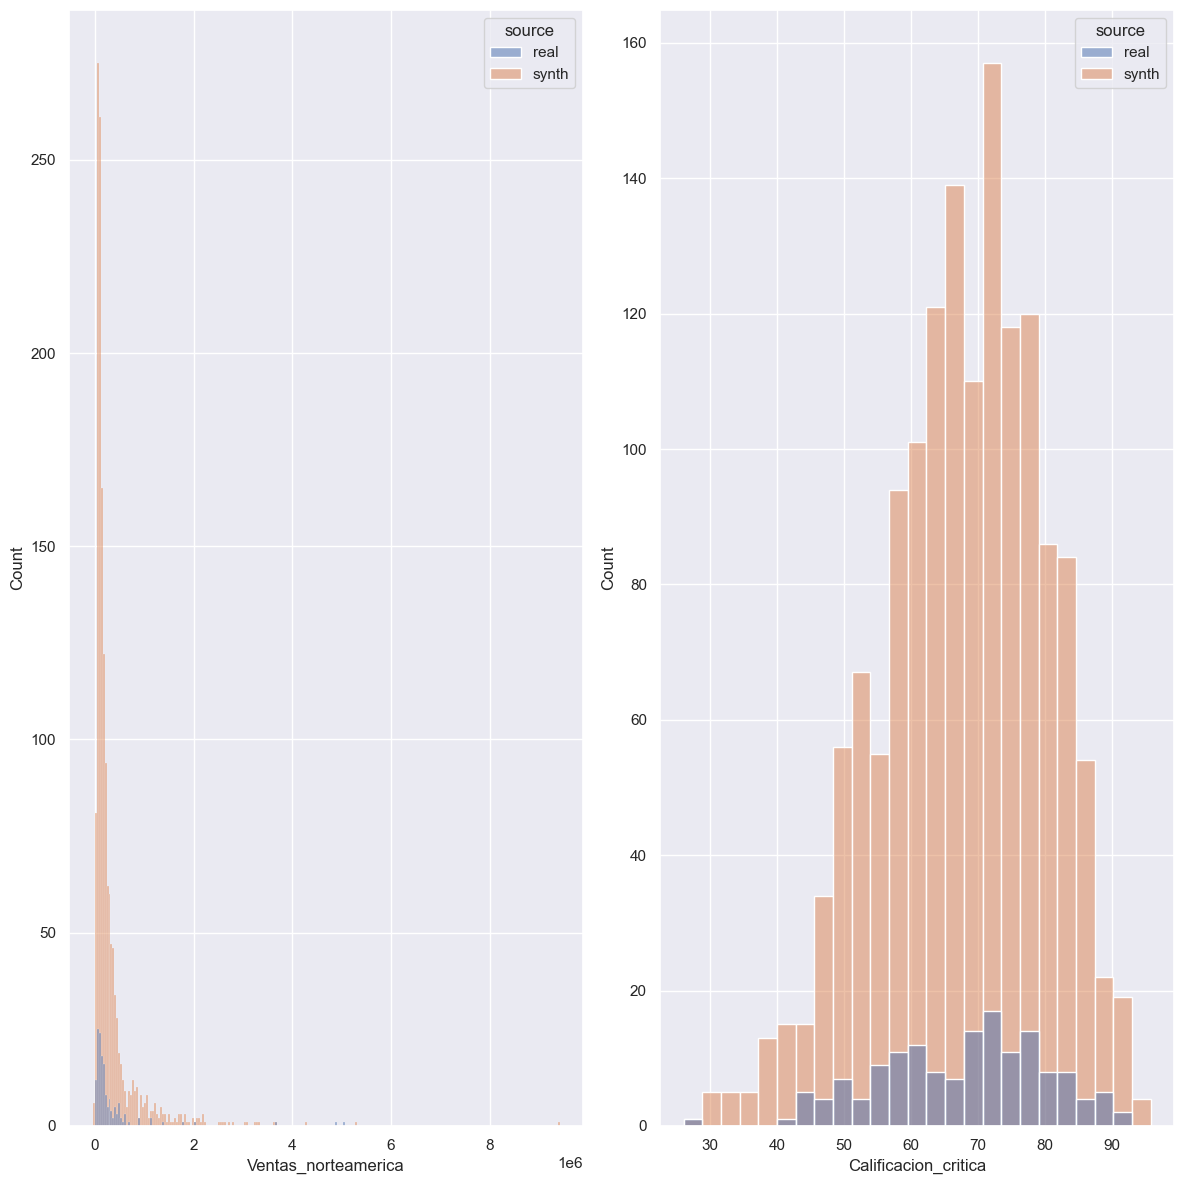

In [95]:
evaluator.plot_histograms(figsize=(12, 12))

In [96]:
for feat in ("Calificacion_critica", "Ventas_norteamerica"):
    evaluator.add_metric("wasserstein", alias=f"wass-{feat}", feature=feat)

for feat in ("Calificacion_critica", "Ventas_norteamerica"):
    evaluator.add_metric("kolmogorov_smirnov", alias=f"kolmogorov-{feat}", feature=feat)

evaluator.add_metric("propensity_metrics")
evaluator.add_metric("correlation_msd", alias="pearson-msd")

evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


value
wass-Calificacion_critica                      0.797442
wass-Ventas_norteamerica                   60304.429050
kolmogorov-Calificacion_critica-statistic      0.053526
kolmogorov-Calificacion_critica-pvalue         0.802027
kolmogorov-Ventas_norteamerica-statistic       0.048456
kolmogorov-Ventas_norteamerica-pvalue          0.884913
propensity_metrics-pmse                        0.083544
propensity_metrics-pmse_standardised           0.743311
propensity_metrics-pmse_ratio                  1.001997
pearson-msd                                    0.146308

In [97]:
comparison_evaluator = sg.Evaluator(dsreal, dssyn)
comparison_evaluator.describe_numeric()

count           mean            std  \
Calificacion_critica_real    702.0      63.782051      13.580512   
Calificacion_critica_synth  1500.0      63.870969      14.190053   
Ventas_norteamerica_real     702.0  295028.490028  705642.784671   
Ventas_norteamerica_synth   1500.0  277418.373592  633725.232013   

                                     min           25%            50%  \
Calificacion_critica_real      19.000000     56.000000      66.000000   
Calificacion_critica_synth    -15.102618     55.311669      63.320410   
Ventas_norteamerica_real    10000.000000  60000.000000  120000.000000   
Ventas_norteamerica_synth    6545.783719  57269.476960  118613.875325   

                                      75%           max  
Calificacion_critica_real       73.000000  9.300000e+01  
Calificacion_critica_synth      72.563129  1.256668e+02  
Ventas_norteamerica_real    280000.000000  1.128000e+07  
Ventas_norteamerica_synth   276504.280181  1.079583e+07

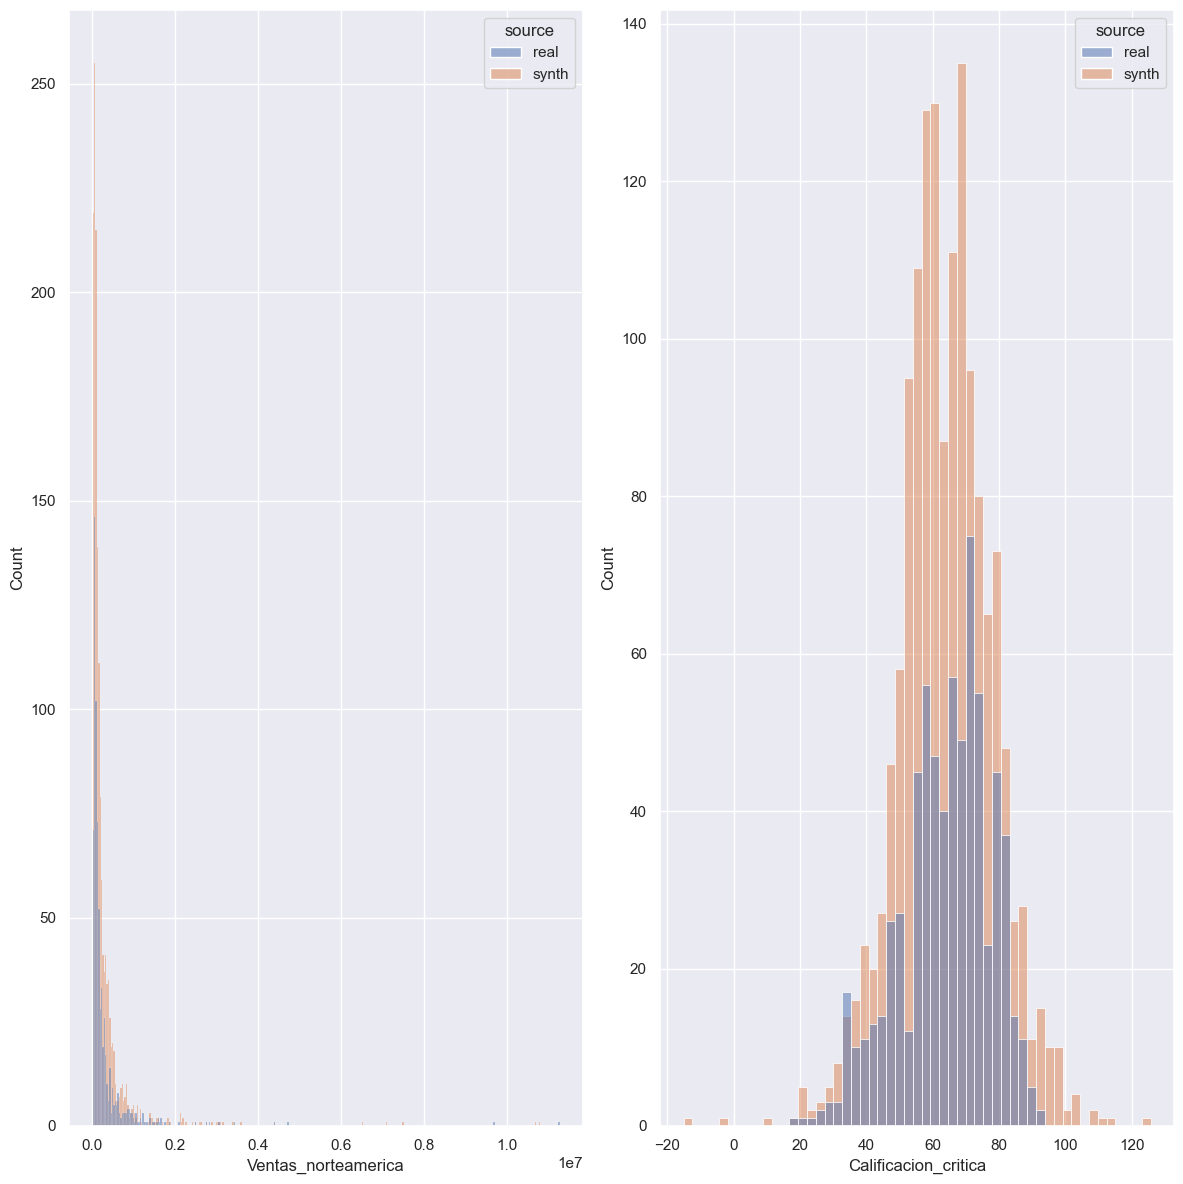

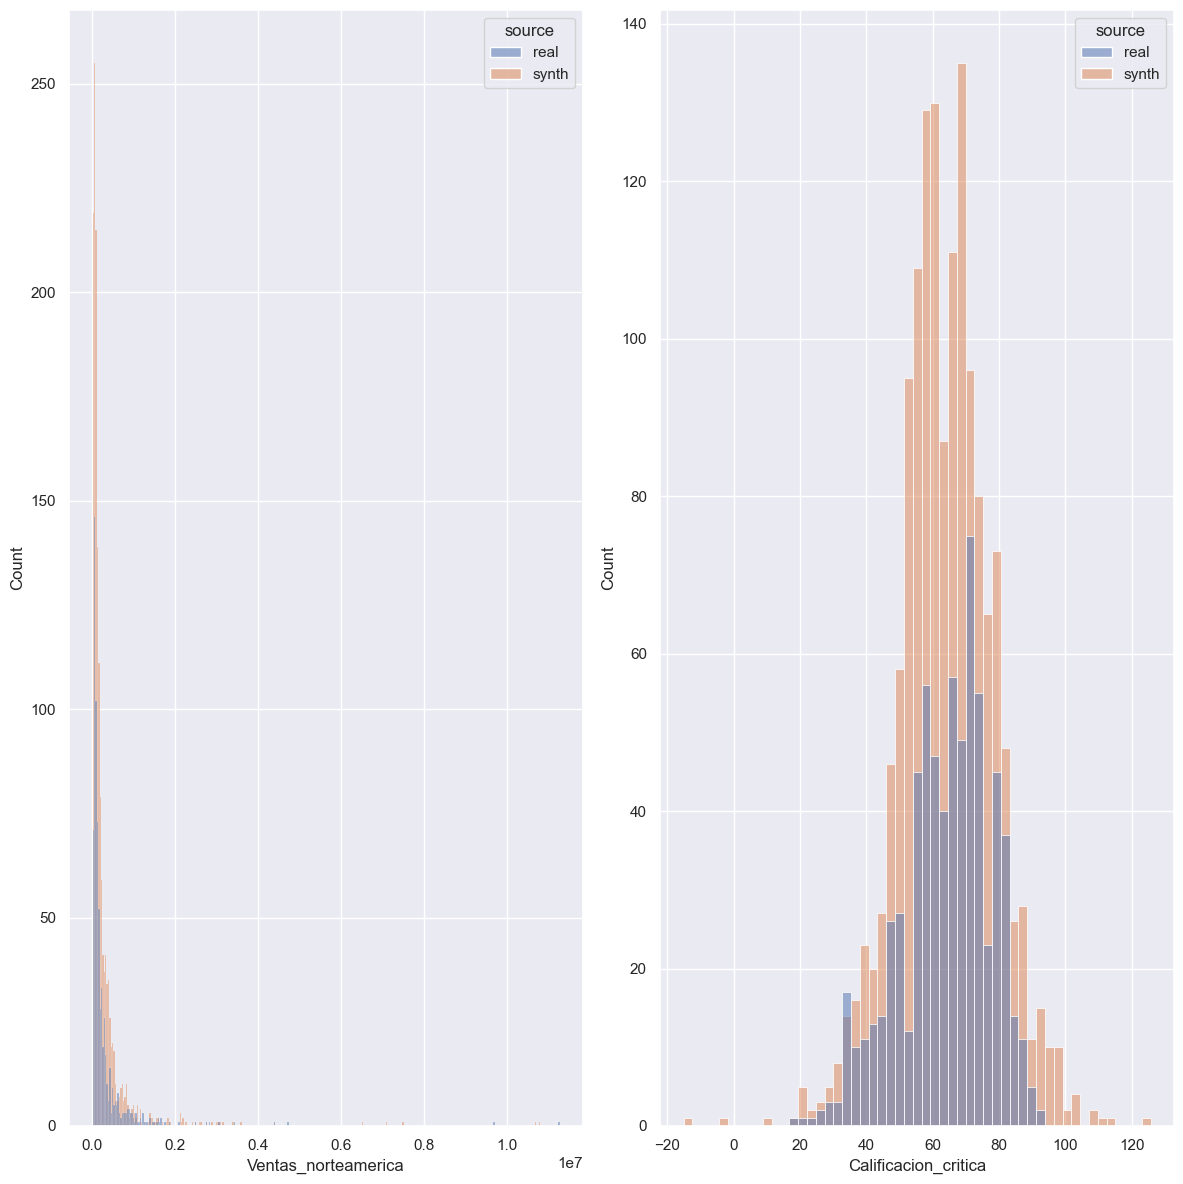

In [98]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [99]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


value
wass-Calificacion_critica                      1.676537
wass-Ventas_norteamerica                   26867.426223
kolmogorov-Calificacion_critica-statistic      0.072621
kolmogorov-Calificacion_critica-pvalue         0.012111
kolmogorov-Ventas_norteamerica-statistic       0.065236
kolmogorov-Ventas_norteamerica-pvalue          0.032298
propensity_metrics-pmse                        0.204201
propensity_metrics-pmse_standardised          -0.060933
propensity_metrics-pmse_ratio                  0.999483
pearson-msd                                    0.035969

In [100]:
comparison_evaluator = sg.Evaluator(gbareal, gbasyn)
comparison_evaluator.describe_numeric()

count           mean            std  \
Calificacion_critica_real    434.0      67.253456      13.270861   
Calificacion_critica_synth  1500.0      67.482889      13.906179   
Ventas_norteamerica_real     434.0  245576.036866  389670.631306   
Ventas_norteamerica_synth   1500.0  241441.048316  348569.776184   

                                     min           25%            50%  \
Calificacion_critica_real      23.000000     58.000000      69.000000   
Calificacion_critica_synth     10.553792     60.227350      70.363600   
Ventas_norteamerica_real    10000.000000  40000.000000  110000.000000   
Ventas_norteamerica_synth    5671.609580  37323.303918   96320.913535   

                                      75%           max  
Calificacion_critica_real       77.000000  9.500000e+01  
Calificacion_critica_synth      77.100733  1.022913e+02  
Ventas_norteamerica_real    297500.000000  3.140000e+06  
Ventas_norteamerica_synth   298660.274562  3.679708e+06

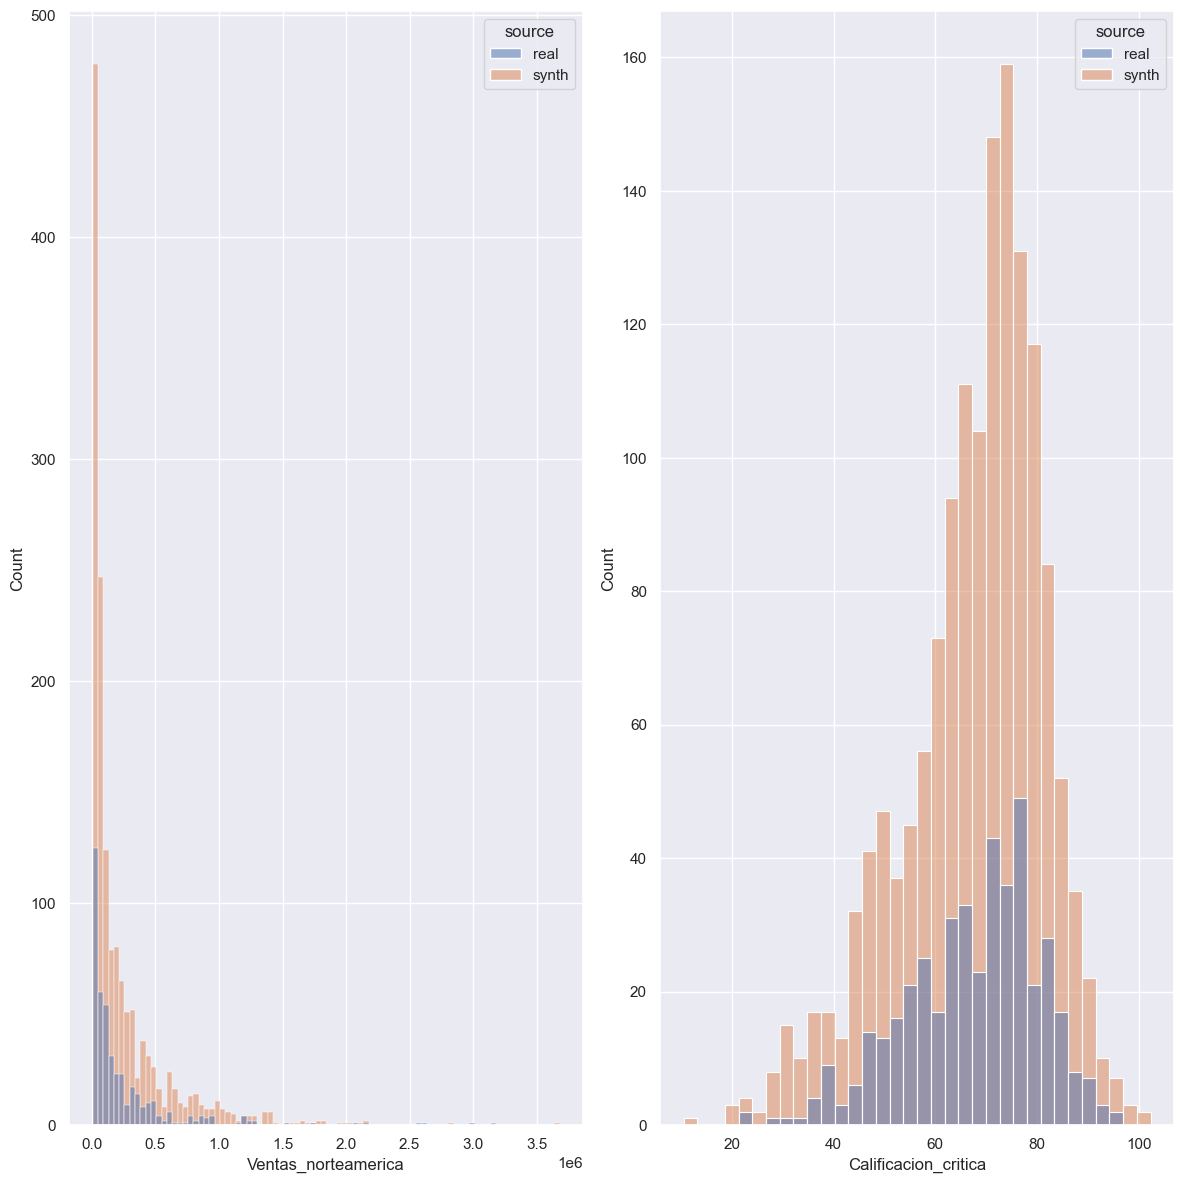

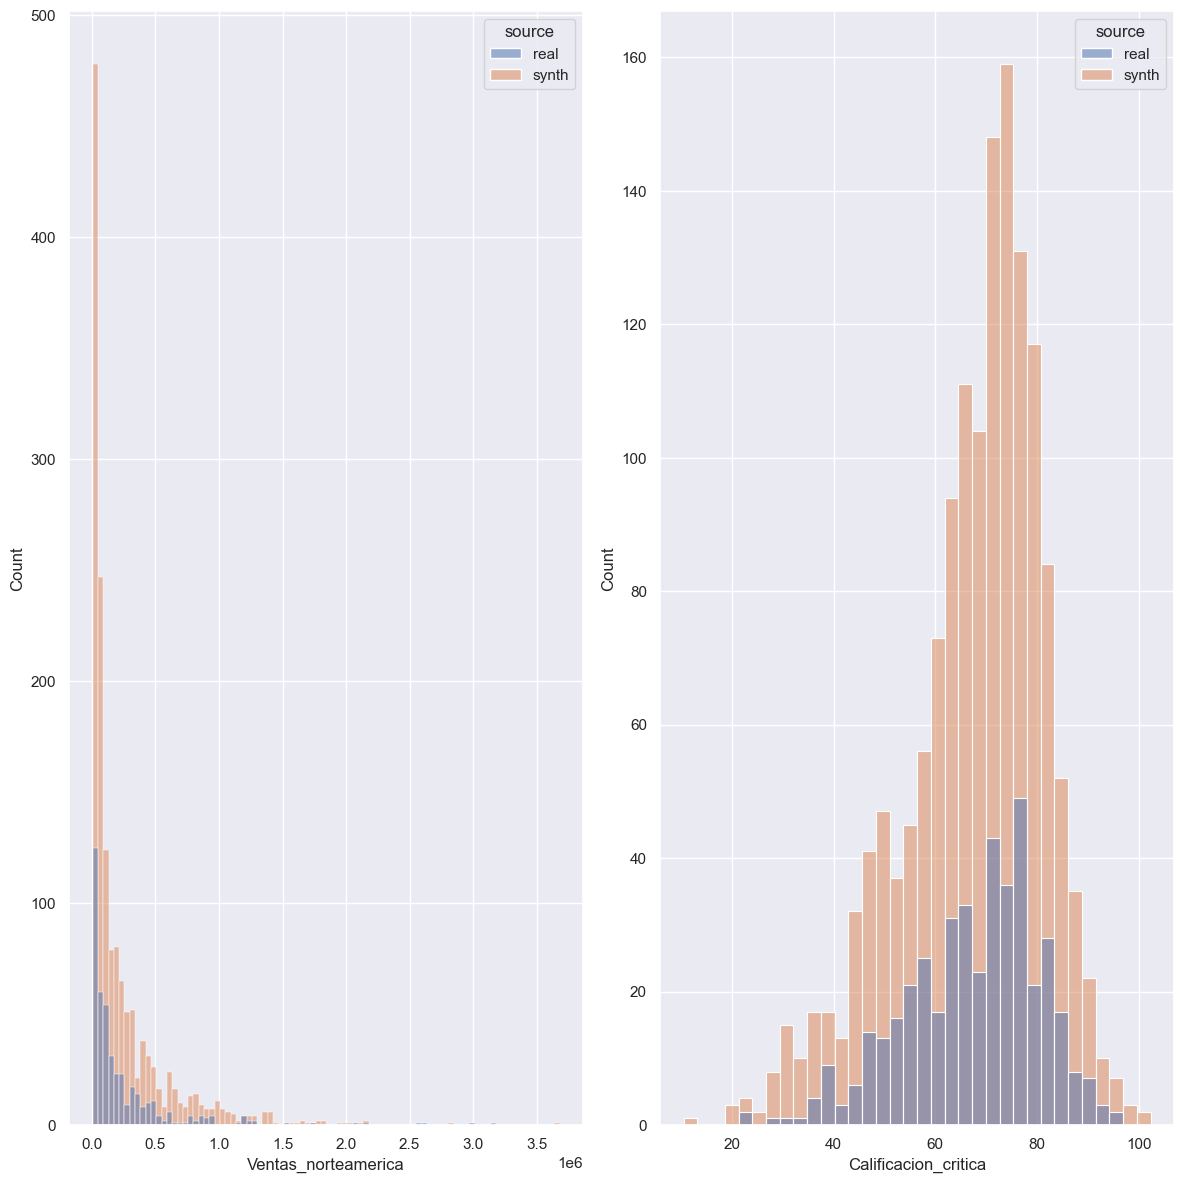

In [101]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [102]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


value
wass-Calificacion_critica                      1.037484
wass-Ventas_norteamerica                   26128.853197
kolmogorov-Calificacion_critica-statistic      0.054043
kolmogorov-Calificacion_critica-pvalue         0.267634
kolmogorov-Ventas_norteamerica-statistic       0.061840
kolmogorov-Ventas_norteamerica-pvalue          0.145014
propensity_metrics-pmse                        0.169222
propensity_metrics-pmse_standardised           0.757153
propensity_metrics-pmse_ratio                  1.002732
pearson-msd                                    0.039730

In [103]:
comparison_evaluator = sg.Evaluator(gcreal, gcsyn)
comparison_evaluator.describe_numeric()

count           mean           std           min  \
Calificacion_critica_real    447.0      69.510067  1.344710e+01     23.000000   
Calificacion_critica_synth  1500.0      69.491253  1.349375e+01     23.066823   
Ventas_norteamerica_real     447.0  262102.908277  4.212048e+05  10000.000000   
Ventas_norteamerica_synth   1500.0  491655.693677  6.309779e+06  10094.405256   

                                     25%            50%            75%  \
Calificacion_critica_real      61.000000      70.000000      80.000000   
Calificacion_critica_synth     60.768632      70.790106      79.444669   
Ventas_norteamerica_real    60000.000000  120000.000000  300000.000000   
Ventas_norteamerica_synth   61353.662212  140086.474022  318635.490069   

                                     max  
Calificacion_critica_real   9.700000e+01  
Calificacion_critica_synth  9.717125e+01  
Ventas_norteamerica_real    4.410000e+06  
Ventas_norteamerica_synth   2.406664e+08

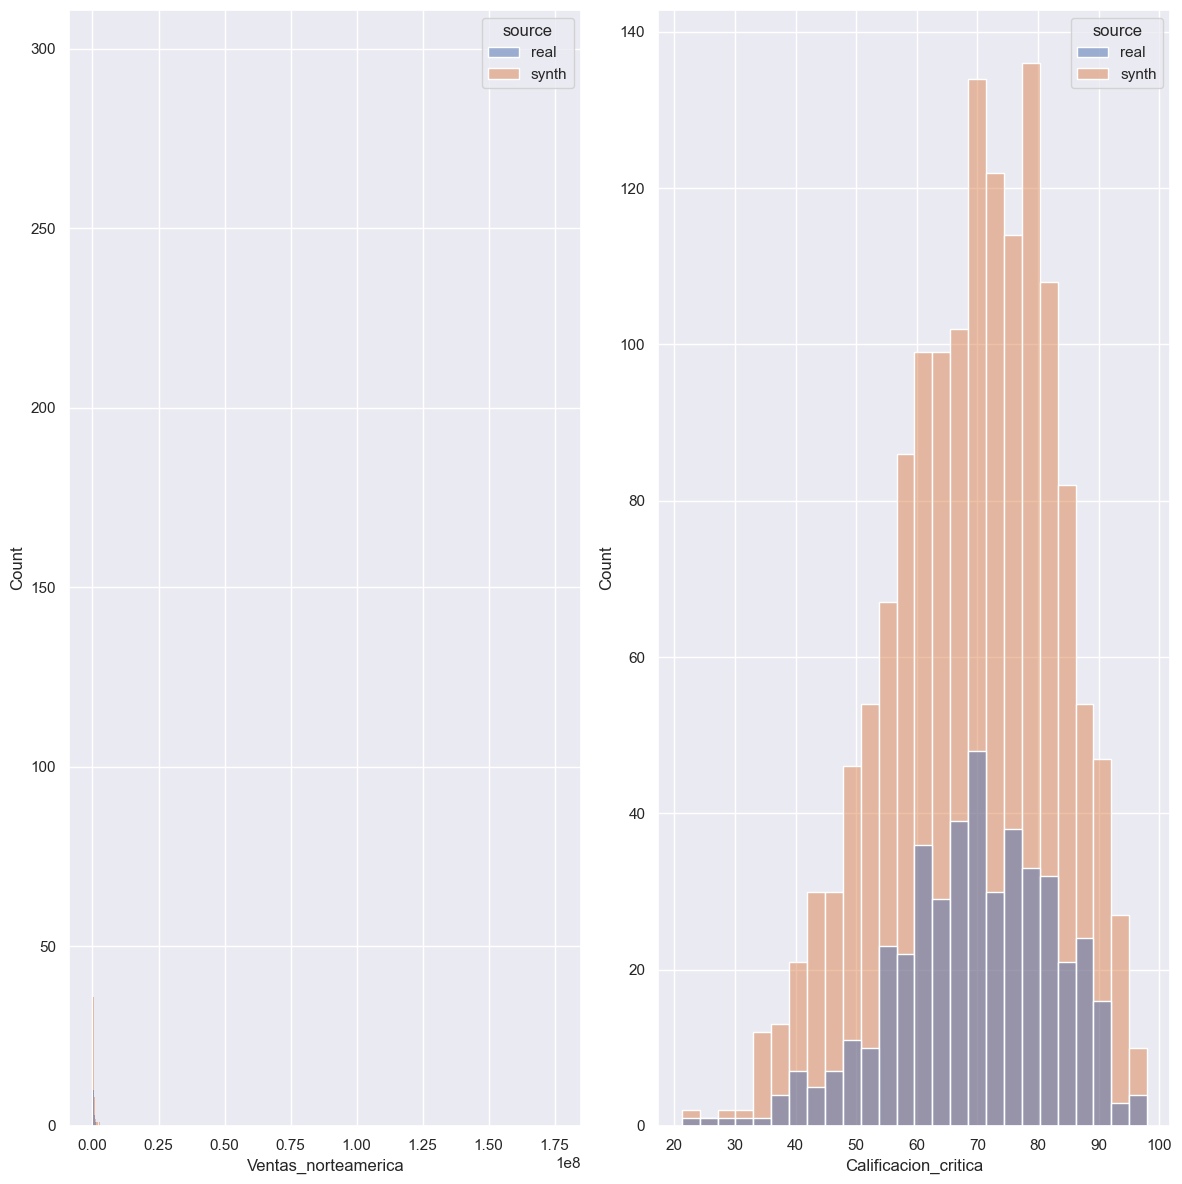

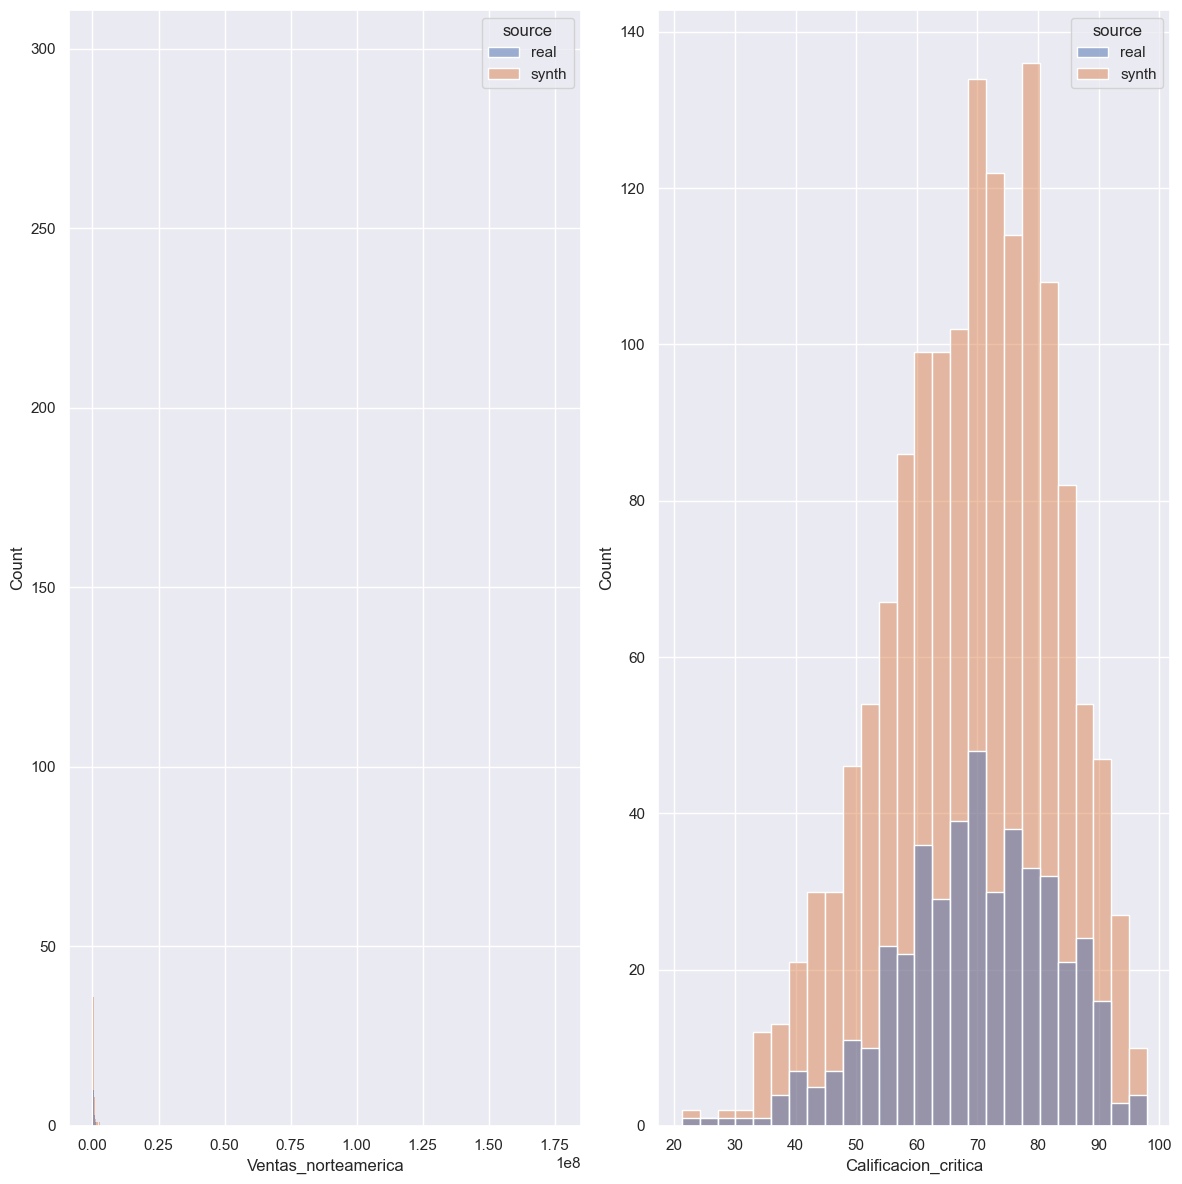

In [47]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [104]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


value
wass-Calificacion_critica                       0.532439
wass-Ventas_norteamerica                   230122.917271
kolmogorov-Calificacion_critica-statistic       0.041669
kolmogorov-Calificacion_critica-pvalue          0.570779
kolmogorov-Ventas_norteamerica-statistic        0.067629
kolmogorov-Ventas_norteamerica-pvalue           0.081159
propensity_metrics-pmse                         0.171054
propensity_metrics-pmse_standardised           -0.643112
propensity_metrics-pmse_ratio                   0.996385
pearson-msd                                     0.114972

In [105]:
comparison_evaluator = sg.Evaluator(n64real, n64syn)
comparison_evaluator.describe_numeric()

count          mean           std           min  \
Calificacion_critica_real     56.0  8.148214e+01  1.020871e+01     57.000000   
Calificacion_critica_synth  1500.0  8.155350e+01  1.010393e+01     53.862170   
Ventas_norteamerica_real      56.0  1.200000e+06  1.487152e+06  10000.000000   
Ventas_norteamerica_synth   1500.0  2.850649e+06  2.366463e+07   1227.070308   

                                      25%            50%           75%  \
Calificacion_critica_real       76.500000      82.500000  9.000000e+01   
Calificacion_critica_synth      74.276289      83.161986  8.948867e+01   
Ventas_norteamerica_real    357500.000000  605000.000000  1.415000e+06   
Ventas_norteamerica_synth   318250.863091  615989.209440  1.243589e+06   

                                     max  
Calificacion_critica_real   9.900000e+01  
Calificacion_critica_synth  1.001219e+02  
Ventas_norteamerica_real    6.910000e+06  
Ventas_norteamerica_synth   5.787933e+08

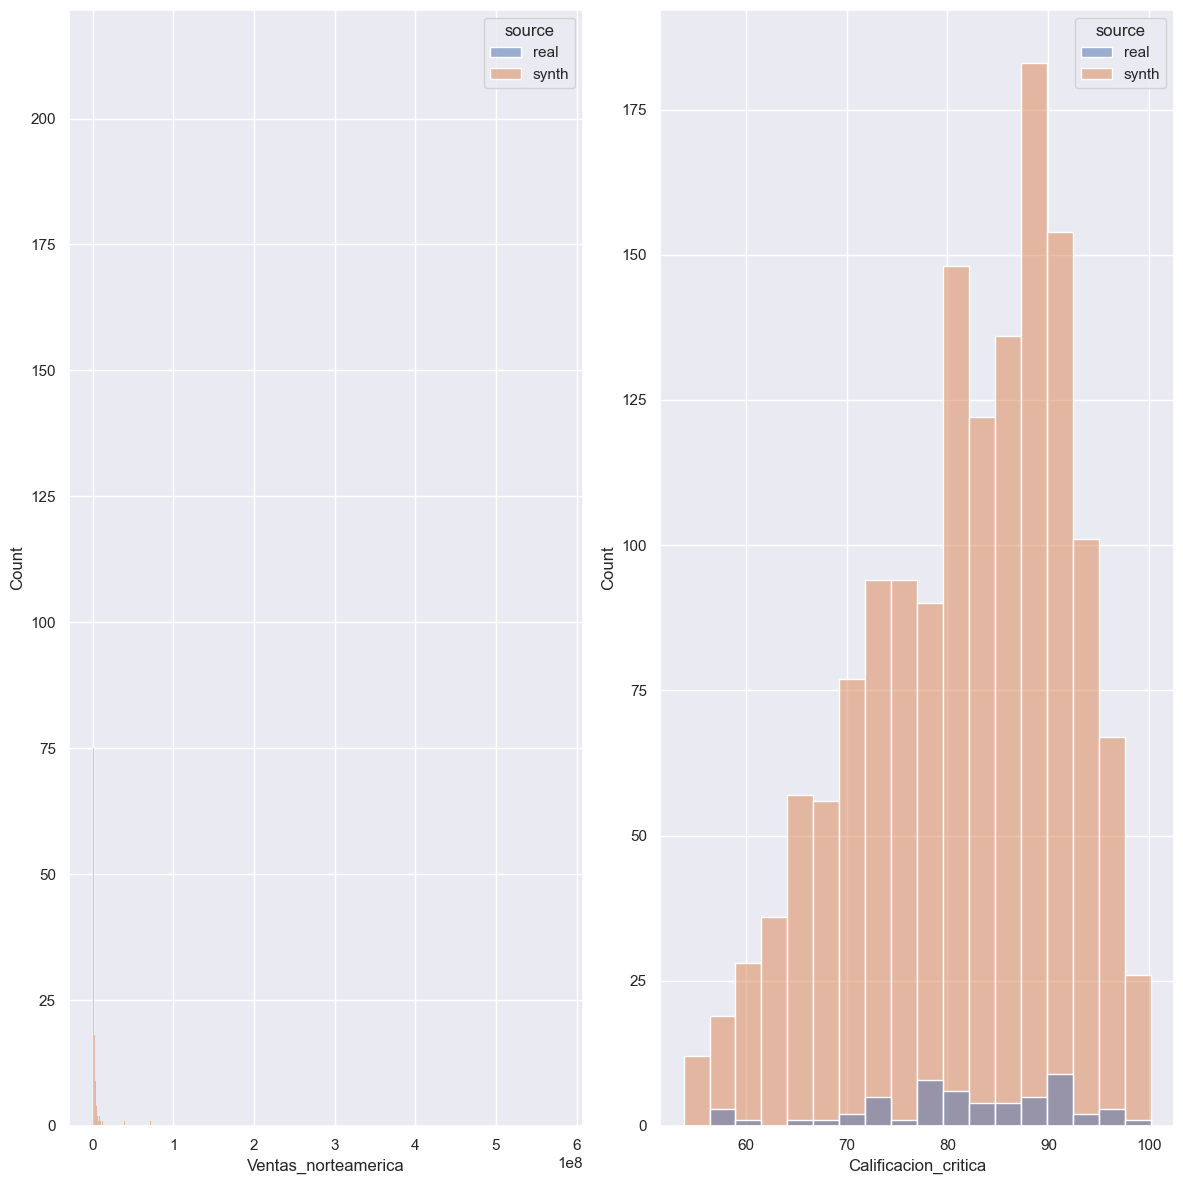

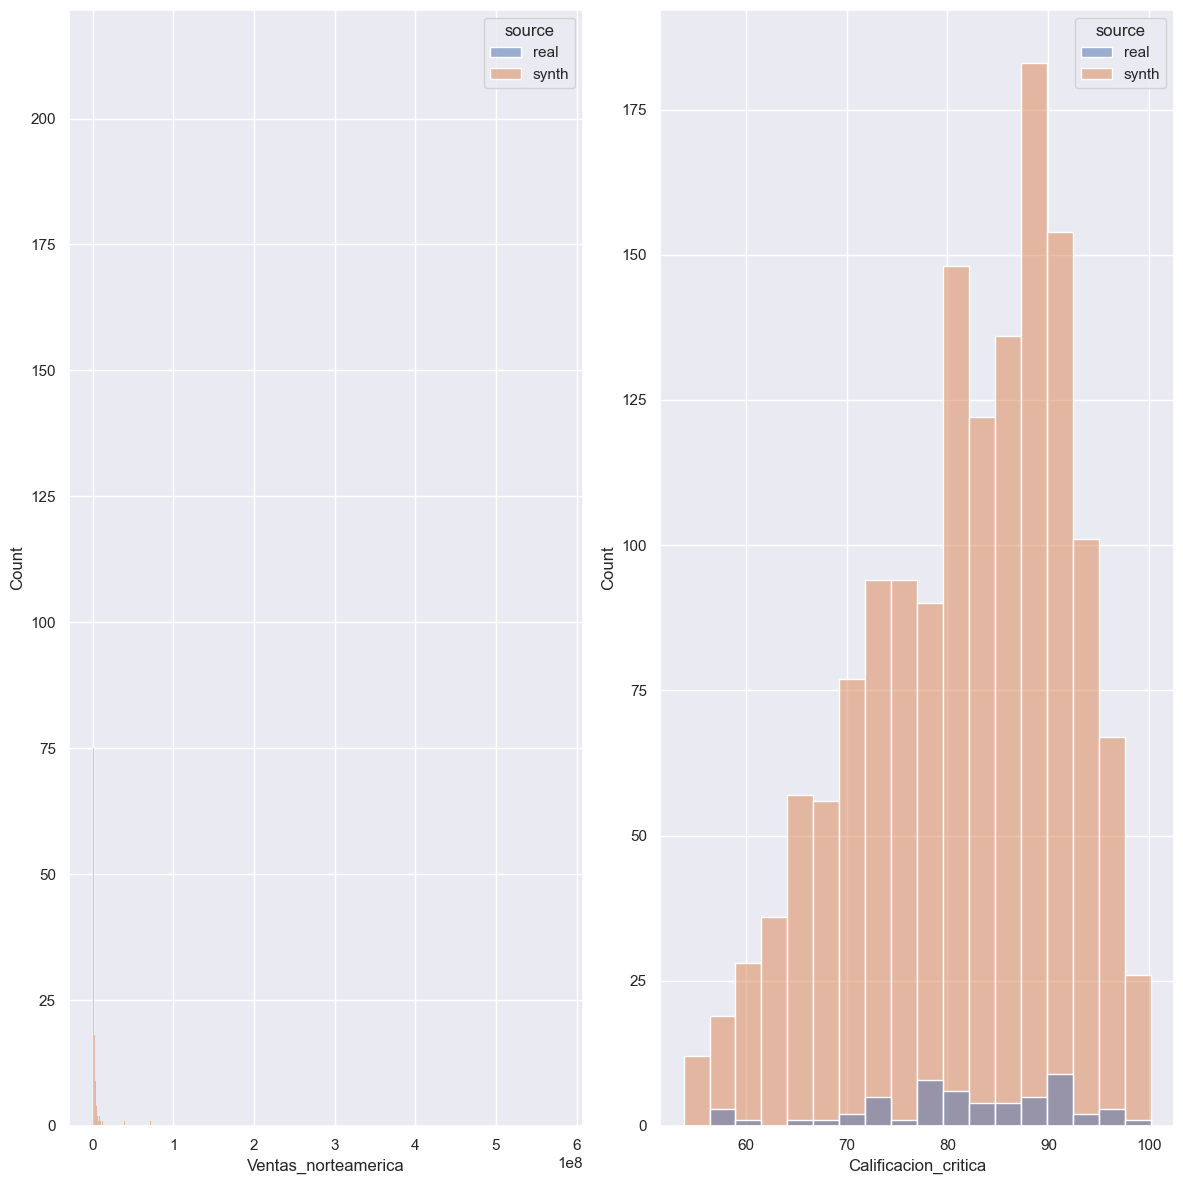

In [106]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [107]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


value
wass-Calificacion_critica                  9.436677e-01
wass-Ventas_norteamerica                   1.785614e+06
kolmogorov-Calificacion_critica-statistic  6.552381e-02
kolmogorov-Calificacion_critica-pvalue     9.623627e-01
kolmogorov-Ventas_norteamerica-statistic   6.661905e-02
kolmogorov-Ventas_norteamerica-pvalue      9.568055e-01
propensity_metrics-pmse                    3.469446e-02
propensity_metrics-pmse_standardised       1.154701e+00
propensity_metrics-pmse_ratio              1.000000e+00
pearson-msd                                2.078299e-01

In [108]:
comparison_evaluator = sg.Evaluator(pcreal, pcsyn)
comparison_evaluator.describe_numeric()

count           mean            std  \
Calificacion_critica_real    308.0      77.792208      10.756212   
Calificacion_critica_synth  1500.0      78.053017      10.831471   
Ventas_norteamerica_real     308.0  216233.766234  481207.869407   
Ventas_norteamerica_synth   1500.0  111085.298254  706771.477611   

                                     min           25%           50%  \
Calificacion_critica_real      37.000000     72.000000     79.000000   
Calificacion_critica_synth     27.856814     73.183292     79.784095   
Ventas_norteamerica_real    10000.000000  20000.000000  50000.000000   
Ventas_norteamerica_synth    4849.528421  16335.024717  28225.661925   

                                      75%           max  
Calificacion_critica_real       86.000000  9.600000e+01  
Calificacion_critica_synth      85.774478  9.879575e+01  
Ventas_norteamerica_real    150000.000000  4.030000e+06  
Ventas_norteamerica_synth    58235.467739  1.586180e+07

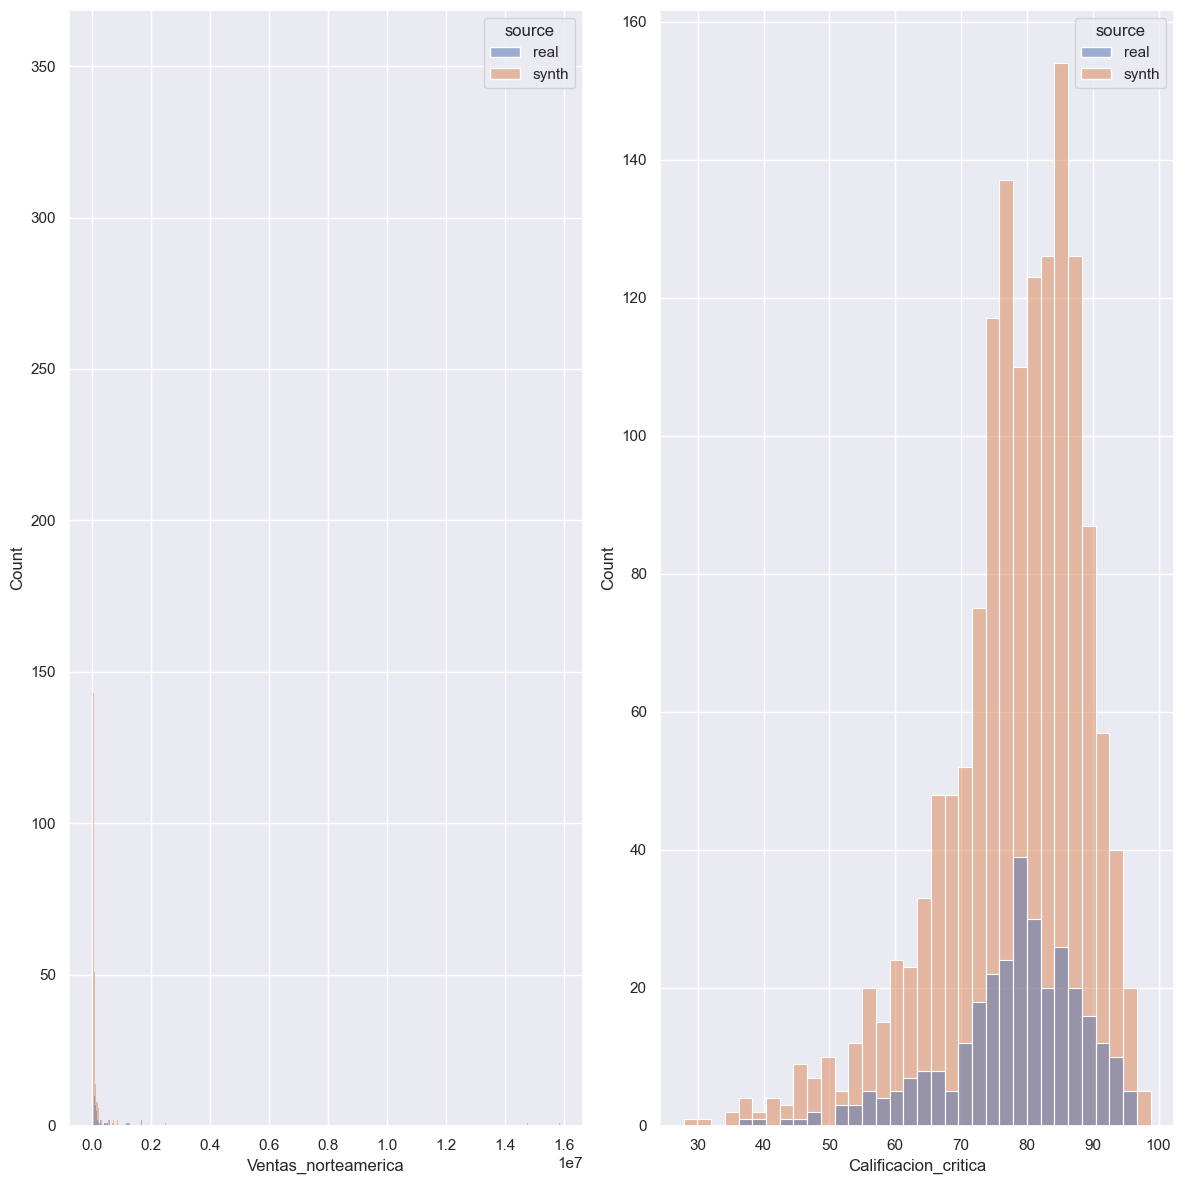

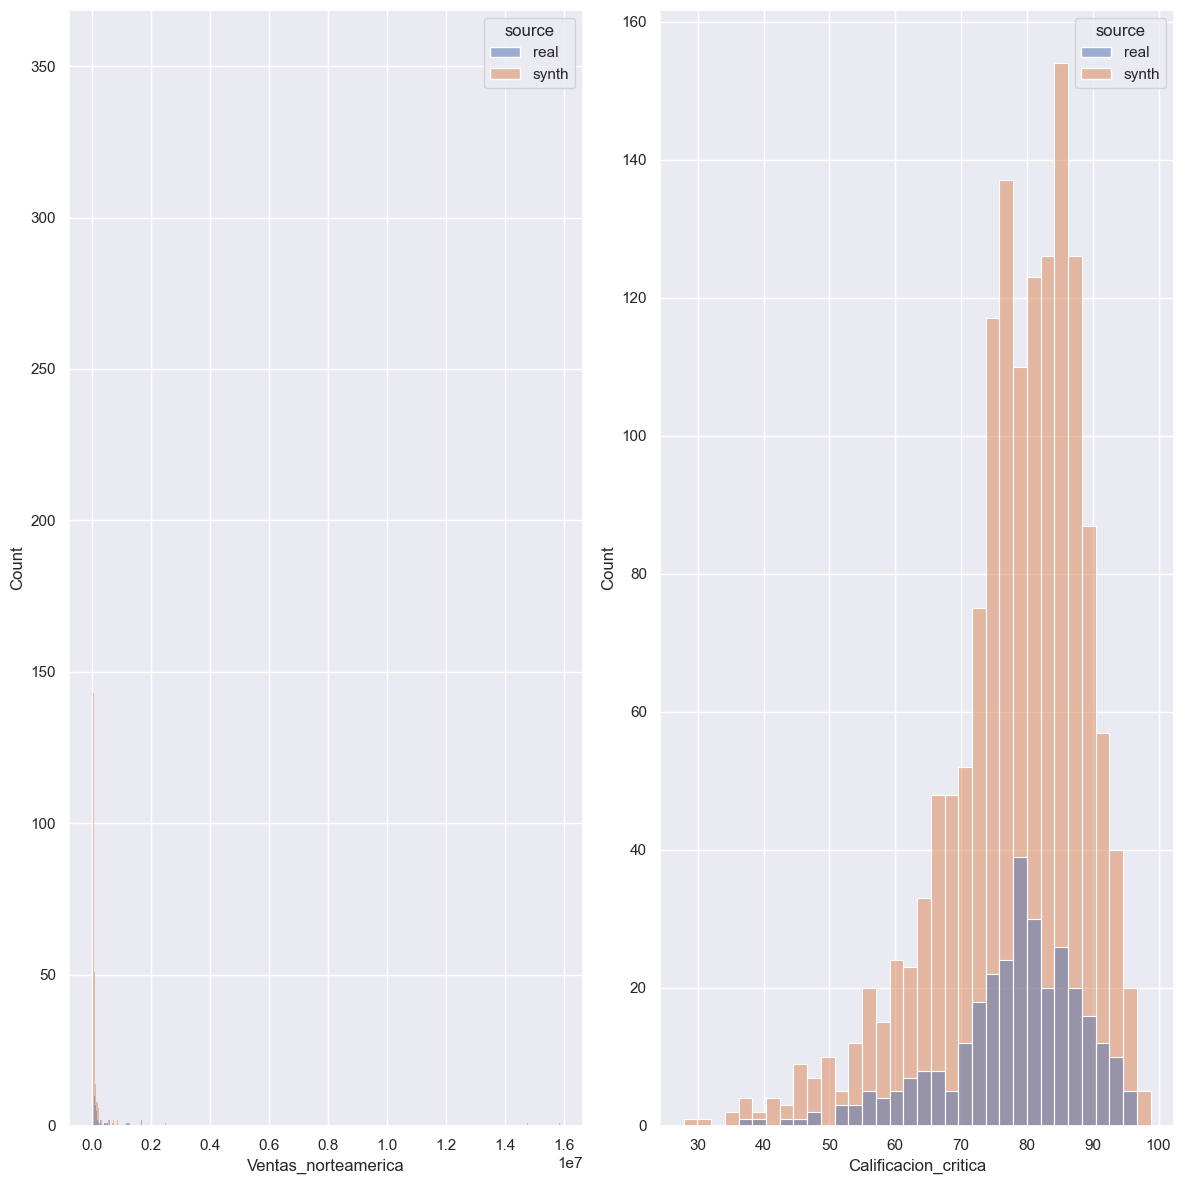

In [111]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [112]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


value
wass-Calificacion_critica                  5.506958e-01
wass-Ventas_norteamerica                   1.540131e+05
kolmogorov-Calificacion_critica-statistic  6.077056e-02
kolmogorov-Calificacion_critica-pvalue     2.883639e-01
kolmogorov-Ventas_norteamerica-statistic   2.318442e-01
kolmogorov-Ventas_norteamerica-pvalue      1.508491e-12
propensity_metrics-pmse                    1.366045e-01
propensity_metrics-pmse_standardised       5.349589e-01
propensity_metrics-pmse_ratio              1.004096e+00
pearson-msd                                4.809089e-02

In [113]:
comparison_evaluator = sg.Evaluator(ps2real, ps2syn)
comparison_evaluator.describe_numeric()

count           mean           std           min  \
Calificacion_critica_real   1280.0      68.769531  1.307245e+01     24.000000   
Calificacion_critica_synth  1500.0      68.804243  1.313790e+01     23.658594   
Ventas_norteamerica_real    1280.0  388539.062500  7.020868e+05  10000.000000   
Ventas_norteamerica_synth   1500.0  576769.452462  2.975416e+06  10022.181853   

                                     25%            50%            75%  \
Calificacion_critica_real      60.000000      70.000000      78.000000   
Calificacion_critica_synth     60.062335      68.862294      77.547649   
Ventas_norteamerica_real    60000.000000  140000.000000  410000.000000   
Ventas_norteamerica_synth   66677.518712  154142.178391  401869.077170   

                                     max  
Calificacion_critica_real   9.700000e+01  
Calificacion_critica_synth  1.152332e+02  
Ventas_norteamerica_real    9.430000e+06  
Ventas_norteamerica_synth   7.050316e+07

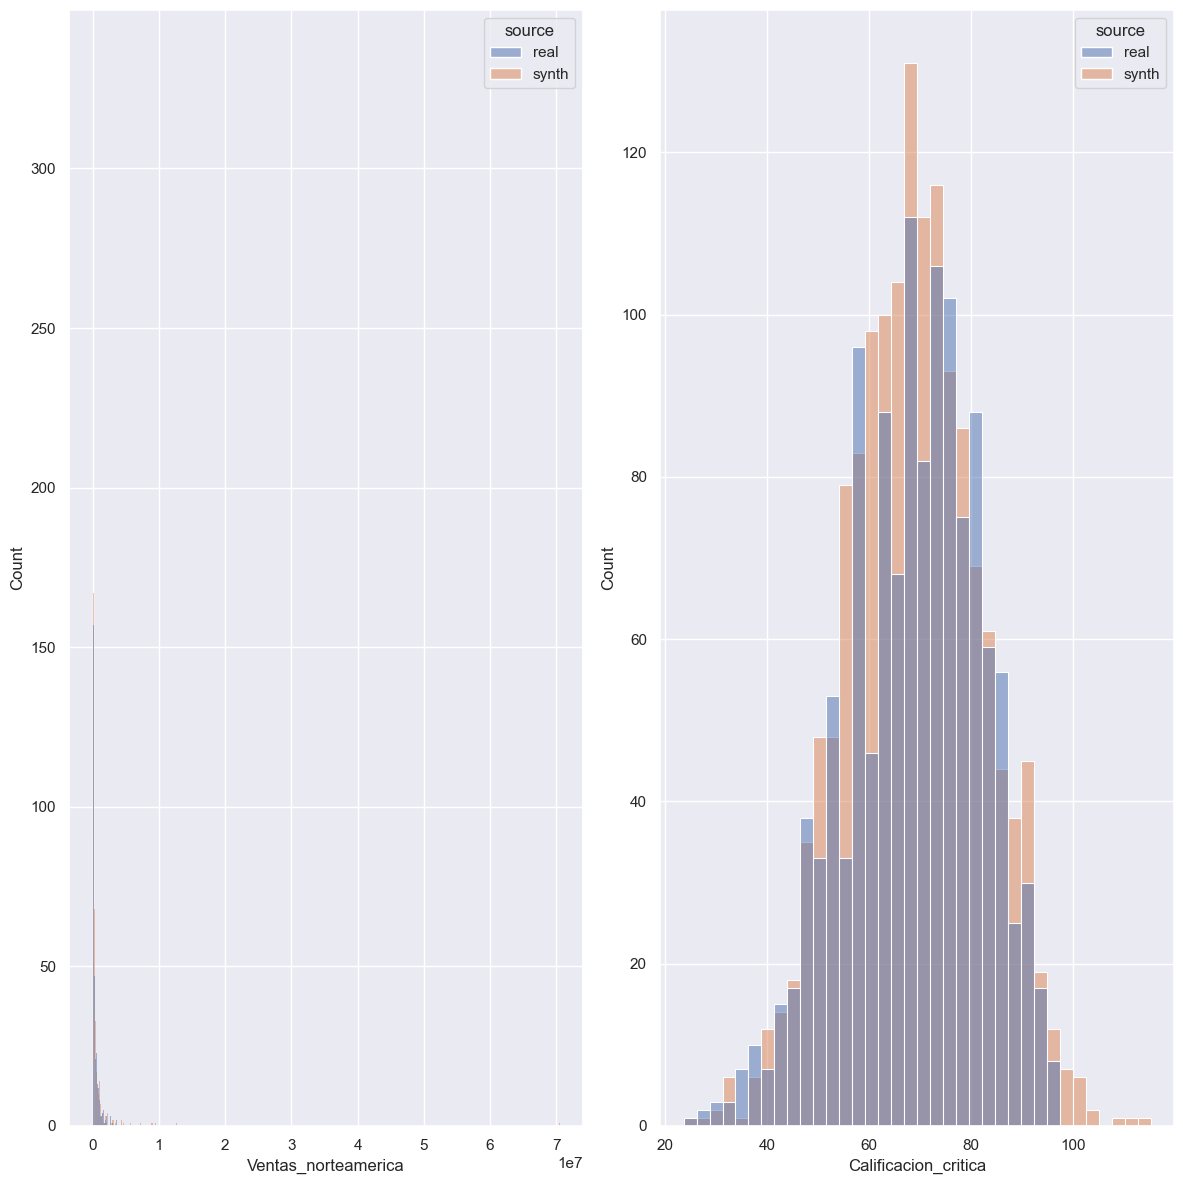

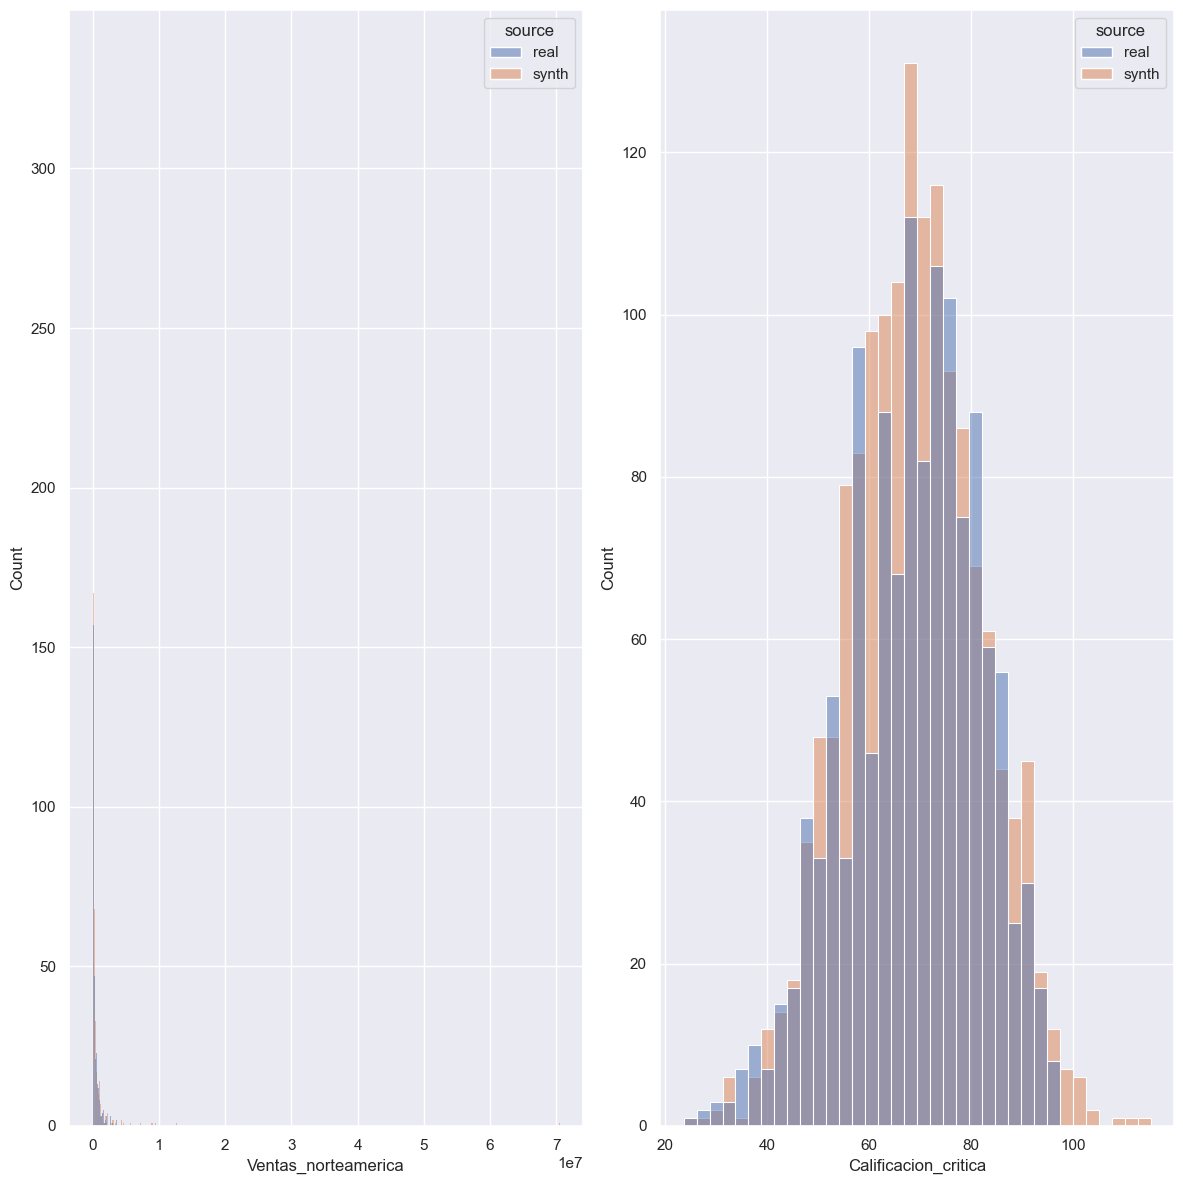

In [114]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [115]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


value
wass-Calificacion_critica                       0.994025
wass-Ventas_norteamerica                   199025.624234
kolmogorov-Calificacion_critica-statistic       0.053531
kolmogorov-Calificacion_critica-pvalue          0.036439
kolmogorov-Ventas_norteamerica-statistic        0.033823
kolmogorov-Ventas_norteamerica-pvalue           0.396839
propensity_metrics-pmse                         0.221799
propensity_metrics-pmse_standardised            0.171209
propensity_metrics-pmse_ratio                   1.001030
pearson-msd                                     0.179641

In [117]:
comparison_evaluator = sg.Evaluator(ps3real, ps3syn)
comparison_evaluator.describe_numeric()

count           mean            std  \
Calificacion_critica_real    784.0      70.545918      14.094932   
Calificacion_critica_synth  1500.0      69.927530      14.920343   
Ventas_norteamerica_real     784.0  443788.265306  699214.710812   
Ventas_norteamerica_synth   1500.0  467436.497984  779264.769264   

                                     min            25%            50%  \
Calificacion_critica_real      13.000000      61.000000      73.000000   
Calificacion_critica_synth    -35.066972      61.974041      72.461950   
Ventas_norteamerica_real    10000.000000  110000.000000  220000.000000   
Ventas_norteamerica_synth   10071.441723   99083.242698  240429.078035   

                                      75%           max  
Calificacion_critica_real       81.000000  9.800000e+01  
Calificacion_critica_synth      80.138445  1.007898e+02  
Ventas_norteamerica_real    460000.000000  7.020000e+06  
Ventas_norteamerica_synth   520517.219865  1.179347e+07

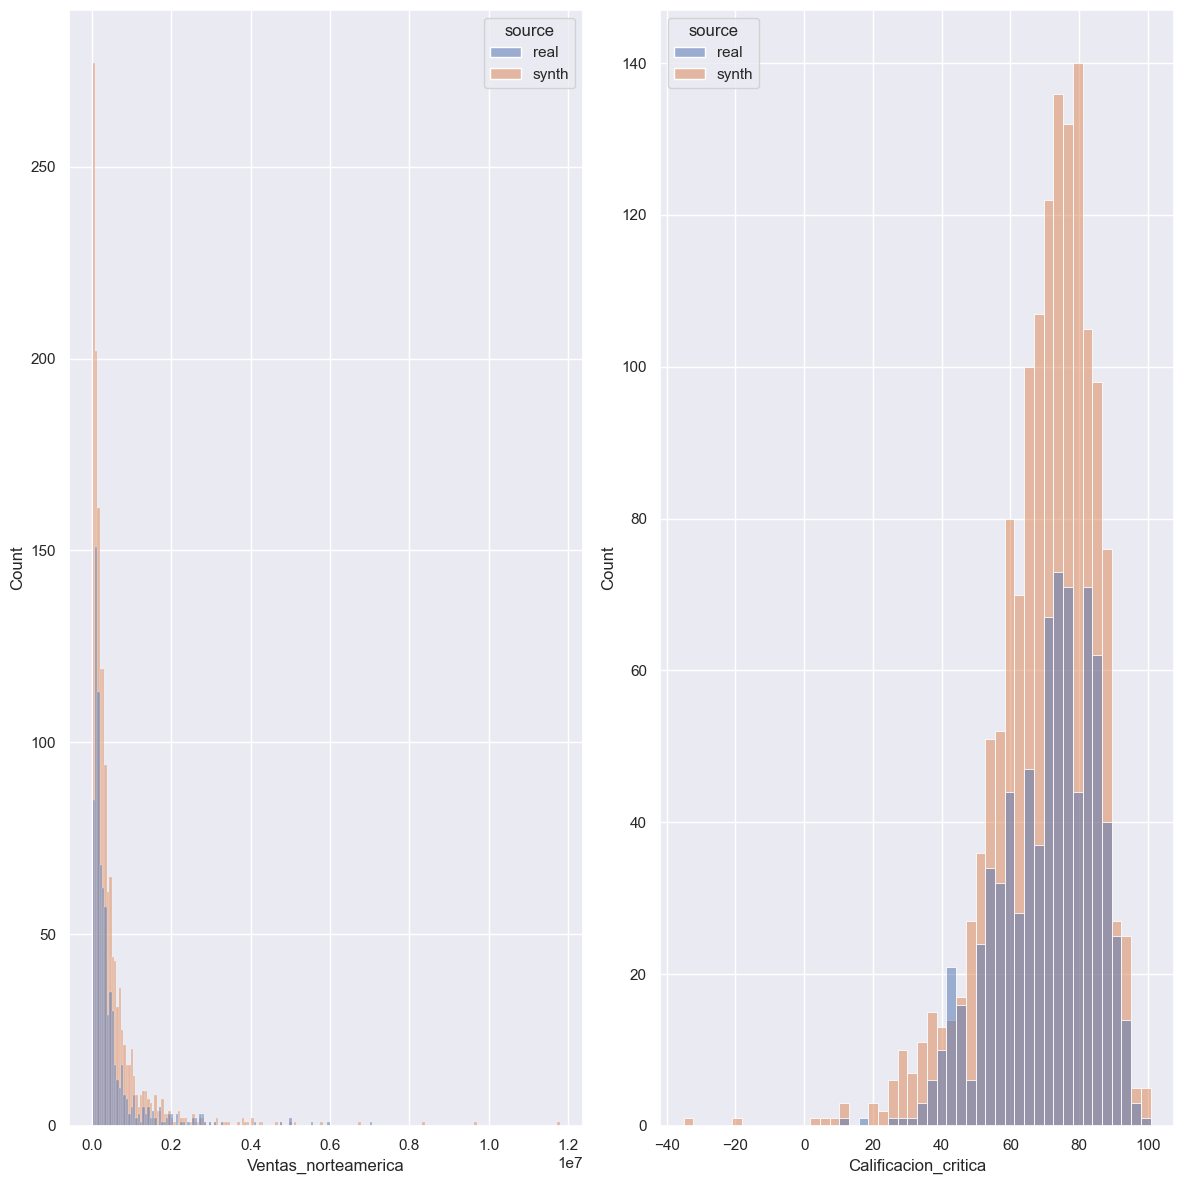

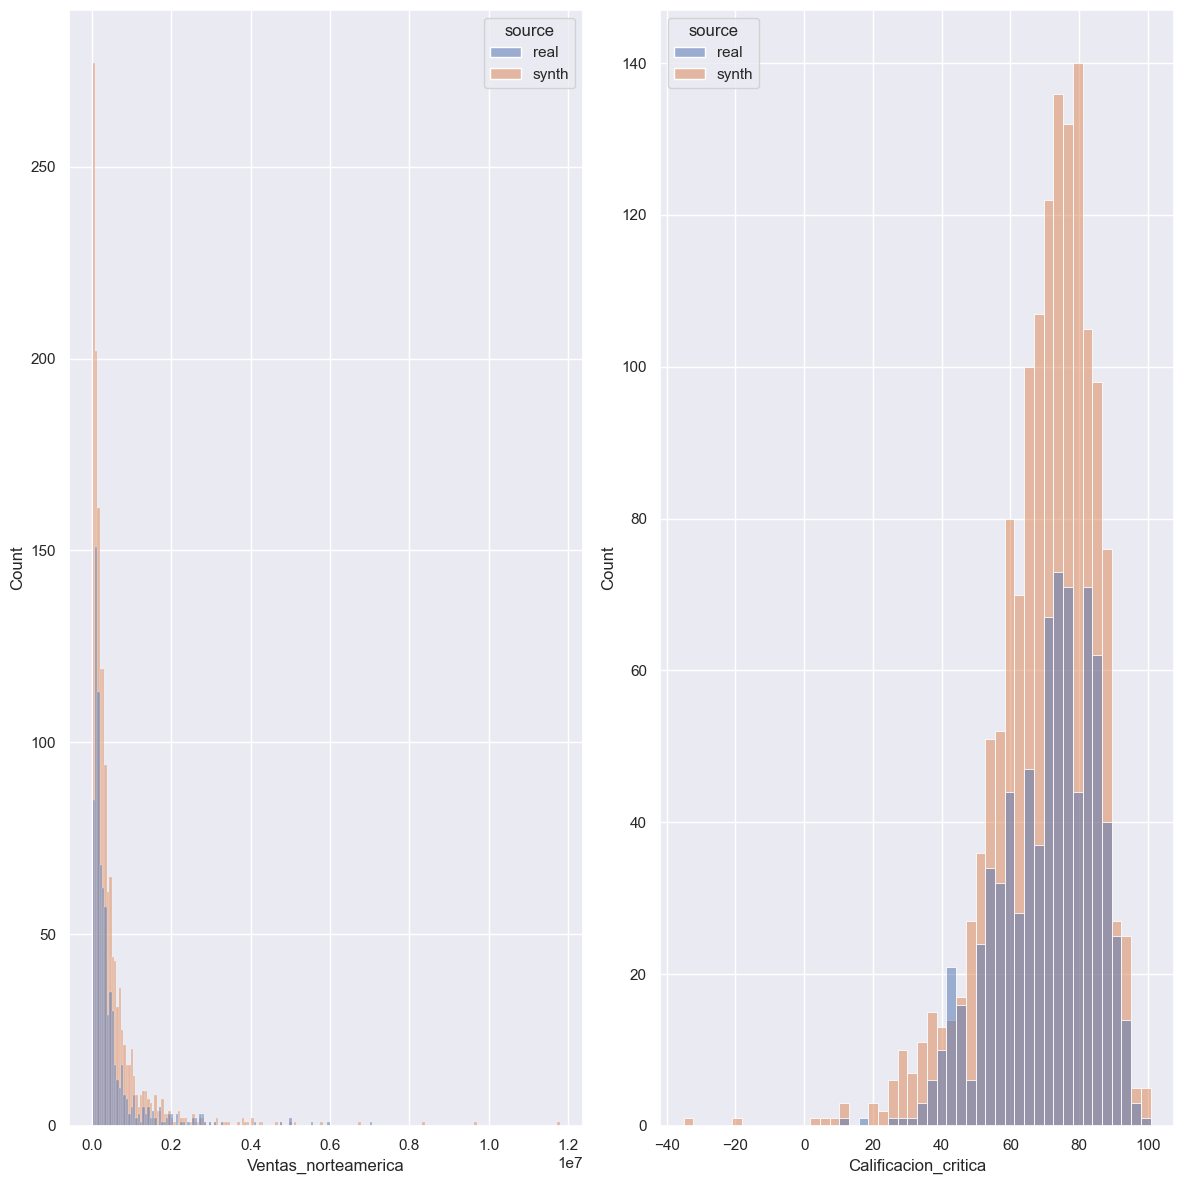

In [118]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [119]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


value
wass-Calificacion_critica                      1.124031
wass-Ventas_norteamerica                   45401.622361
kolmogorov-Calificacion_critica-statistic      0.057282
kolmogorov-Calificacion_critica-pvalue         0.064894
kolmogorov-Ventas_norteamerica-statistic       0.076248
kolmogorov-Ventas_norteamerica-pvalue          0.004692
propensity_metrics-pmse                        0.215362
propensity_metrics-pmse_standardised           0.964706
propensity_metrics-pmse_ratio                  1.005596
pearson-msd                                    0.219710

In [120]:
comparison_evaluator = sg.Evaluator(ps4real, ps4syn)
comparison_evaluator.describe_numeric()

count           mean            std  \
Calificacion_critica_real    213.0      73.389671      11.836276   
Calificacion_critica_synth  1500.0      75.697652      10.975034   
Ventas_norteamerica_real     213.0  396713.615023  593912.116023   
Ventas_norteamerica_synth   1500.0  427690.717069  780354.041621   

                                     min           25%            50%  \
Calificacion_critica_real      19.000000     68.000000      75.000000   
Calificacion_critica_synth     14.704815     69.233552      75.871937   
Ventas_norteamerica_real    10000.000000  40000.000000  140000.000000   
Ventas_norteamerica_synth    6503.457110  35289.952644  125871.659987   

                                      75%           max  
Calificacion_critica_real       81.000000  9.700000e+01  
Calificacion_critica_synth      81.699668  1.253414e+02  
Ventas_norteamerica_real    470000.000000  3.960000e+06  
Ventas_norteamerica_synth   448553.130529  1.186764e+07

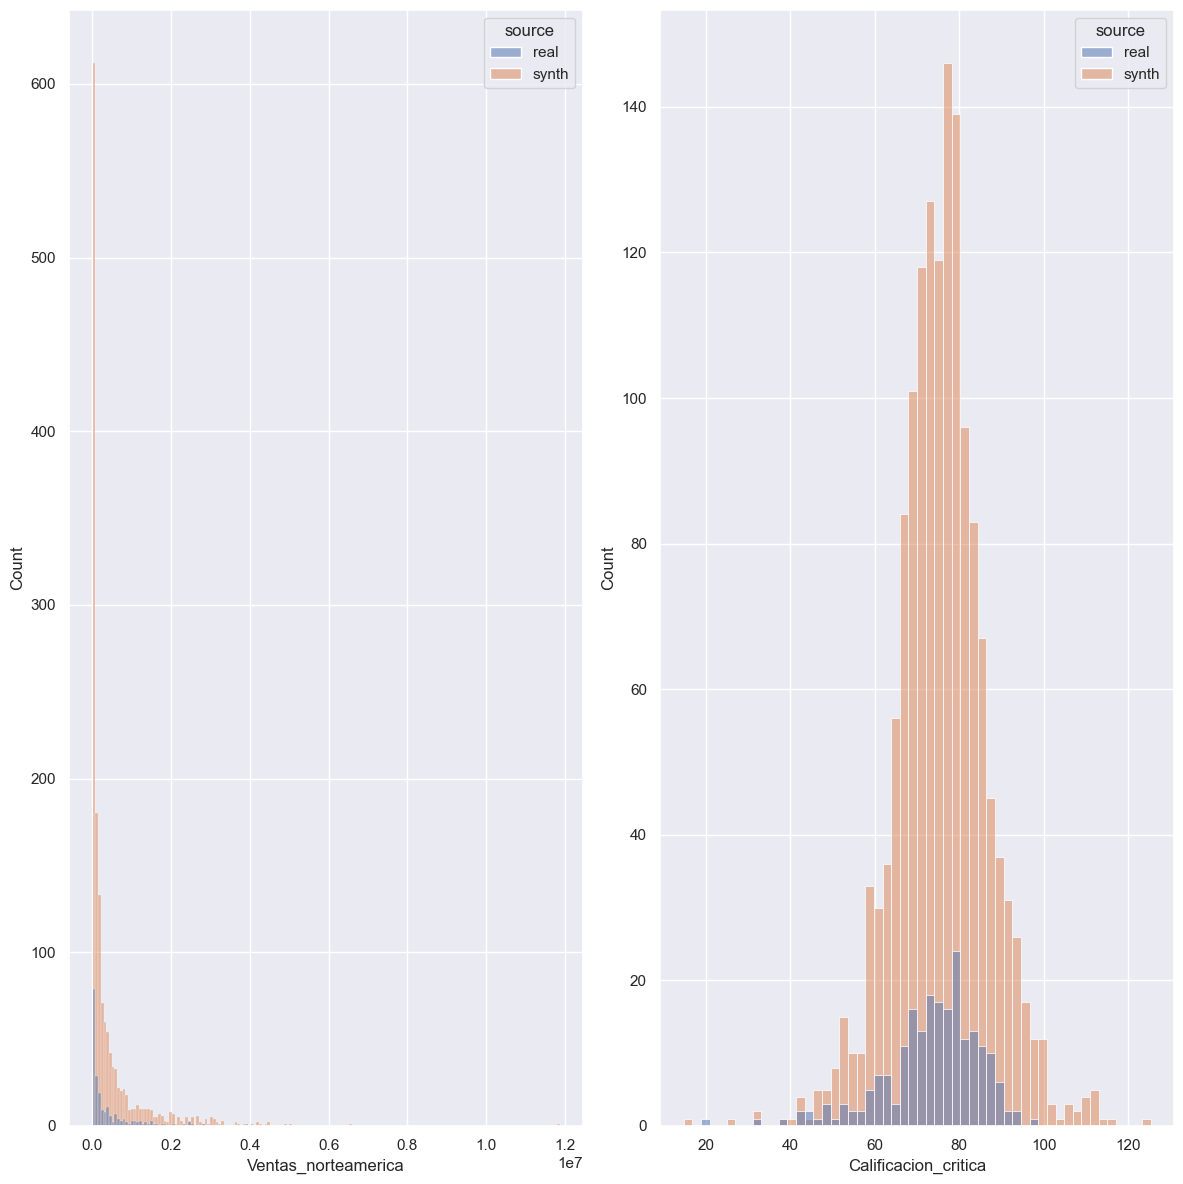

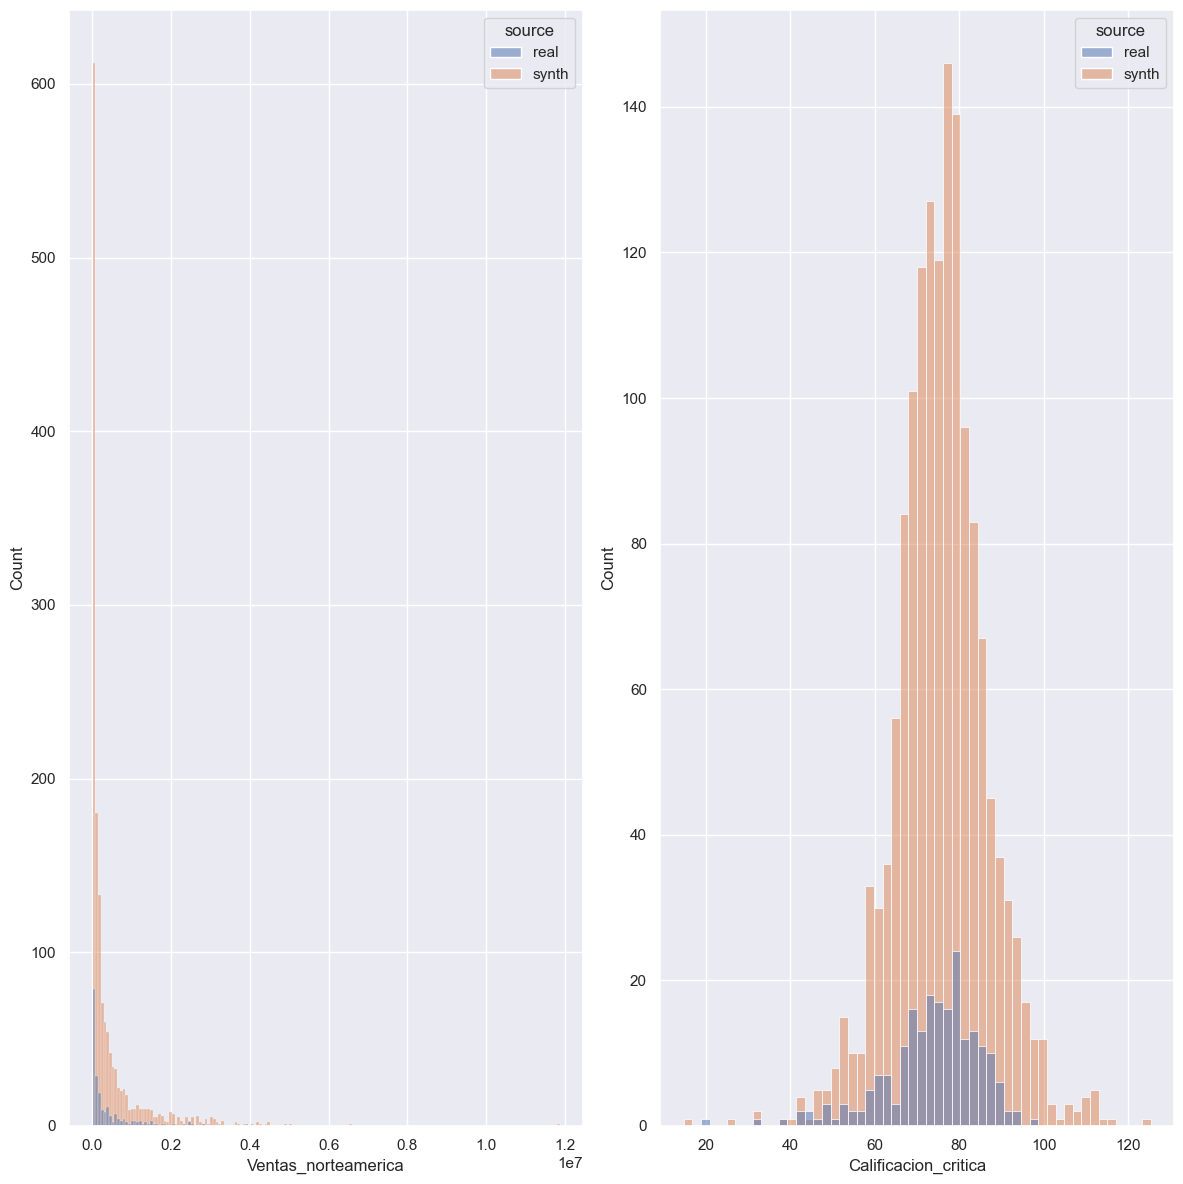

In [121]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [122]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


value
wass-Calificacion_critica                      2.351222
wass-Ventas_norteamerica                   64676.036870
kolmogorov-Calificacion_critica-statistic      0.079070
kolmogorov-Calificacion_critica-pvalue         0.182912
kolmogorov-Ventas_norteamerica-statistic       0.071183
kolmogorov-Ventas_norteamerica-pvalue          0.285791
propensity_metrics-pmse                        0.107423
propensity_metrics-pmse_standardised          -1.740098
propensity_metrics-pmse_ratio                  0.993119
pearson-msd                                    0.153171

In [123]:
comparison_evaluator = sg.Evaluator(pspreal, pspsyn)
comparison_evaluator.describe_numeric()

count           mean           std           min  \
Calificacion_critica_real    447.0      67.357942  1.178210e+01     28.000000   
Calificacion_critica_synth  1500.0      67.618712  1.178177e+01     11.149474   
Ventas_norteamerica_real     447.0  198814.317673  2.864921e+05  10000.000000   
Ventas_norteamerica_synth   1500.0  362658.453825  2.414968e+06    405.854279   

                                     25%            50%            75%  \
Calificacion_critica_real      60.000000      68.000000      76.000000   
Calificacion_critica_synth     60.649313      68.763716      76.414062   
Ventas_norteamerica_real    60000.000000  110000.000000  220000.000000   
Ventas_norteamerica_synth   58511.451966  115746.180237  219071.475383   

                                     max  
Calificacion_critica_real   9.100000e+01  
Calificacion_critica_synth  9.073645e+01  
Ventas_norteamerica_real    2.900000e+06  
Ventas_norteamerica_synth   7.734040e+07

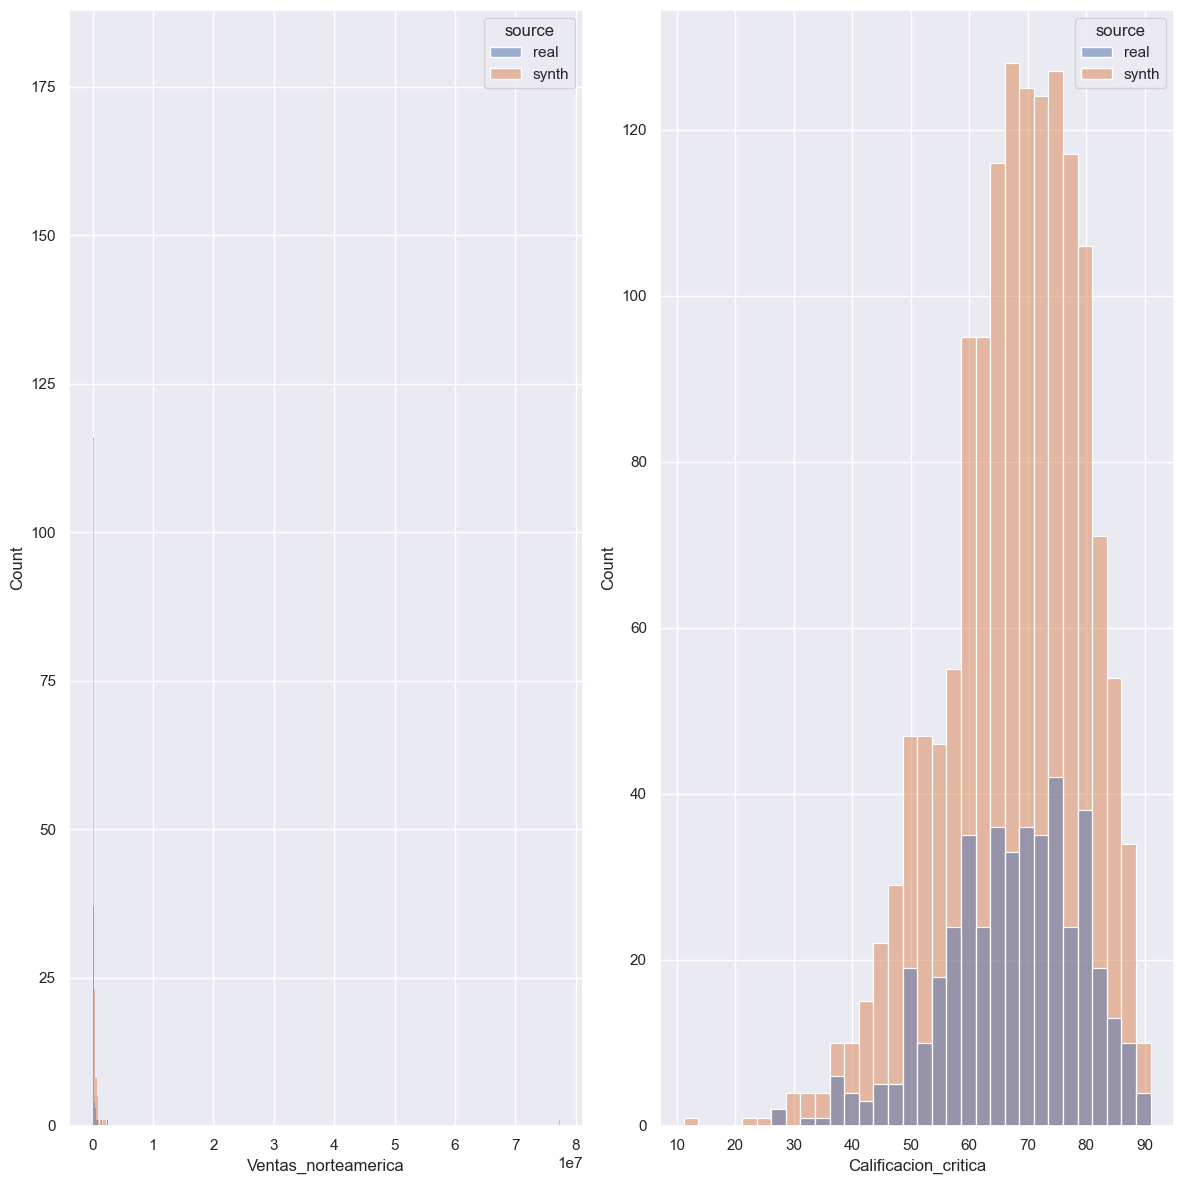

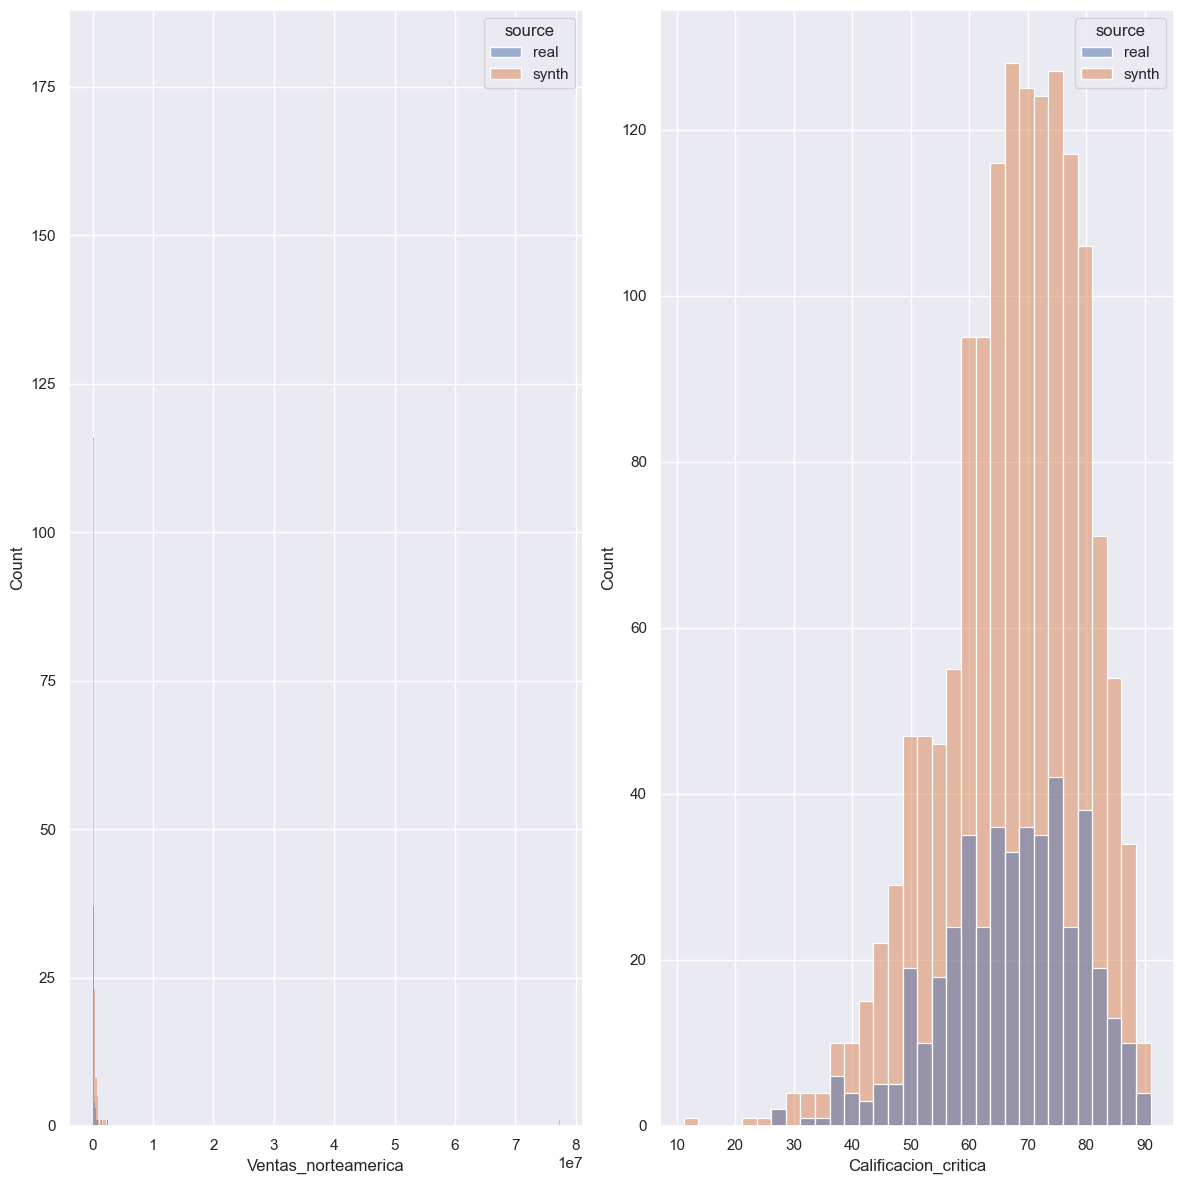

In [124]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [125]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


value
wass-Calificacion_critica                       0.561379
wass-Ventas_norteamerica                   167309.778436
kolmogorov-Calificacion_critica-statistic       0.055928
kolmogorov-Calificacion_critica-pvalue          0.221589
kolmogorov-Ventas_norteamerica-statistic        0.058886
kolmogorov-Ventas_norteamerica-pvalue           0.175066
propensity_metrics-pmse                         0.171525
propensity_metrics-pmse_standardised            0.425115
propensity_metrics-pmse_ratio                   1.001875
pearson-msd                                     0.094951

In [126]:
comparison_evaluator = sg.Evaluator(psreal, pssyn)
comparison_evaluator.describe_numeric()

count           mean           std           min  \
Calificacion_critica_real    198.0      71.414141  1.671682e+01     26.000000   
Calificacion_critica_synth  1500.0      70.734266  1.619421e+01     16.783872   
Ventas_norteamerica_real     198.0  530707.070707  8.293986e+05  10000.000000   
Ventas_norteamerica_synth   1500.0  541224.594273  1.057097e+06   4025.240238   

                                     25%            50%            75%  \
Calificacion_critica_real      62.000000      73.500000      85.000000   
Calificacion_critica_synth     60.885283      73.146106      83.194739   
Ventas_norteamerica_real    80000.000000  190000.000000  517500.000000   
Ventas_norteamerica_synth   72761.149512  185072.030636  508127.020807   

                                     max  
Calificacion_critica_real   9.800000e+01  
Calificacion_critica_synth  9.817372e+01  
Ventas_norteamerica_real    4.020000e+06  
Ventas_norteamerica_synth   1.416701e+07

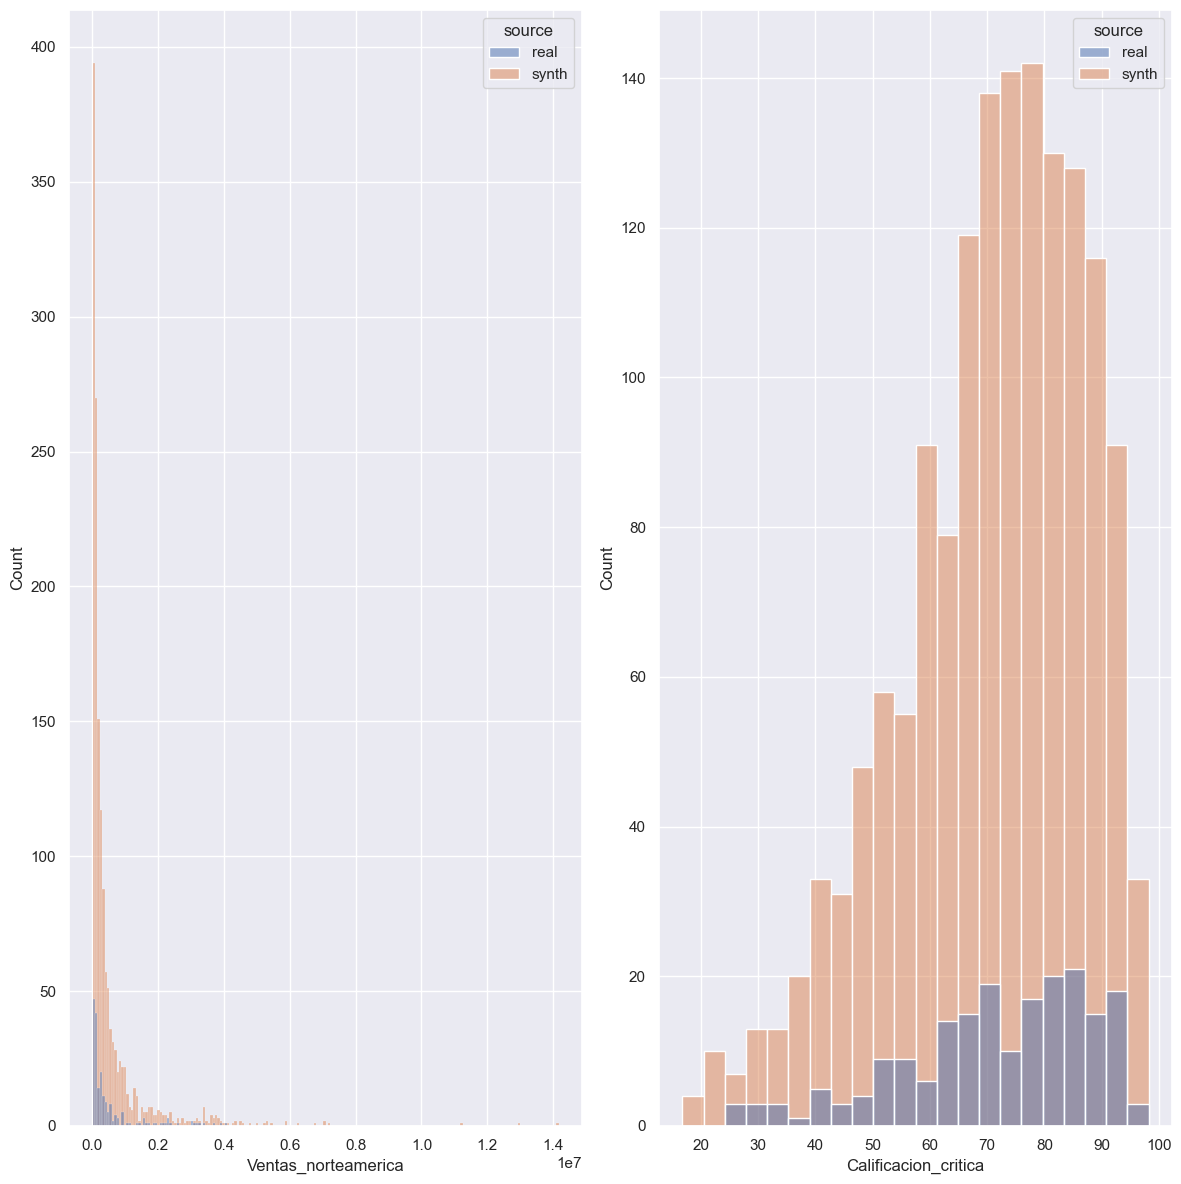

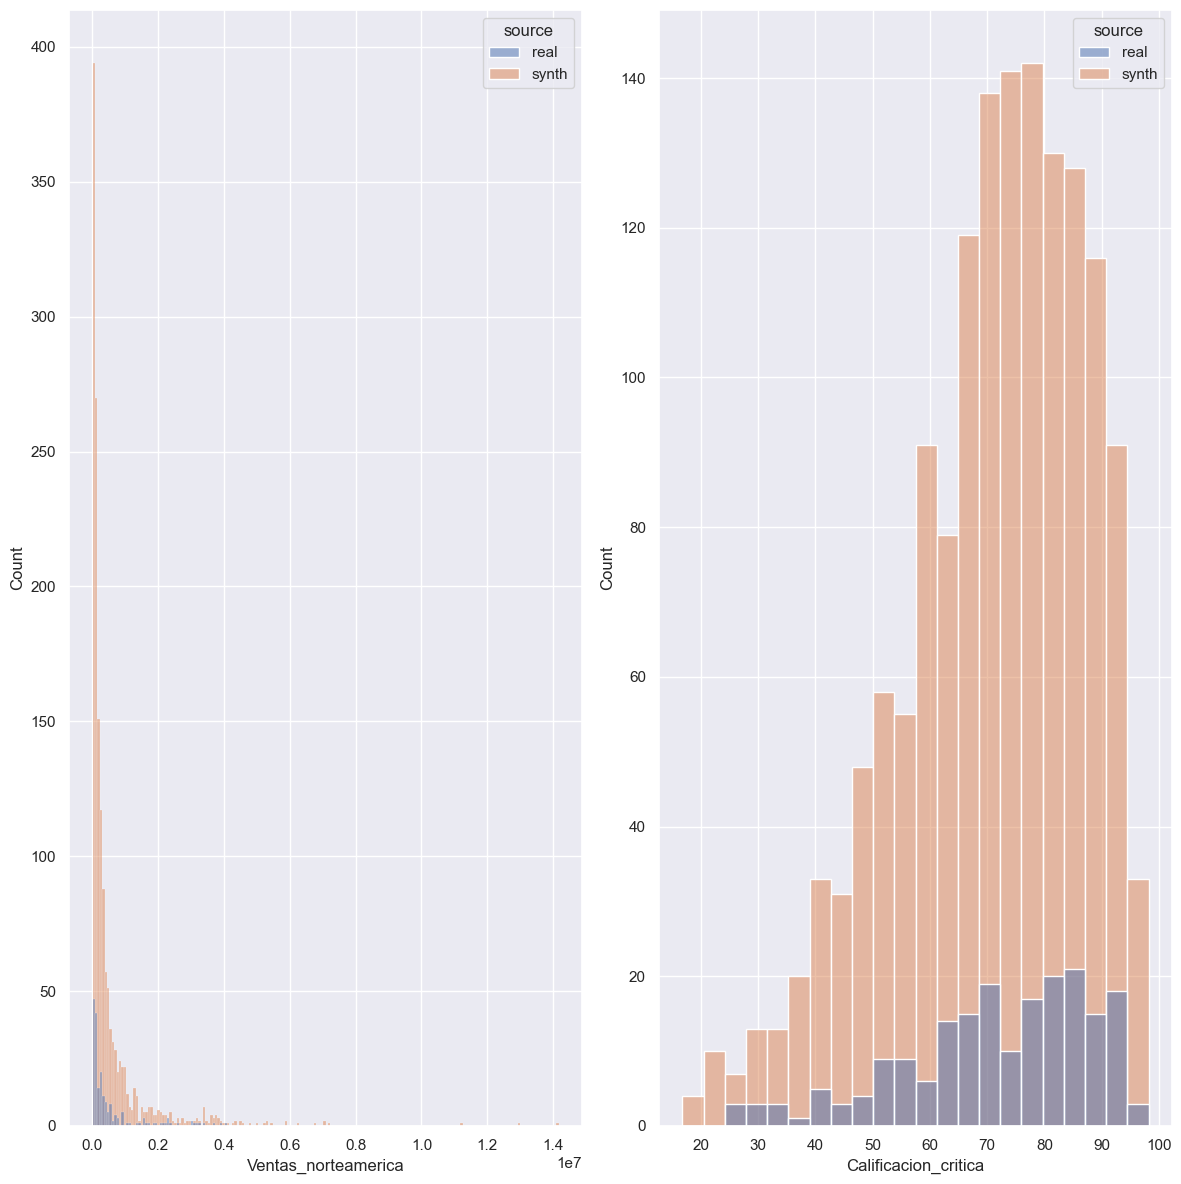

In [127]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [128]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


value
wass-Calificacion_critica                      1.136816
wass-Ventas_norteamerica                   85928.609198
kolmogorov-Calificacion_critica-statistic      0.074687
kolmogorov-Calificacion_critica-pvalue         0.268467
kolmogorov-Ventas_norteamerica-statistic       0.044364
kolmogorov-Ventas_norteamerica-pvalue          0.864291
propensity_metrics-pmse                        0.102716
propensity_metrics-pmse_standardised          -1.000000
propensity_metrics-pmse_ratio                  0.998569
pearson-msd                                    0.200857

In [129]:
comparison_evaluator = sg.Evaluator(psvreal, psvsyn)
comparison_evaluator.describe_numeric()

count           mean            std  \
Calificacion_critica_real     90.0      70.677778      11.631831   
Calificacion_critica_synth  1500.0      72.954542      11.713826   
Ventas_norteamerica_real      90.0  111666.666667  124334.181801   
Ventas_norteamerica_synth   1500.0  104029.734135  115525.817225   

                                     min           25%           50%  \
Calificacion_critica_real      33.000000     63.250000     71.000000   
Calificacion_critica_synth     15.600192     65.604973     72.653657   
Ventas_norteamerica_real    10000.000000  30000.000000  80000.000000   
Ventas_norteamerica_synth    5071.705442  30127.539796  63042.457968   

                                      75%           max  
Calificacion_critica_real       79.000000  9.300000e+01  
Calificacion_critica_synth      80.384286  1.246940e+02  
Ventas_norteamerica_real    150000.000000  7.100000e+05  
Ventas_norteamerica_synth   134771.516656  1.025371e+06

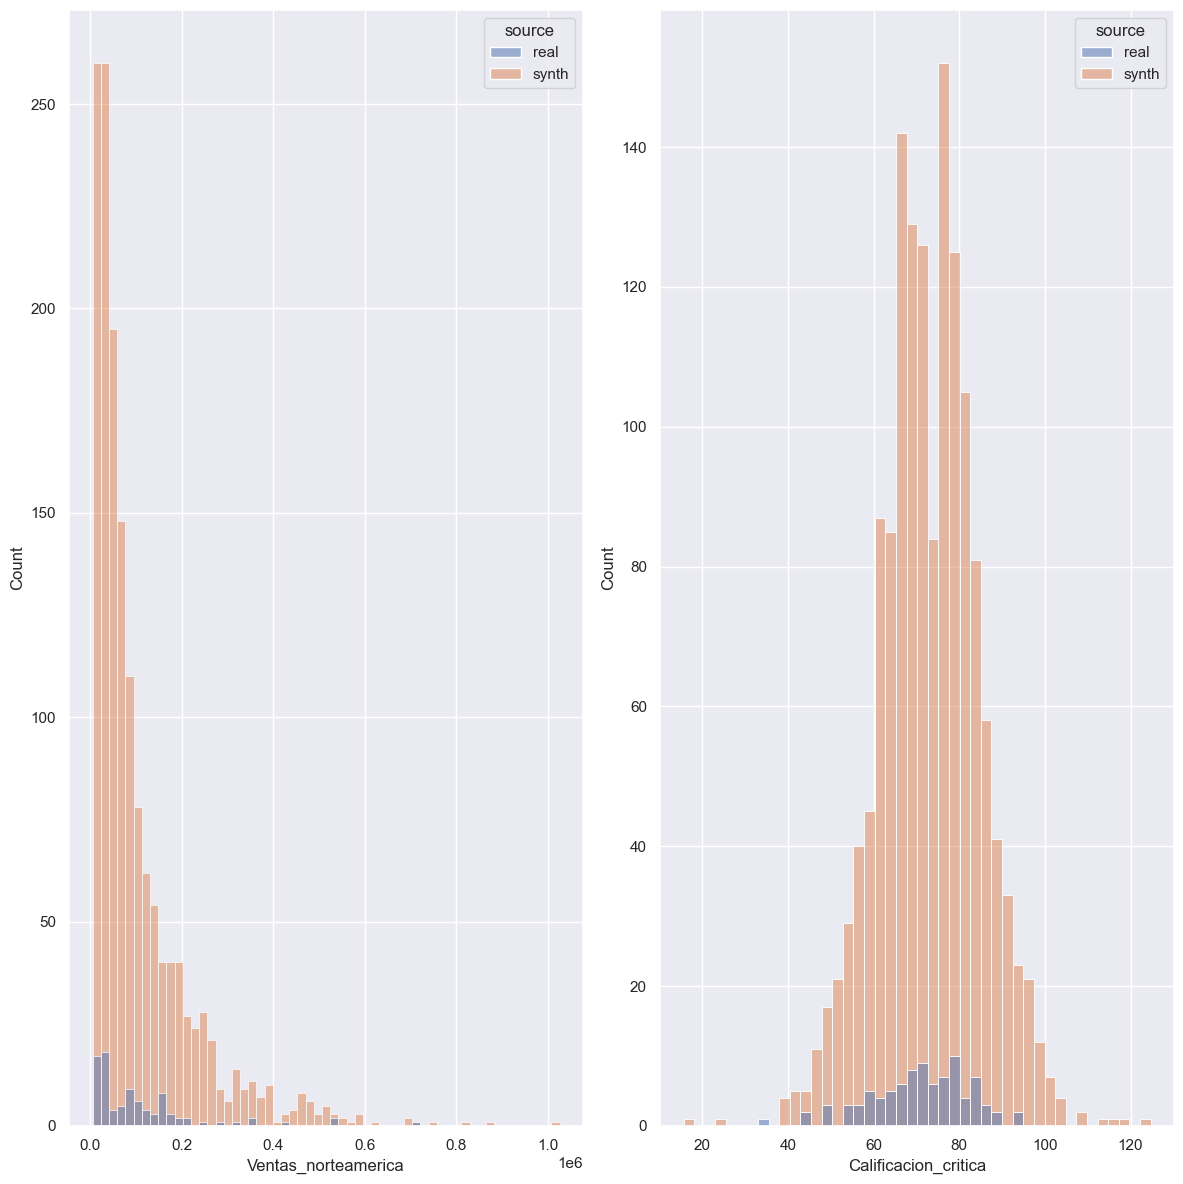

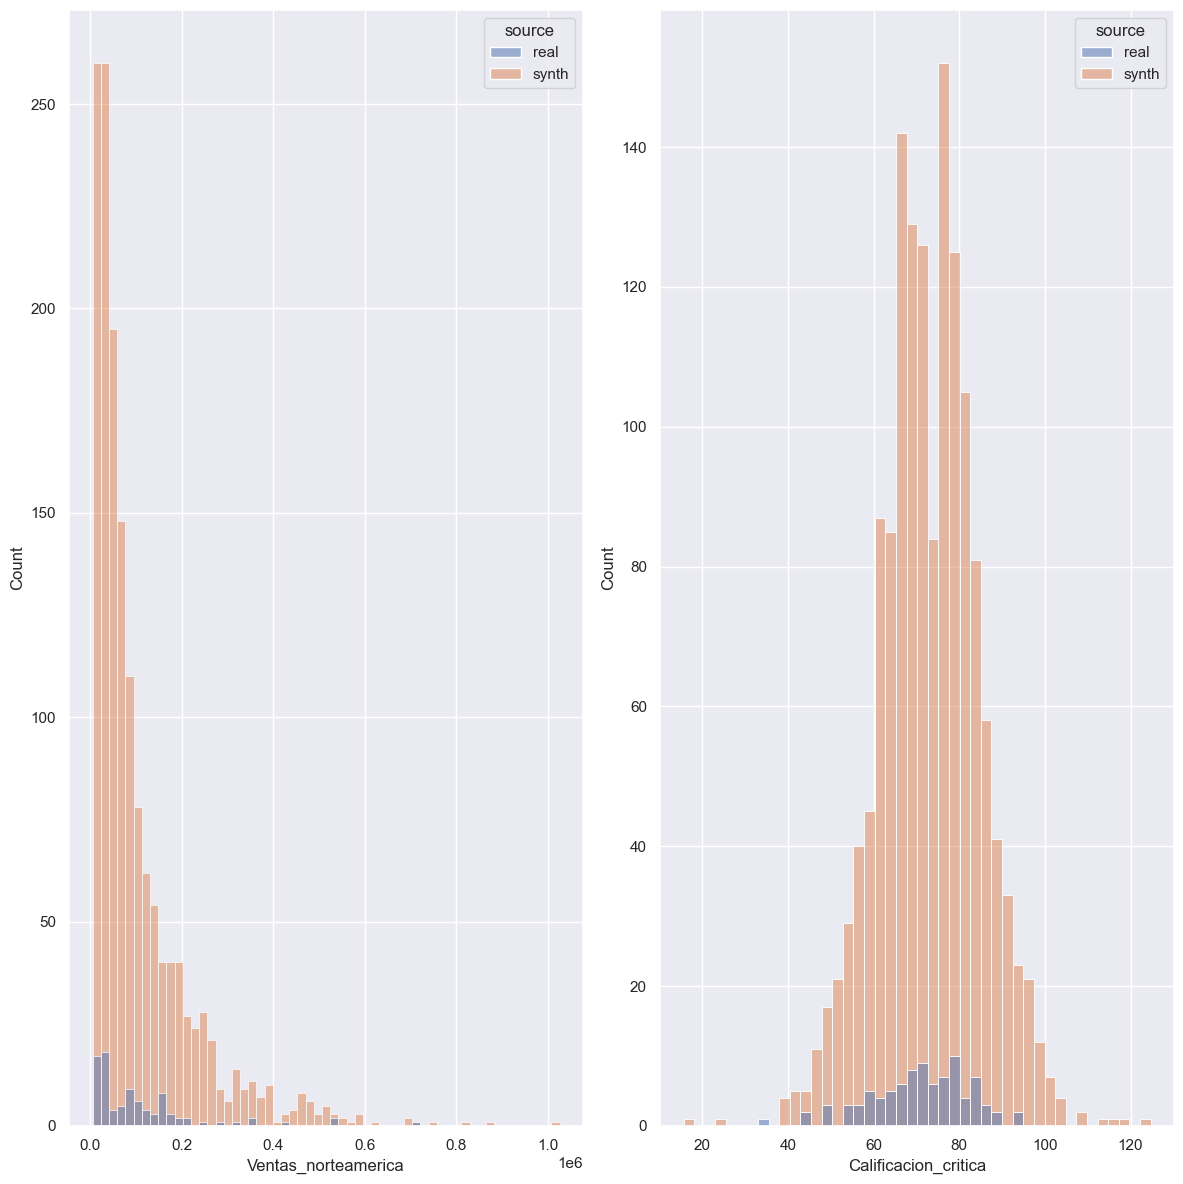

In [130]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [132]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


value
wass-Calificacion_critica                      2.326440
wass-Ventas_norteamerica                   12485.001633
kolmogorov-Calificacion_critica-statistic      0.089111
kolmogorov-Calificacion_critica-pvalue         0.482956
kolmogorov-Ventas_norteamerica-statistic       0.099111
kolmogorov-Ventas_norteamerica-pvalue          0.351559
propensity_metrics-pmse                        0.053400
propensity_metrics-pmse_standardised           0.672692
propensity_metrics-pmse_ratio                  1.002657
pearson-msd                                    0.000599

In [133]:
comparison_evaluator = sg.Evaluator(wiireal, wiisyn)
comparison_evaluator.describe_numeric()

count           mean           std           min  \
Calificacion_critica_real    580.0      62.817241  1.493016e+01     19.000000   
Calificacion_critica_synth  1500.0      62.874022  1.674936e+01    -65.799279   
Ventas_norteamerica_real     580.0  635672.413793  2.254770e+06  10000.000000   
Ventas_norteamerica_synth   1500.0  833014.797152  1.124901e+07  10415.348188   

                                      25%            50%            75%  \
Calificacion_critica_real       53.000000      65.000000      74.000000   
Calificacion_critica_synth      53.837622      65.732932      74.735784   
Ventas_norteamerica_real    100000.000000  215000.000000  460000.000000   
Ventas_norteamerica_synth    88601.909559  229212.512567  516672.119261   

                                     max  
Calificacion_critica_real   9.700000e+01  
Calificacion_critica_synth  9.648688e+01  
Ventas_norteamerica_real    4.136000e+07  
Ventas_norteamerica_synth   4.313786e+08

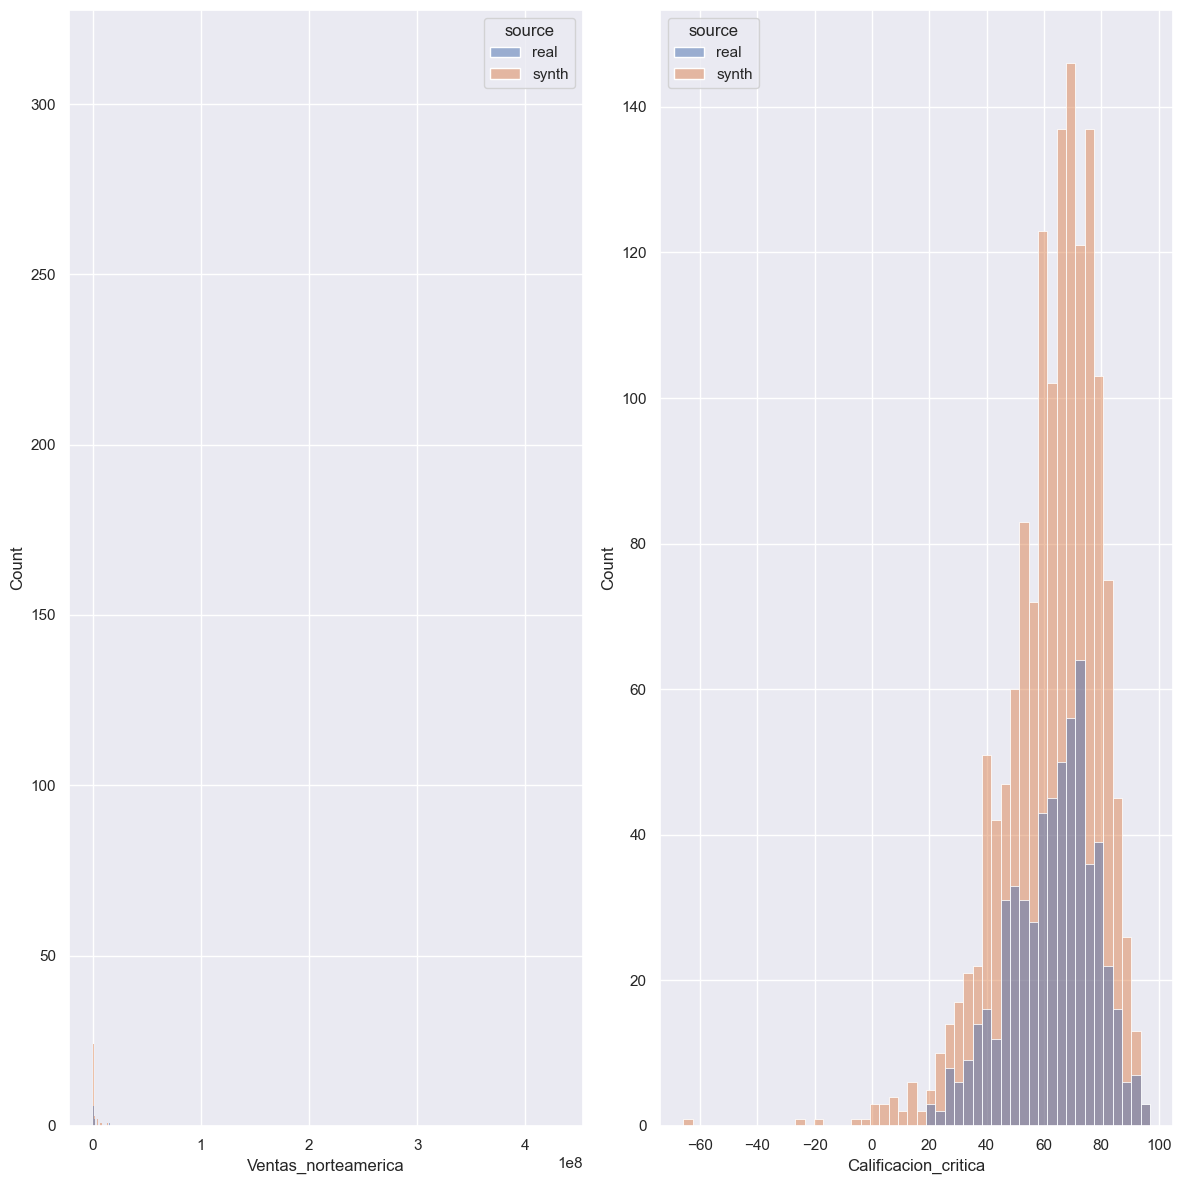

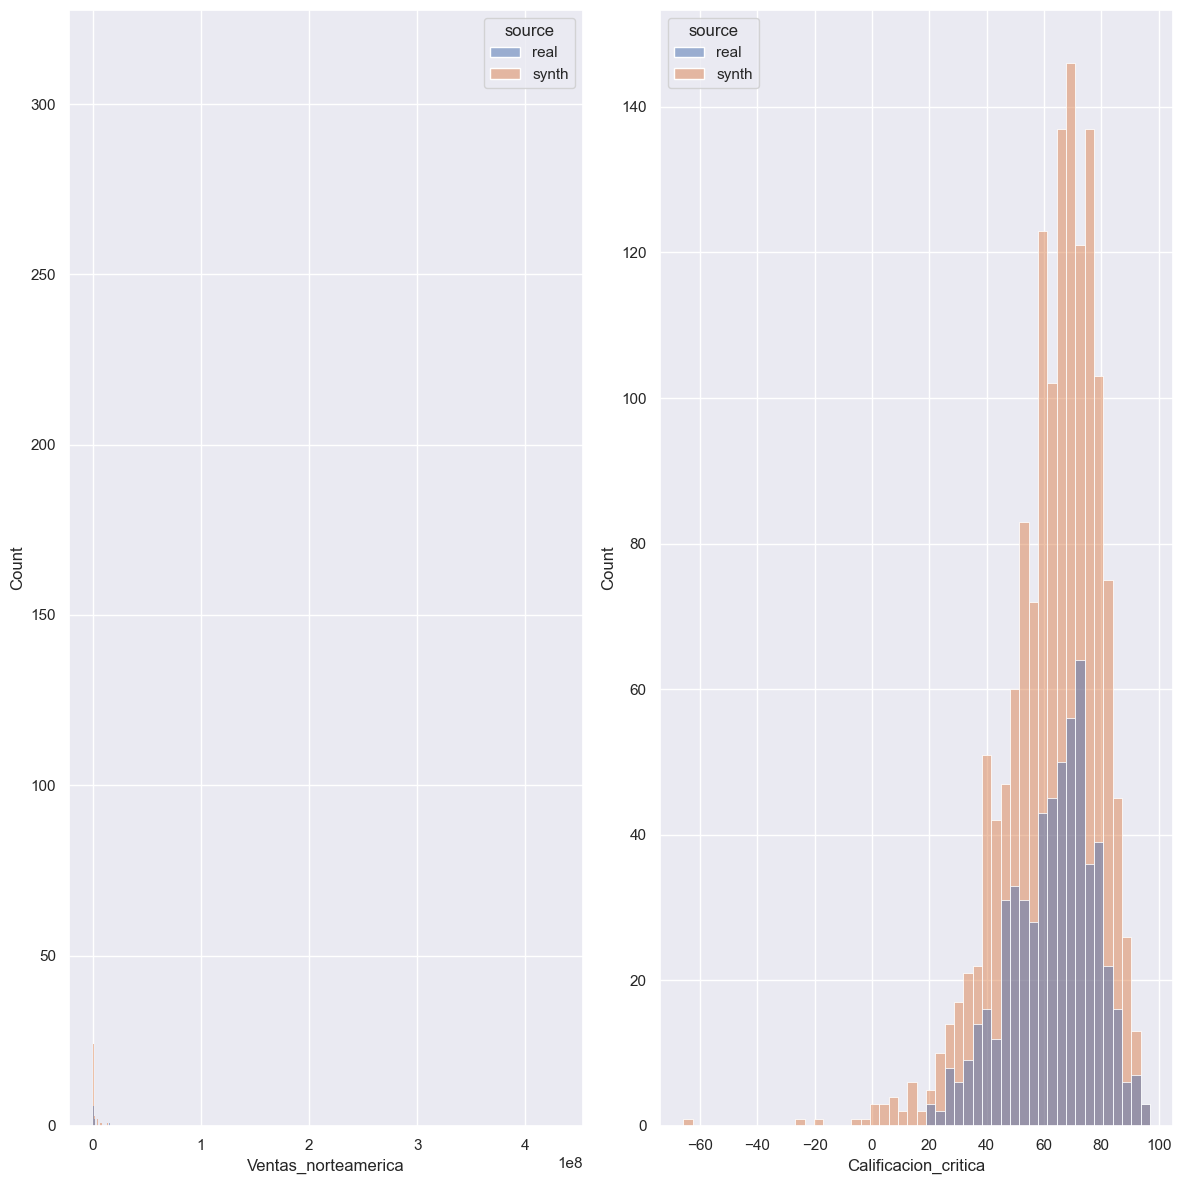

In [134]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [135]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


value
wass-Calificacion_critica                       1.408891
wass-Ventas_norteamerica                   369536.278794
kolmogorov-Calificacion_critica-statistic       0.050253
kolmogorov-Calificacion_critica-pvalue          0.232017
kolmogorov-Ventas_norteamerica-statistic        0.086046
kolmogorov-Ventas_norteamerica-pvalue           0.003795
propensity_metrics-pmse                         0.197365
propensity_metrics-pmse_standardised            1.734771
propensity_metrics-pmse_ratio                   1.007629
pearson-msd                                     0.019081

In [136]:
comparison_evaluator = sg.Evaluator(wiiureal, wiiusyn)
comparison_evaluator.describe_numeric()

count           mean           std           min  \
Calificacion_critica_real     82.0      71.158537  1.482446e+01     24.000000   
Calificacion_critica_synth  1500.0      71.454601  1.485461e+01    -35.168607   
Ventas_norteamerica_real      82.0  375365.853659  5.625234e+05  10000.000000   
Ventas_norteamerica_synth   1500.0  403805.058500  1.056868e+06  10118.579607   

                                     25%            50%            75%  \
Calificacion_critica_real      65.250000      75.000000      81.750000   
Calificacion_critica_synth     64.972748      74.487167      81.828831   
Ventas_norteamerica_real    90000.000000  200000.000000  357500.000000   
Ventas_norteamerica_synth   86919.029325  204799.204404  467949.095432   

                                     max  
Calificacion_critica_real   9.300000e+01  
Calificacion_critica_synth  9.743531e+01  
Ventas_norteamerica_real    3.150000e+06  
Ventas_norteamerica_synth   3.567602e+07

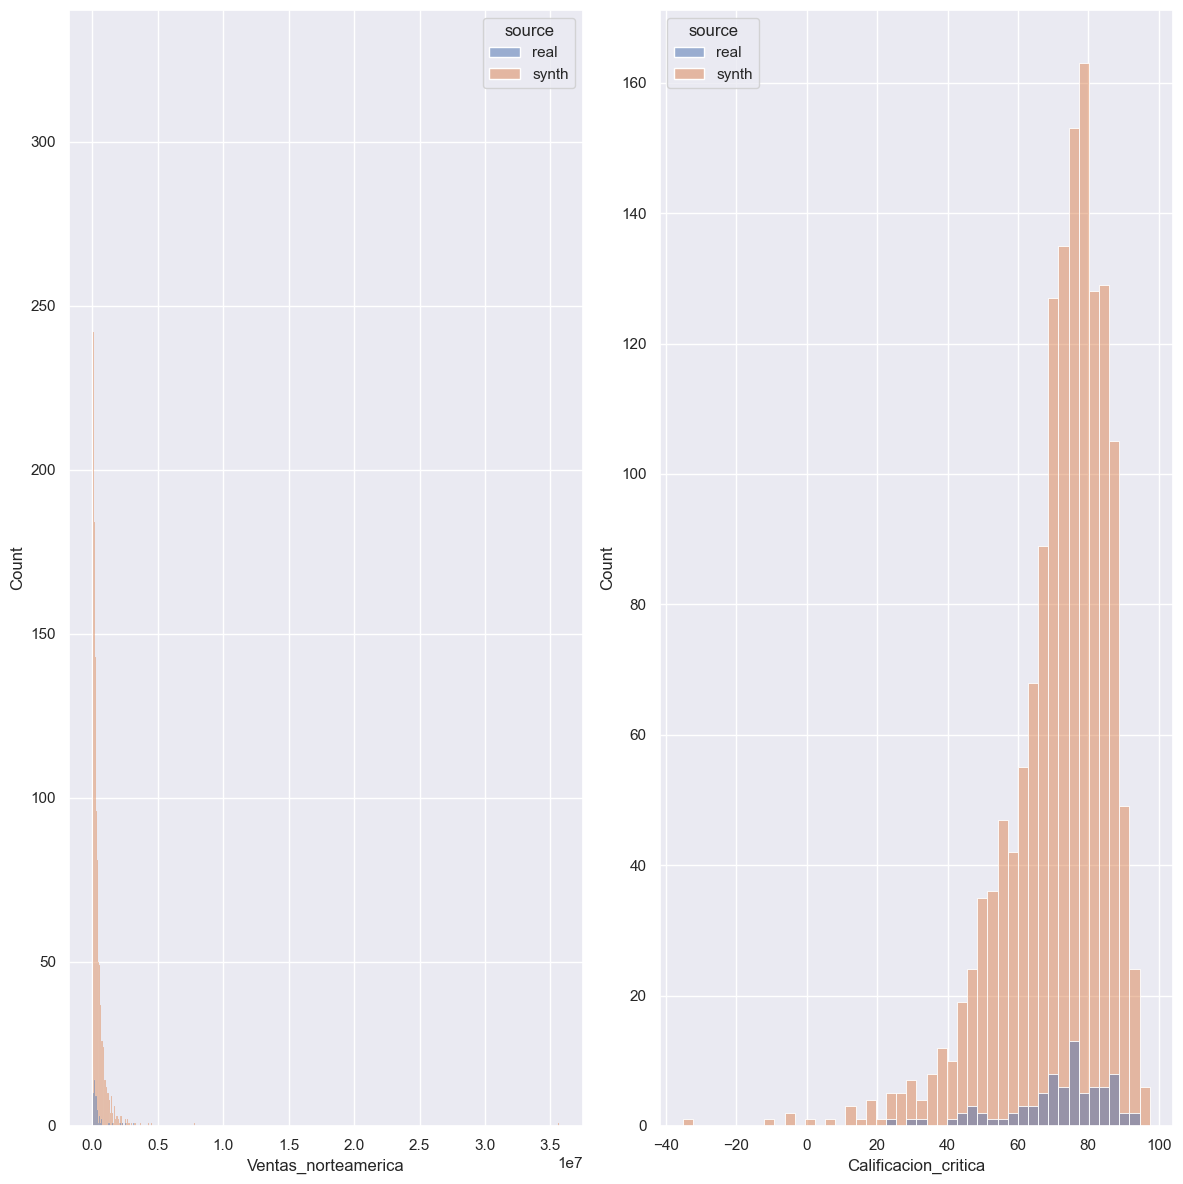

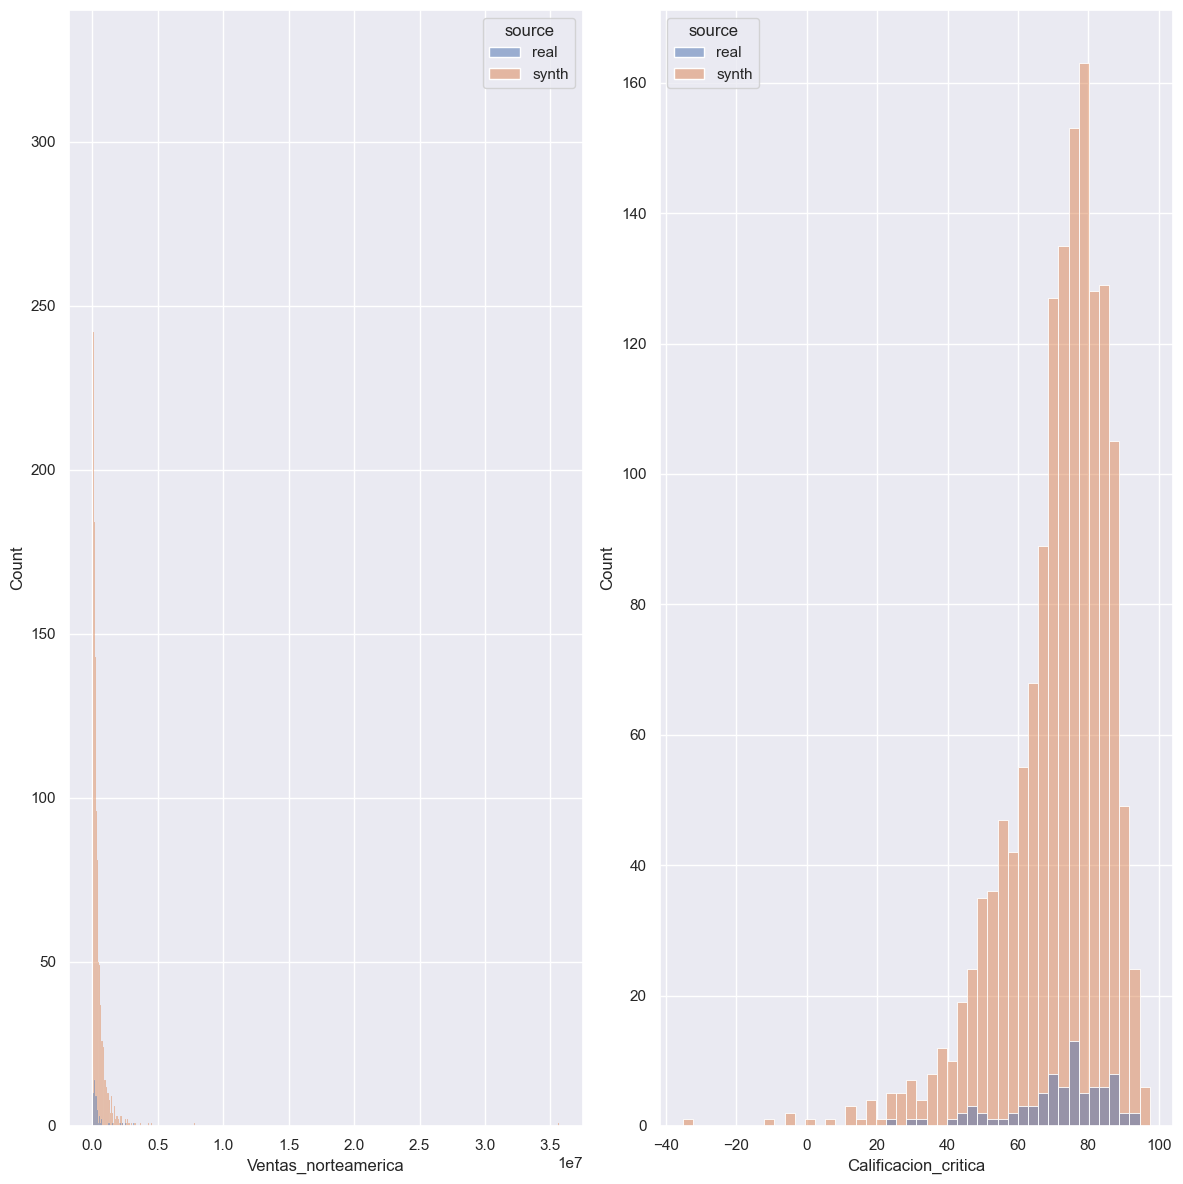

In [137]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [138]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


value
wass-Calificacion_critica                      1.058737
wass-Ventas_norteamerica                   97713.093165
kolmogorov-Calificacion_critica-statistic      0.062341
kolmogorov-Calificacion_critica-pvalue         0.903523
kolmogorov-Ventas_norteamerica-statistic       0.092683
kolmogorov-Ventas_norteamerica-pvalue          0.486412
propensity_metrics-pmse                        0.049146
propensity_metrics-pmse_standardised           0.333333
propensity_metrics-pmse_ratio                  1.000644
pearson-msd                                    0.130630

In [139]:
comparison_evaluator = sg.Evaluator(x360real, x360syn)
comparison_evaluator.describe_numeric()

count           mean           std           min  \
Calificacion_critica_real    901.0      68.615982  1.509235e+01     19.000000   
Calificacion_critica_synth  1500.0      69.081776  1.491912e+01      6.881214   
Ventas_norteamerica_real     901.0  604372.918979  1.174831e+06  10000.000000   
Ventas_norteamerica_synth   1500.0  551788.397840  1.088289e+06  10206.401759   

                                      25%            50%            75%  \
Calificacion_critica_real       59.000000      71.000000      80.000000   
Calificacion_critica_synth      60.857936      71.445570      79.609057   
Ventas_norteamerica_real    110000.000000  240000.000000  580000.000000   
Ventas_norteamerica_synth    99106.330224  250858.080945  571948.338466   

                                     max  
Calificacion_critica_real   9.800000e+01  
Calificacion_critica_synth  9.979284e+01  
Ventas_norteamerica_real    1.500000e+07  
Ventas_norteamerica_synth   1.983897e+07

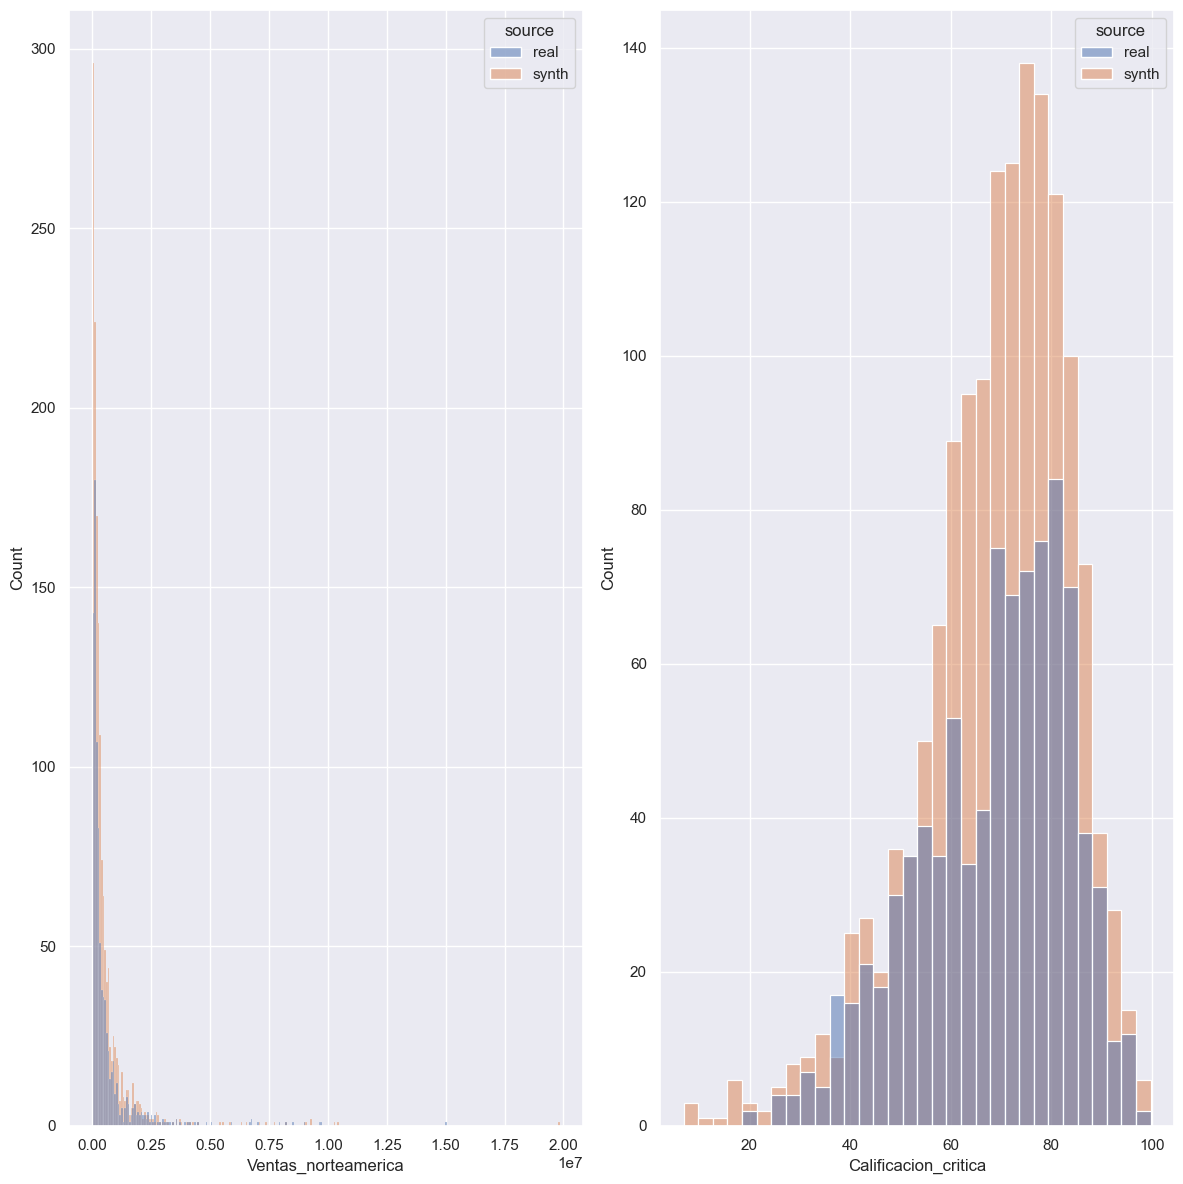

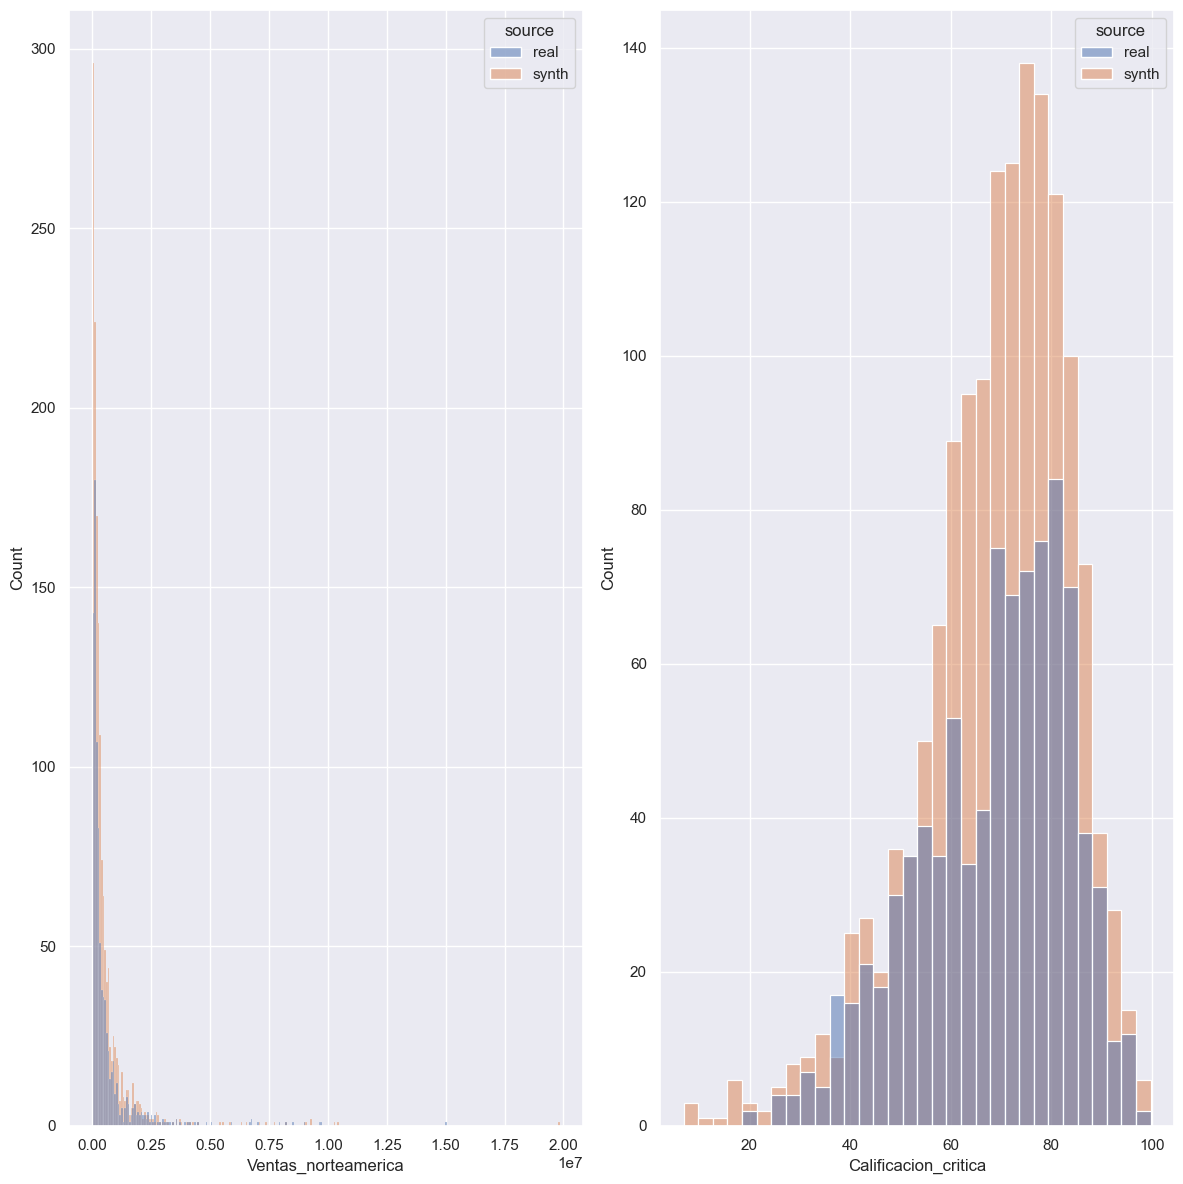

In [140]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [141]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


value
wass-Calificacion_critica                      1.197277
wass-Ventas_norteamerica                   65945.860717
kolmogorov-Calificacion_critica-statistic      0.053756
kolmogorov-Calificacion_critica-pvalue         0.073817
kolmogorov-Ventas_norteamerica-statistic       0.084070
kolmogorov-Ventas_norteamerica-pvalue          0.000648
propensity_metrics-pmse                        0.223611
propensity_metrics-pmse_standardised           0.425574
propensity_metrics-pmse_ratio                  1.001882
pearson-msd                                    0.196941

In [142]:
comparison_evaluator = sg.Evaluator(xbreal, xbsyn)
comparison_evaluator.describe_numeric()

count           mean            std  \
Calificacion_critica_real    725.0      69.859310      14.061411   
Calificacion_critica_synth  1500.0      70.232549      13.748902   
Ventas_norteamerica_real     725.0  234427.586207  414844.521645   
Ventas_norteamerica_synth   1500.0  240257.568948  226281.112155   

                                     min           25%            50%  \
Calificacion_critica_real      19.000000     62.000000      72.000000   
Calificacion_critica_synth     17.653978     62.064566      72.804847   
Ventas_norteamerica_real    10000.000000  50000.000000  110000.000000   
Ventas_norteamerica_synth   10048.950034  72256.029147  169155.317548   

                                      75%           max  
Calificacion_critica_real       80.000000  9.700000e+01  
Calificacion_critica_synth      80.576903  9.546136e+01  
Ventas_norteamerica_real    270000.000000  6.820000e+06  
Ventas_norteamerica_synth   334281.339687  1.575377e+06

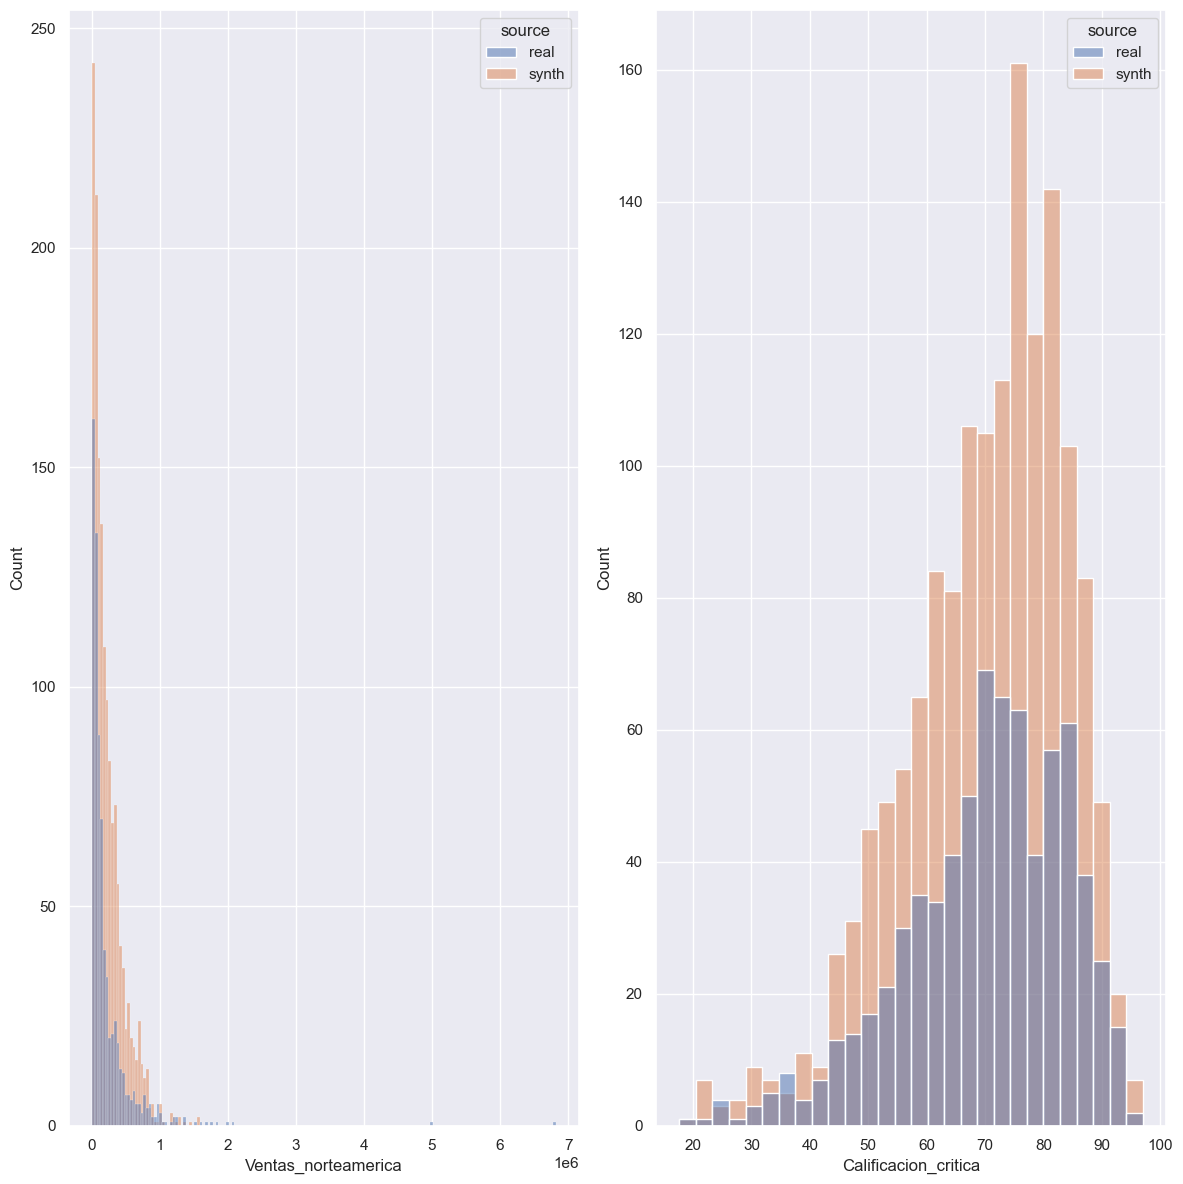

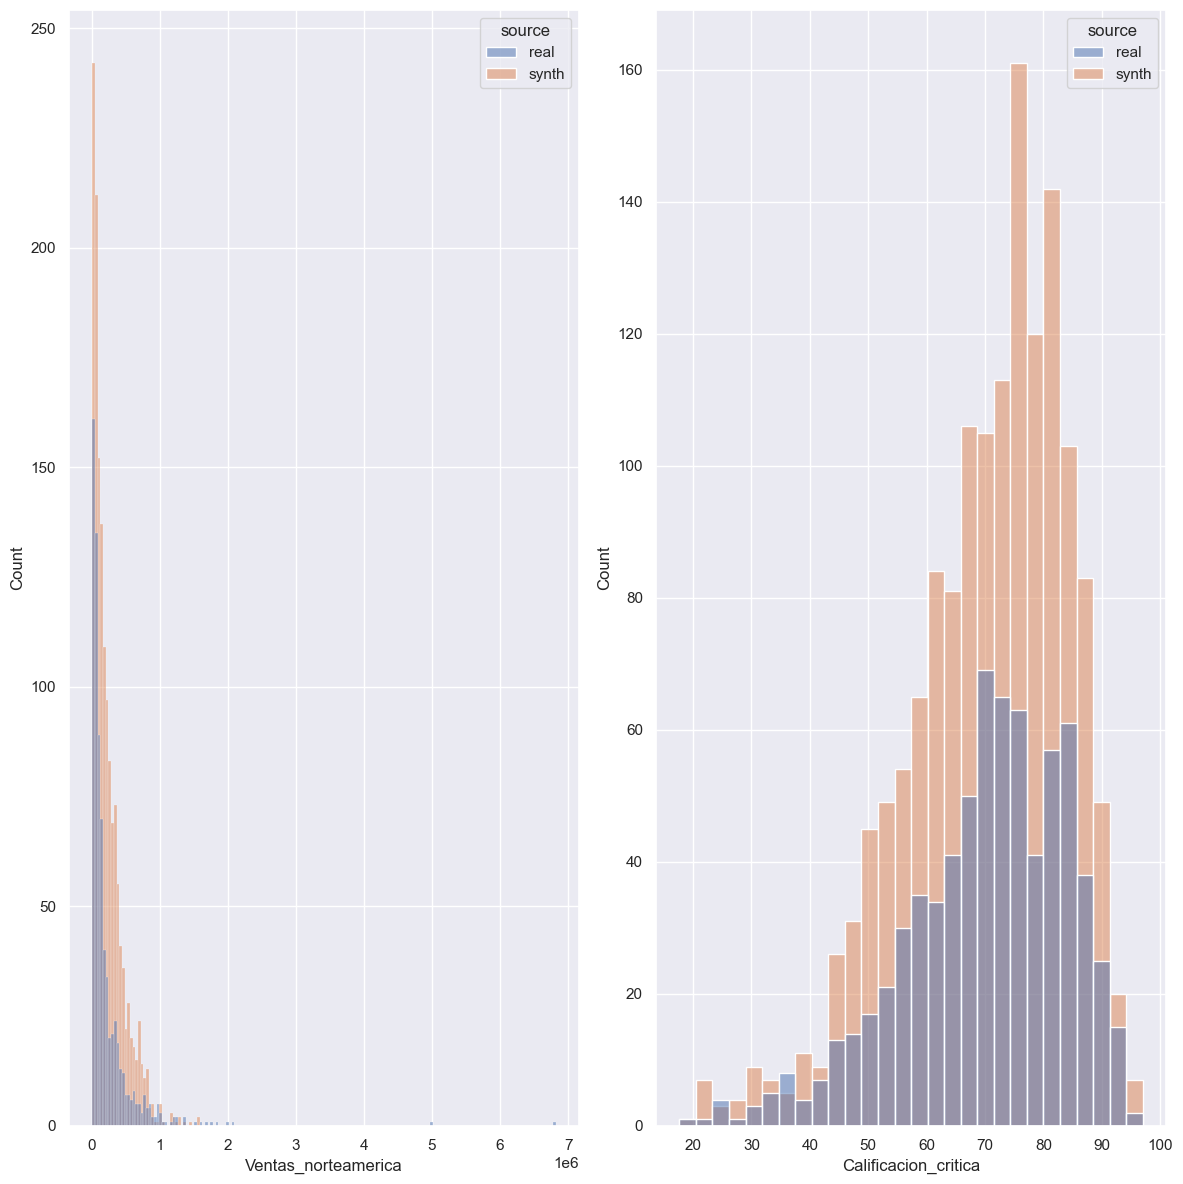

In [143]:
comparison_evaluator.plot_histograms(figsize=(12, 12))

In [144]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


value
wass-Calificacion_critica                  5.980112e-01
wass-Ventas_norteamerica                   6.607207e+04
kolmogorov-Calificacion_critica-statistic  5.041379e-02
kolmogorov-Calificacion_critica-pvalue     1.598385e-01
kolmogorov-Ventas_norteamerica-statistic   1.600000e-01
kolmogorov-Ventas_norteamerica-pvalue      2.146337e-11
propensity_metrics-pmse                    2.049651e-01
propensity_metrics-pmse_standardised      -1.966392e-01
propensity_metrics-pmse_ratio              9.987480e-01
pearson-msd                                1.588238e-01

In [145]:
comparison_evaluator = sg.Evaluator(xonereal, xonesyn)
comparison_evaluator.describe_numeric()

count           mean            std  \
Calificacion_critica_real    161.0      73.645963      13.040998   
Calificacion_critica_synth  1500.0      72.619168      13.610695   
Ventas_norteamerica_real     161.0  472732.919255  637742.098714   
Ventas_norteamerica_synth   1500.0  629411.405838  803583.279157   

                                     min           25%            50%  \
Calificacion_critica_real      20.000000     68.000000      76.000000   
Calificacion_critica_synth    -19.141011     66.700938      75.237139   
Ventas_norteamerica_real    10000.000000  70000.000000  220000.000000   
Ventas_norteamerica_synth   10086.305537  58185.976021  248572.074553   

                                      75%           max  
Calificacion_critica_real       83.000000  9.700000e+01  
Calificacion_critica_synth      81.542506  1.139504e+02  
Ventas_norteamerica_real    630000.000000  3.220000e+06  
Ventas_norteamerica_synth   918100.665467  3.210154e+06

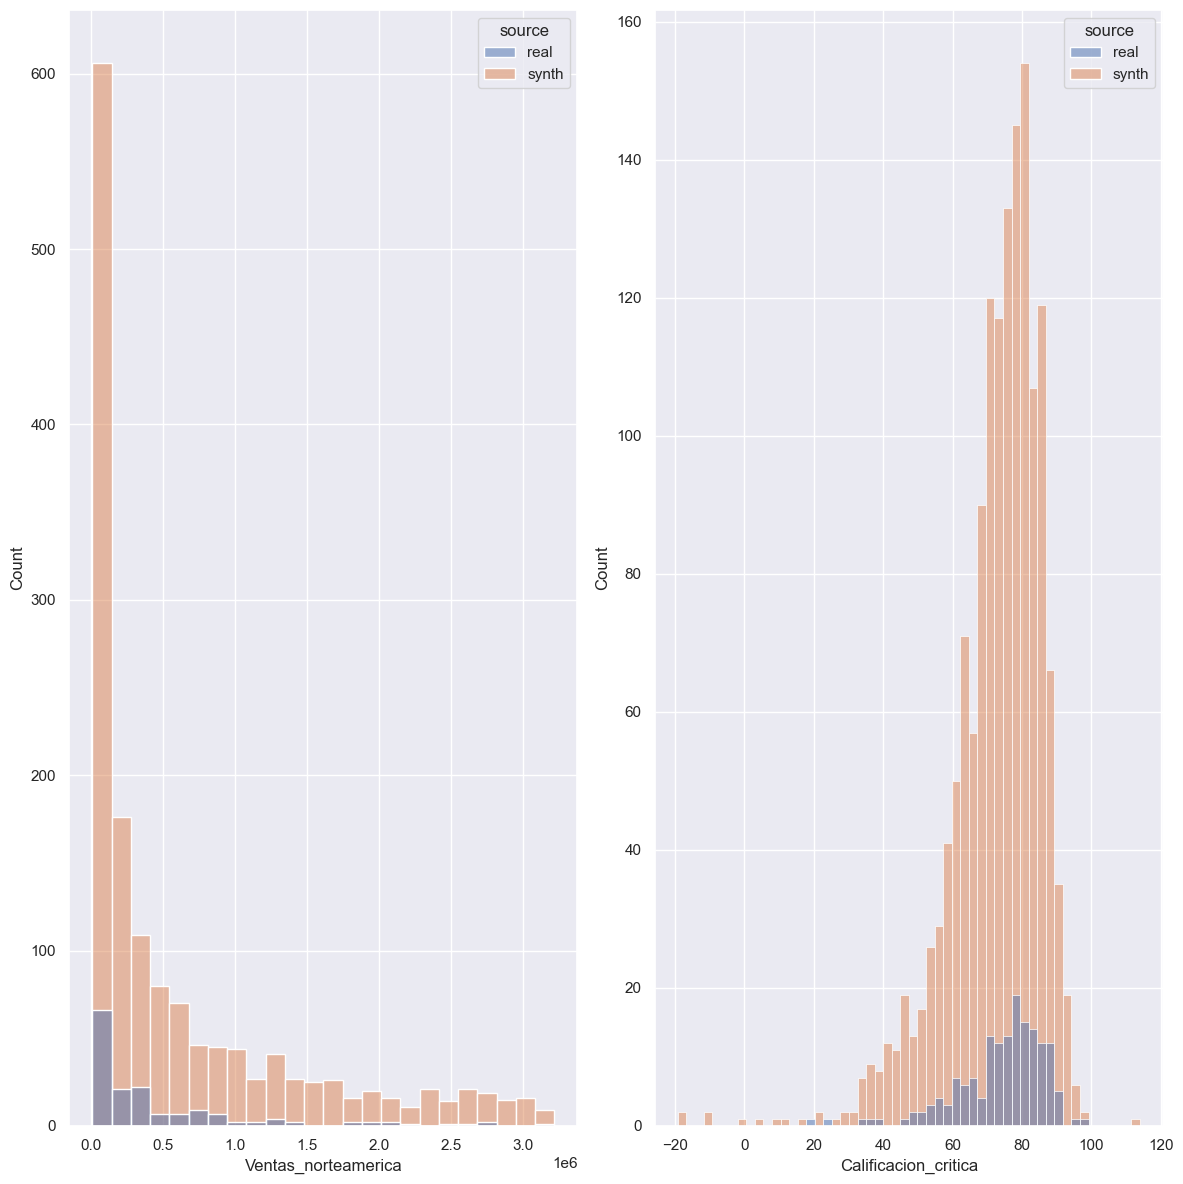

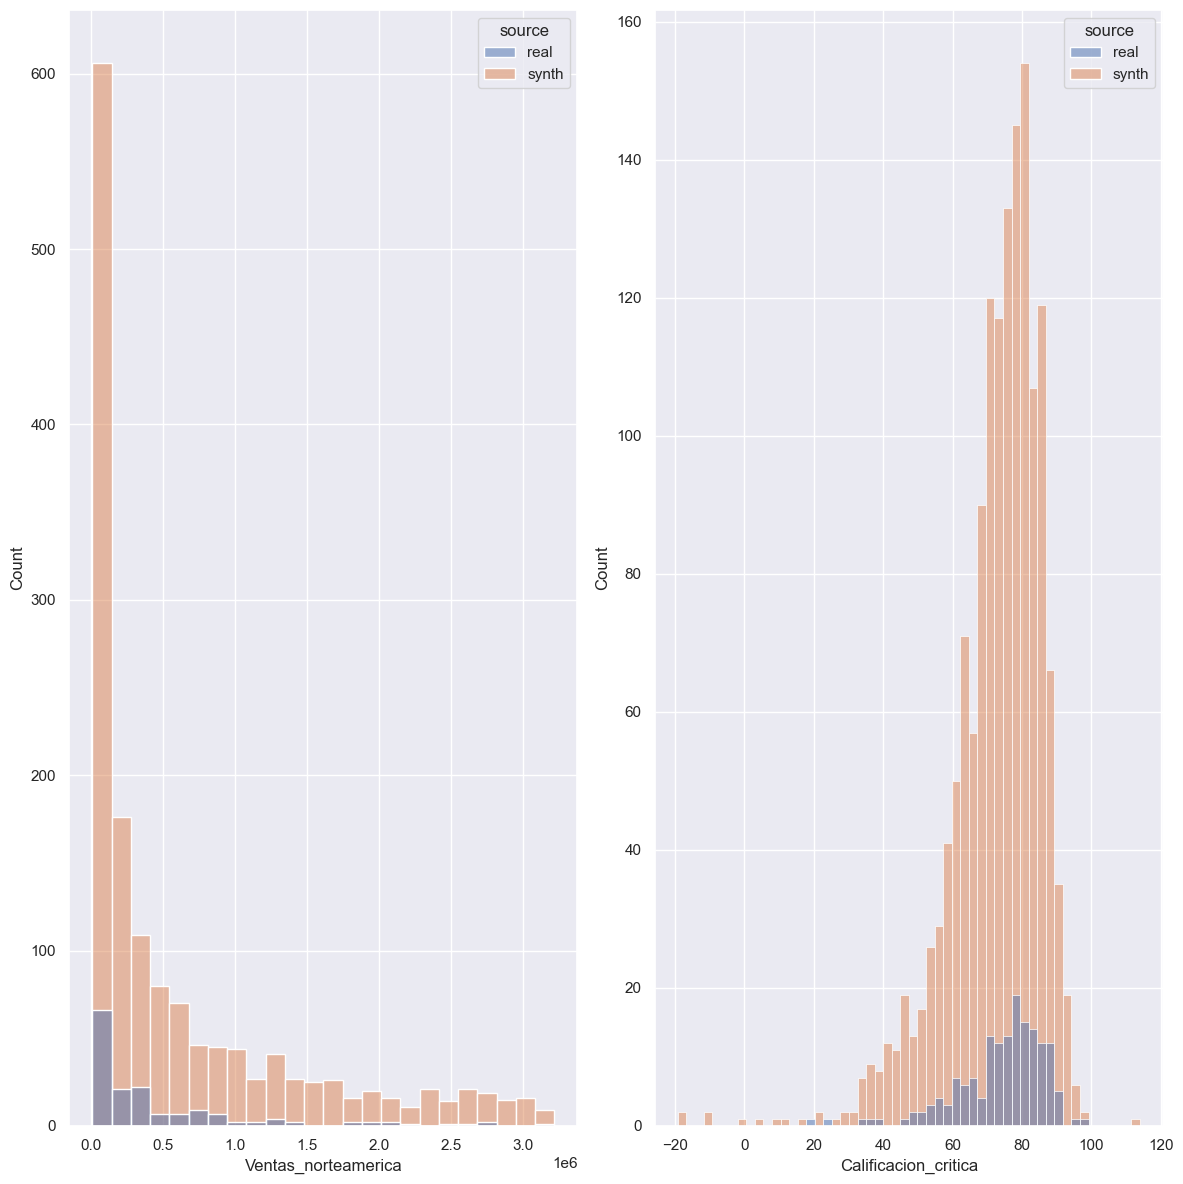

In [146]:
comparison_evaluator.plot_histograms(figsize=(12, 12))
 

In [147]:
comparison_evaluator.copy_metrics(evaluator)
comparison_evaluator.evaluate(as_df=True)

c:\Users\ursuz\anaconda3\lib\site-packages\synthgauge\metrics\propensity.py:359: FutureWarning: The permutation method is flawed and will be removed in a future release. Consider using `estimator='boot'` instead.
  warnings.warn(message, FutureWarning)


value
wass-Calificacion_critica                       1.267371
wass-Ventas_norteamerica                   160824.424708
kolmogorov-Calificacion_critica-statistic       0.077118
kolmogorov-Calificacion_critica-pvalue          0.334054
kolmogorov-Ventas_norteamerica-statistic        0.117354
kolmogorov-Ventas_norteamerica-pvalue           0.033296
propensity_metrics-pmse                         0.087233
propensity_metrics-pmse_standardised           -0.054313
propensity_metrics-pmse_ratio                   0.999827
pearson-msd                                     0.166835

In [4]:

X = ds3syn['Calificacion_critica']
y = ds3syn['Ventas_norteamerica']

xt = ds3real['Calificacion_critica']
yt = ds3real['Ventas_norteamerica']

from sklearn.preprocessing import PolynomialFeatures

x, y = np.array(X), np.array(y)
xt, yt = np.array(xt), np.array(yt)
x2 = x.reshape(-1, 1)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x2)
xt2 = xt.reshape(-1, 1)
xt_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xt2)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_, y, test_size=0.3, random_state=1)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(xt, yt, test_size=0.3, random_state=1)
X_train2_real, X_test2_real, y_train2_real, y_test2_real = train_test_split(xt_, yt, test_size=0.3, random_state=1)

In [6]:
X_train = X_train.reshape(-1, 1)
X_test_real = X_test_real.reshape(-1, 1)

In [7]:
ln = LinearRegression()
ln.fit(X_train, y_train)
y_predln = ln.predict(X_test_real)

ln2 = ln.fit(X_train2, y_train2)
y_predln2 = ln2.predict(X_test2_real)

svmm = svm.SVR()
svmm.fit(X_train, y_train)
y_predsvm = svmm.predict(X_test_real)

dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train)
y_preddtr = dtr.predict(X_test_real)
 
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test_real)

clf = XGBRegressor()
clf.fit(X_train, y_train)
y_predclf = clf.predict(X_test_real)

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_predknr = knr.predict(X_test_real)

nnmlp = MLPRegressor()
nnmlp.fit(X_train, y_train)
y_prednnmlp = nnmlp.predict(X_test_real)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_predgbr = gbr.predict(X_test_real)

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_predlgbm = lgbm.predict(X_test_real)

c:\Users\ursuz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ursuz\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ursuz\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 245, in _count_physical_cores
    raise ValueError(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 1050, number of used features: 1
[LightGBM] [Info] Start training from score 305967.069628


In [8]:
print('LINEAL')
scoreln = r2_score(y_test_real, y_predln)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predln)))
print('R2 Score:', scoreln)

print('POLINOMIAL')
scoreln2 = r2_score(y_test2_real, y_predln2)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test2_real, y_predln2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2_real, y_predln2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2_real, y_predln2)))
print('R2 Score:', scoreln2)

print('SUPPORT MACHINE VECTOR')
scoresvm = r2_score(y_test_real, y_predsvm)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predsvm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predsvm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predsvm)))
print('R2 Score:', scoresvm)

print('DECISION TREE')
scoredt = r2_score(y_test_real, y_preddtr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_preddtr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_preddtr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_preddtr)))
print('R2 Score:', scoredt)

print('RANDOM FOREST')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('EXTREME GRADIENT BOOSTING (XGBOOST)')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('K-NEAREST NEIGHBORS')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('MULTI-LAYER PERCEPTRON REGRESSOR')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('GRADIENT BOOSTING')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('LIGHTGBM')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

LINEAL
Mean Absolute Error : 184435.73322695785
Mean Squared Error: 41150716126.03855
Root Mean Squared Error: 202856.392864604
R2 Score: -0.6371404270707535
POLINOMIAL
Mean Absolute Error : 186233.60464263108
Mean Squared Error: 41904606585.04737
Root Mean Squared Error: 204706.14691563946
R2 Score: -0.6671332112606085
SUPPORT MACHINE VECTOR
Mean Absolute Error : 114533.66251061221
Mean Squared Error: 27285316882.16075
Root Mean Squared Error: 165182.6773065528
R2 Score: -0.08551927009980109
DECISION TREE
Mean Absolute Error : 181265.58828580452
Mean Squared Error: 61220721341.836784
Root Mean Squared Error: 247428.21452258993
R2 Score: -1.435605678797279
RANDOM FOREST
Mean Absolute Error : 169543.92045719316
Mean Squared Error: 51561531405.596085
Root Mean Squared Error: 227071.64377261218
R2 Score: -1.0513243873383318
EXTREME GRADIENT BOOSTING (XGBOOST)
Mean Absolute Error : 169543.92045719316
Mean Squared Error: 51561531405.596085
Root Mean Squared Error: 227071.64377261218
R2 Scor

In [ ]:
X = dssyn['Calificacion_critica']
y = dssyn['Ventas_norteamerica']

xt = dsreal['Calificacion_critica']
yt = dsreal['Ventas_norteamerica']

x, y = np.array(X), np.array(y)
xt, yt = np.array(xt), np.array(yt)
x2 = x.reshape(-1, 1)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x2)
xt2 = xt.reshape(-1, 1)
xt_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xt2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_, y, test_size=0.3, random_state=1)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(xt, yt, test_size=0.3, random_state=1)
X_train2_real, X_test2_real, y_train2_real, y_test2_real = train_test_split(xt_, yt, test_size=0.3, random_state=1)

X_train = X_train.reshape(-1, 1)
X_test_real = X_test_real.reshape(-1, 1)

ln = LinearRegression()
ln.fit(X_train, y_train)
y_predln = ln.predict(X_test_real)

ln2 = ln.fit(X_train2, y_train2)
y_predln2 = ln2.predict(X_test2_real)

svmm = svm.SVR()
svmm.fit(X_train, y_train)
y_predsvm = svmm.predict(X_test_real)

dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train)
y_preddtr = dtr.predict(X_test_real)
 
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test_real)

clf = XGBRegressor()
clf.fit(X_train, y_train)
y_predclf = clf.predict(X_test_real)

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_predknr = knr.predict(X_test_real)

nnmlp = MLPRegressor()
nnmlp.fit(X_train, y_train)
y_prednnmlp = nnmlp.predict(X_test_real)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_predgbr = gbr.predict(X_test_real)

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_predlgbm = lgbm.predict(X_test_real)


print('LINEAL')
scoreln = r2_score(y_test_real, y_predln)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predln)))
print('R2 Score:', scoreln)

print('POLINOMIAL')
scoreln2 = r2_score(y_test2_real, y_predln2)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test2_real, y_predln2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2_real, y_predln2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2_real, y_predln2)))
print('R2 Score:', scoreln2)

print('SUPPORT MACHINE VECTOR')
scoresvm = r2_score(y_test_real, y_predsvm)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predsvm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predsvm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predsvm)))
print('R2 Score:', scoresvm)

print('DECISION TREE')
scoredt = r2_score(y_test_real, y_preddtr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_preddtr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_preddtr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_preddtr)))
print('R2 Score:', scoredt)

print('RANDOM FOREST')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('EXTREME GRADIENT BOOSTING (XGBOOST)')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('K-NEAREST NEIGHBORS')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('MULTI-LAYER PERCEPTRON REGRESSOR')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('GRADIENT BOOSTING')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('LIGHTGBM')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

In [ ]:
X = gbasyn['Calificacion_critica']
y = gbasyn['Ventas_norteamerica']

xt = gbareal['Calificacion_critica']
yt = gbareal['Ventas_norteamerica']

x, y = np.array(X), np.array(y)
xt, yt = np.array(xt), np.array(yt)
x2 = x.reshape(-1, 1)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x2)
xt2 = xt.reshape(-1, 1)
xt_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xt2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_, y, test_size=0.3, random_state=1)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(xt, yt, test_size=0.3, random_state=1)
X_train2_real, X_test2_real, y_train2_real, y_test2_real = train_test_split(xt_, yt, test_size=0.3, random_state=1)

X_train = X_train.reshape(-1, 1)
X_test_real = X_test_real.reshape(-1, 1)

ln = LinearRegression()
ln.fit(X_train, y_train)
y_predln = ln.predict(X_test_real)

ln2 = ln.fit(X_train2, y_train2)
y_predln2 = ln2.predict(X_test2_real)

svmm = svm.SVR()
svmm.fit(X_train, y_train)
y_predsvm = svmm.predict(X_test_real)

dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train)
y_preddtr = dtr.predict(X_test_real)
 
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test_real)

clf = XGBRegressor()
clf.fit(X_train, y_train)
y_predclf = clf.predict(X_test_real)

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_predknr = knr.predict(X_test_real)

nnmlp = MLPRegressor()
nnmlp.fit(X_train, y_train)
y_prednnmlp = nnmlp.predict(X_test_real)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_predgbr = gbr.predict(X_test_real)

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_predlgbm = lgbm.predict(X_test_real)


print('LINEAL')
scoreln = r2_score(y_test_real, y_predln)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predln)))
print('R2 Score:', scoreln)

print('POLINOMIAL')
scoreln2 = r2_score(y_test2_real, y_predln2)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test2_real, y_predln2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2_real, y_predln2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2_real, y_predln2)))
print('R2 Score:', scoreln2)

print('SUPPORT MACHINE VECTOR')
scoresvm = r2_score(y_test_real, y_predsvm)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predsvm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predsvm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predsvm)))
print('R2 Score:', scoresvm)

print('DECISION TREE')
scoredt = r2_score(y_test_real, y_preddtr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_preddtr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_preddtr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_preddtr)))
print('R2 Score:', scoredt)

print('RANDOM FOREST')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('EXTREME GRADIENT BOOSTING (XGBOOST)')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('K-NEAREST NEIGHBORS')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('MULTI-LAYER PERCEPTRON REGRESSOR')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('GRADIENT BOOSTING')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('LIGHTGBM')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

In [ ]:
X = gcsyn['Calificacion_critica']
y = gcsyn['Ventas_norteamerica']

xt = gcreal['Calificacion_critica']
yt = gcreal['Ventas_norteamerica']

x, y = np.array(X), np.array(y)
xt, yt = np.array(xt), np.array(yt)
x2 = x.reshape(-1, 1)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x2)
xt2 = xt.reshape(-1, 1)
xt_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xt2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_, y, test_size=0.3, random_state=1)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(xt, yt, test_size=0.3, random_state=1)
X_train2_real, X_test2_real, y_train2_real, y_test2_real = train_test_split(xt_, yt, test_size=0.3, random_state=1)

X_train = X_train.reshape(-1, 1)
X_test_real = X_test_real.reshape(-1, 1)

ln = LinearRegression()
ln.fit(X_train, y_train)
y_predln = ln.predict(X_test_real)

ln2 = ln.fit(X_train2, y_train2)
y_predln2 = ln2.predict(X_test2_real)

svmm = svm.SVR()
svmm.fit(X_train, y_train)
y_predsvm = svmm.predict(X_test_real)

dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train)
y_preddtr = dtr.predict(X_test_real)
 
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test_real)

clf = XGBRegressor()
clf.fit(X_train, y_train)
y_predclf = clf.predict(X_test_real)

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_predknr = knr.predict(X_test_real)

nnmlp = MLPRegressor()
nnmlp.fit(X_train, y_train)
y_prednnmlp = nnmlp.predict(X_test_real)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_predgbr = gbr.predict(X_test_real)

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_predlgbm = lgbm.predict(X_test_real)


print('LINEAL')
scoreln = r2_score(y_test_real, y_predln)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predln)))
print('R2 Score:', scoreln)

print('POLINOMIAL')
scoreln2 = r2_score(y_test2_real, y_predln2)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test2_real, y_predln2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2_real, y_predln2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2_real, y_predln2)))
print('R2 Score:', scoreln2)

print('SUPPORT MACHINE VECTOR')
scoresvm = r2_score(y_test_real, y_predsvm)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predsvm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predsvm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predsvm)))
print('R2 Score:', scoresvm)

print('DECISION TREE')
scoredt = r2_score(y_test_real, y_preddtr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_preddtr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_preddtr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_preddtr)))
print('R2 Score:', scoredt)

print('RANDOM FOREST')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('EXTREME GRADIENT BOOSTING (XGBOOST)')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('K-NEAREST NEIGHBORS')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('MULTI-LAYER PERCEPTRON REGRESSOR')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('GRADIENT BOOSTING')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('LIGHTGBM')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

In [ ]:
X = n64syn['Calificacion_critica']
y = n64syn['Ventas_norteamerica']

xt = n64real['Calificacion_critica']
yt = n64real['Ventas_norteamerica']

x, y = np.array(X), np.array(y)
xt, yt = np.array(xt), np.array(yt)
x2 = x.reshape(-1, 1)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x2)
xt2 = xt.reshape(-1, 1)
xt_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xt2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_, y, test_size=0.3, random_state=1)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(xt, yt, test_size=0.3, random_state=1)
X_train2_real, X_test2_real, y_train2_real, y_test2_real = train_test_split(xt_, yt, test_size=0.3, random_state=1)

X_train = X_train.reshape(-1, 1)
X_test_real = X_test_real.reshape(-1, 1)

ln = LinearRegression()
ln.fit(X_train, y_train)
y_predln = ln.predict(X_test_real)

ln2 = ln.fit(X_train2, y_train2)
y_predln2 = ln2.predict(X_test2_real)

svmm = svm.SVR()
svmm.fit(X_train, y_train)
y_predsvm = svmm.predict(X_test_real)

dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train)
y_preddtr = dtr.predict(X_test_real)
 
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test_real)

clf = XGBRegressor()
clf.fit(X_train, y_train)
y_predclf = clf.predict(X_test_real)

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_predknr = knr.predict(X_test_real)

nnmlp = MLPRegressor()
nnmlp.fit(X_train, y_train)
y_prednnmlp = nnmlp.predict(X_test_real)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_predgbr = gbr.predict(X_test_real)

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_predlgbm = lgbm.predict(X_test_real)


print('LINEAL')
scoreln = r2_score(y_test_real, y_predln)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predln)))
print('R2 Score:', scoreln)

print('POLINOMIAL')
scoreln2 = r2_score(y_test2_real, y_predln2)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test2_real, y_predln2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2_real, y_predln2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2_real, y_predln2)))
print('R2 Score:', scoreln2)

print('SUPPORT MACHINE VECTOR')
scoresvm = r2_score(y_test_real, y_predsvm)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predsvm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predsvm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predsvm)))
print('R2 Score:', scoresvm)

print('DECISION TREE')
scoredt = r2_score(y_test_real, y_preddtr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_preddtr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_preddtr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_preddtr)))
print('R2 Score:', scoredt)

print('RANDOM FOREST')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('EXTREME GRADIENT BOOSTING (XGBOOST)')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('K-NEAREST NEIGHBORS')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('MULTI-LAYER PERCEPTRON REGRESSOR')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('GRADIENT BOOSTING')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('LIGHTGBM')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

In [ ]:
X = pcsyn['Calificacion_critica']
y = pcsyn['Ventas_norteamerica']

xt = pcreal['Calificacion_critica']
yt = pcreal['Ventas_norteamerica']

x, y = np.array(X), np.array(y)
xt, yt = np.array(xt), np.array(yt)
x2 = x.reshape(-1, 1)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x2)
xt2 = xt.reshape(-1, 1)
xt_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xt2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_, y, test_size=0.3, random_state=1)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(xt, yt, test_size=0.3, random_state=1)
X_train2_real, X_test2_real, y_train2_real, y_test2_real = train_test_split(xt_, yt, test_size=0.3, random_state=1)

X_train = X_train.reshape(-1, 1)
X_test_real = X_test_real.reshape(-1, 1)

ln = LinearRegression()
ln.fit(X_train, y_train)
y_predln = ln.predict(X_test_real)

ln2 = ln.fit(X_train2, y_train2)
y_predln2 = ln2.predict(X_test2_real)

svmm = svm.SVR()
svmm.fit(X_train, y_train)
y_predsvm = svmm.predict(X_test_real)

dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train)
y_preddtr = dtr.predict(X_test_real)
 
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test_real)

clf = XGBRegressor()
clf.fit(X_train, y_train)
y_predclf = clf.predict(X_test_real)

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_predknr = knr.predict(X_test_real)

nnmlp = MLPRegressor()
nnmlp.fit(X_train, y_train)
y_prednnmlp = nnmlp.predict(X_test_real)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_predgbr = gbr.predict(X_test_real)

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_predlgbm = lgbm.predict(X_test_real)


print('LINEAL')
scoreln = r2_score(y_test_real, y_predln)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predln)))
print('R2 Score:', scoreln)

print('POLINOMIAL')
scoreln2 = r2_score(y_test2_real, y_predln2)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test2_real, y_predln2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2_real, y_predln2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2_real, y_predln2)))
print('R2 Score:', scoreln2)

print('SUPPORT MACHINE VECTOR')
scoresvm = r2_score(y_test_real, y_predsvm)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predsvm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predsvm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predsvm)))
print('R2 Score:', scoresvm)

print('DECISION TREE')
scoredt = r2_score(y_test_real, y_preddtr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_preddtr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_preddtr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_preddtr)))
print('R2 Score:', scoredt)

print('RANDOM FOREST')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('EXTREME GRADIENT BOOSTING (XGBOOST)')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('K-NEAREST NEIGHBORS')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('MULTI-LAYER PERCEPTRON REGRESSOR')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('GRADIENT BOOSTING')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('LIGHTGBM')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

In [ ]:
X = ps2syn['Calificacion_critica']
y = ps2syn['Ventas_norteamerica']

xt = ps2real['Calificacion_critica']
yt = ps2real['Ventas_norteamerica']

x, y = np.array(X), np.array(y)
xt, yt = np.array(xt), np.array(yt)
x2 = x.reshape(-1, 1)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x2)
xt2 = xt.reshape(-1, 1)
xt_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xt2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_, y, test_size=0.3, random_state=1)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(xt, yt, test_size=0.3, random_state=1)
X_train2_real, X_test2_real, y_train2_real, y_test2_real = train_test_split(xt_, yt, test_size=0.3, random_state=1)

X_train = X_train.reshape(-1, 1)
X_test_real = X_test_real.reshape(-1, 1)

ln = LinearRegression()
ln.fit(X_train, y_train)
y_predln = ln.predict(X_test_real)

ln2 = ln.fit(X_train2, y_train2)
y_predln2 = ln2.predict(X_test2_real)

svmm = svm.SVR()
svmm.fit(X_train, y_train)
y_predsvm = svmm.predict(X_test_real)

dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train)
y_preddtr = dtr.predict(X_test_real)
 
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test_real)

clf = XGBRegressor()
clf.fit(X_train, y_train)
y_predclf = clf.predict(X_test_real)

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_predknr = knr.predict(X_test_real)

nnmlp = MLPRegressor()
nnmlp.fit(X_train, y_train)
y_prednnmlp = nnmlp.predict(X_test_real)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_predgbr = gbr.predict(X_test_real)

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_predlgbm = lgbm.predict(X_test_real)


print('LINEAL')
scoreln = r2_score(y_test_real, y_predln)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predln)))
print('R2 Score:', scoreln)

print('POLINOMIAL')
scoreln2 = r2_score(y_test2_real, y_predln2)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test2_real, y_predln2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2_real, y_predln2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2_real, y_predln2)))
print('R2 Score:', scoreln2)

print('SUPPORT MACHINE VECTOR')
scoresvm = r2_score(y_test_real, y_predsvm)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predsvm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predsvm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predsvm)))
print('R2 Score:', scoresvm)

print('DECISION TREE')
scoredt = r2_score(y_test_real, y_preddtr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_preddtr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_preddtr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_preddtr)))
print('R2 Score:', scoredt)

print('RANDOM FOREST')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('EXTREME GRADIENT BOOSTING (XGBOOST)')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('K-NEAREST NEIGHBORS')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('MULTI-LAYER PERCEPTRON REGRESSOR')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('GRADIENT BOOSTING')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('LIGHTGBM')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

In [ ]:
X = ps3syn['Calificacion_critica']
y = ps3syn['Ventas_norteamerica']

xt = ps3real['Calificacion_critica']
yt = ps3real['Ventas_norteamerica']

x, y = np.array(X), np.array(y)
xt, yt = np.array(xt), np.array(yt)
x2 = x.reshape(-1, 1)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x2)
xt2 = xt.reshape(-1, 1)
xt_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xt2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_, y, test_size=0.3, random_state=1)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(xt, yt, test_size=0.3, random_state=1)
X_train2_real, X_test2_real, y_train2_real, y_test2_real = train_test_split(xt_, yt, test_size=0.3, random_state=1)

X_train = X_train.reshape(-1, 1)
X_test_real = X_test_real.reshape(-1, 1)

ln = LinearRegression()
ln.fit(X_train, y_train)
y_predln = ln.predict(X_test_real)

ln2 = ln.fit(X_train2, y_train2)
y_predln2 = ln2.predict(X_test2_real)

svmm = svm.SVR()
svmm.fit(X_train, y_train)
y_predsvm = svmm.predict(X_test_real)

dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train)
y_preddtr = dtr.predict(X_test_real)
 
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test_real)

clf = XGBRegressor()
clf.fit(X_train, y_train)
y_predclf = clf.predict(X_test_real)

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_predknr = knr.predict(X_test_real)

nnmlp = MLPRegressor()
nnmlp.fit(X_train, y_train)
y_prednnmlp = nnmlp.predict(X_test_real)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_predgbr = gbr.predict(X_test_real)

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_predlgbm = lgbm.predict(X_test_real)


print('LINEAL')
scoreln = r2_score(y_test_real, y_predln)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predln)))
print('R2 Score:', scoreln)

print('POLINOMIAL')
scoreln2 = r2_score(y_test2_real, y_predln2)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test2_real, y_predln2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2_real, y_predln2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2_real, y_predln2)))
print('R2 Score:', scoreln2)

print('SUPPORT MACHINE VECTOR')
scoresvm = r2_score(y_test_real, y_predsvm)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predsvm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predsvm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predsvm)))
print('R2 Score:', scoresvm)

print('DECISION TREE')
scoredt = r2_score(y_test_real, y_preddtr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_preddtr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_preddtr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_preddtr)))
print('R2 Score:', scoredt)

print('RANDOM FOREST')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('EXTREME GRADIENT BOOSTING (XGBOOST)')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('K-NEAREST NEIGHBORS')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('MULTI-LAYER PERCEPTRON REGRESSOR')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('GRADIENT BOOSTING')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('LIGHTGBM')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

In [ ]:
X = ps4syn['Calificacion_critica']
y = ps4syn['Ventas_norteamerica']

xt = ps4real['Calificacion_critica']
yt = ps4real['Ventas_norteamerica']

x, y = np.array(X), np.array(y)
xt, yt = np.array(xt), np.array(yt)
x2 = x.reshape(-1, 1)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x2)
xt2 = xt.reshape(-1, 1)
xt_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xt2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_, y, test_size=0.3, random_state=1)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(xt, yt, test_size=0.3, random_state=1)
X_train2_real, X_test2_real, y_train2_real, y_test2_real = train_test_split(xt_, yt, test_size=0.3, random_state=1)

X_train = X_train.reshape(-1, 1)
X_test_real = X_test_real.reshape(-1, 1)

ln = LinearRegression()
ln.fit(X_train, y_train)
y_predln = ln.predict(X_test_real)

ln2 = ln.fit(X_train2, y_train2)
y_predln2 = ln2.predict(X_test2_real)

svmm = svm.SVR()
svmm.fit(X_train, y_train)
y_predsvm = svmm.predict(X_test_real)

dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train)
y_preddtr = dtr.predict(X_test_real)
 
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test_real)

clf = XGBRegressor()
clf.fit(X_train, y_train)
y_predclf = clf.predict(X_test_real)

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_predknr = knr.predict(X_test_real)

nnmlp = MLPRegressor()
nnmlp.fit(X_train, y_train)
y_prednnmlp = nnmlp.predict(X_test_real)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_predgbr = gbr.predict(X_test_real)

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_predlgbm = lgbm.predict(X_test_real)


print('LINEAL')
scoreln = r2_score(y_test_real, y_predln)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predln)))
print('R2 Score:', scoreln)

print('POLINOMIAL')
scoreln2 = r2_score(y_test2_real, y_predln2)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test2_real, y_predln2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2_real, y_predln2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2_real, y_predln2)))
print('R2 Score:', scoreln2)

print('SUPPORT MACHINE VECTOR')
scoresvm = r2_score(y_test_real, y_predsvm)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predsvm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predsvm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predsvm)))
print('R2 Score:', scoresvm)

print('DECISION TREE')
scoredt = r2_score(y_test_real, y_preddtr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_preddtr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_preddtr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_preddtr)))
print('R2 Score:', scoredt)

print('RANDOM FOREST')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('EXTREME GRADIENT BOOSTING (XGBOOST)')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('K-NEAREST NEIGHBORS')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('MULTI-LAYER PERCEPTRON REGRESSOR')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('GRADIENT BOOSTING')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('LIGHTGBM')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

In [ ]:
X = pspsyn['Calificacion_critica']
y = pspsyn['Ventas_norteamerica']

xt = pspreal['Calificacion_critica']
yt = pspreal['Ventas_norteamerica']

x, y = np.array(X), np.array(y)
xt, yt = np.array(xt), np.array(yt)
x2 = x.reshape(-1, 1)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x2)
xt2 = xt.reshape(-1, 1)
xt_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xt2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_, y, test_size=0.3, random_state=1)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(xt, yt, test_size=0.3, random_state=1)
X_train2_real, X_test2_real, y_train2_real, y_test2_real = train_test_split(xt_, yt, test_size=0.3, random_state=1)

X_train = X_train.reshape(-1, 1)
X_test_real = X_test_real.reshape(-1, 1)

ln = LinearRegression()
ln.fit(X_train, y_train)
y_predln = ln.predict(X_test_real)

ln2 = ln.fit(X_train2, y_train2)
y_predln2 = ln2.predict(X_test2_real)

svmm = svm.SVR()
svmm.fit(X_train, y_train)
y_predsvm = svmm.predict(X_test_real)

dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train)
y_preddtr = dtr.predict(X_test_real)
 
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test_real)

clf = XGBRegressor()
clf.fit(X_train, y_train)
y_predclf = clf.predict(X_test_real)

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_predknr = knr.predict(X_test_real)

nnmlp = MLPRegressor()
nnmlp.fit(X_train, y_train)
y_prednnmlp = nnmlp.predict(X_test_real)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_predgbr = gbr.predict(X_test_real)

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_predlgbm = lgbm.predict(X_test_real)


print('LINEAL')
scoreln = r2_score(y_test_real, y_predln)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predln)))
print('R2 Score:', scoreln)

print('POLINOMIAL')
scoreln2 = r2_score(y_test2_real, y_predln2)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test2_real, y_predln2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2_real, y_predln2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2_real, y_predln2)))
print('R2 Score:', scoreln2)

print('SUPPORT MACHINE VECTOR')
scoresvm = r2_score(y_test_real, y_predsvm)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predsvm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predsvm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predsvm)))
print('R2 Score:', scoresvm)

print('DECISION TREE')
scoredt = r2_score(y_test_real, y_preddtr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_preddtr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_preddtr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_preddtr)))
print('R2 Score:', scoredt)

print('RANDOM FOREST')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('EXTREME GRADIENT BOOSTING (XGBOOST)')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('K-NEAREST NEIGHBORS')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('MULTI-LAYER PERCEPTRON REGRESSOR')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('GRADIENT BOOSTING')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('LIGHTGBM')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

In [ ]:
X = pssyn['Calificacion_critica']
y = pssyn['Ventas_norteamerica']

xt = psreal['Calificacion_critica']
yt = psreal['Ventas_norteamerica']

x, y = np.array(X), np.array(y)
xt, yt = np.array(xt), np.array(yt)
x2 = x.reshape(-1, 1)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x2)
xt2 = xt.reshape(-1, 1)
xt_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xt2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_, y, test_size=0.3, random_state=1)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(xt, yt, test_size=0.3, random_state=1)
X_train2_real, X_test2_real, y_train2_real, y_test2_real = train_test_split(xt_, yt, test_size=0.3, random_state=1)

X_train = X_train.reshape(-1, 1)
X_test_real = X_test_real.reshape(-1, 1)

ln = LinearRegression()
ln.fit(X_train, y_train)
y_predln = ln.predict(X_test_real)

ln2 = ln.fit(X_train2, y_train2)
y_predln2 = ln2.predict(X_test2_real)

svmm = svm.SVR()
svmm.fit(X_train, y_train)
y_predsvm = svmm.predict(X_test_real)

dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train)
y_preddtr = dtr.predict(X_test_real)
 
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test_real)

clf = XGBRegressor()
clf.fit(X_train, y_train)
y_predclf = clf.predict(X_test_real)

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_predknr = knr.predict(X_test_real)

nnmlp = MLPRegressor()
nnmlp.fit(X_train, y_train)
y_prednnmlp = nnmlp.predict(X_test_real)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_predgbr = gbr.predict(X_test_real)

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_predlgbm = lgbm.predict(X_test_real)


print('LINEAL')
scoreln = r2_score(y_test_real, y_predln)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predln)))
print('R2 Score:', scoreln)

print('POLINOMIAL')
scoreln2 = r2_score(y_test2_real, y_predln2)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test2_real, y_predln2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2_real, y_predln2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2_real, y_predln2)))
print('R2 Score:', scoreln2)

print('SUPPORT MACHINE VECTOR')
scoresvm = r2_score(y_test_real, y_predsvm)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predsvm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predsvm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predsvm)))
print('R2 Score:', scoresvm)

print('DECISION TREE')
scoredt = r2_score(y_test_real, y_preddtr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_preddtr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_preddtr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_preddtr)))
print('R2 Score:', scoredt)

print('RANDOM FOREST')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('EXTREME GRADIENT BOOSTING (XGBOOST)')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('K-NEAREST NEIGHBORS')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('MULTI-LAYER PERCEPTRON REGRESSOR')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('GRADIENT BOOSTING')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('LIGHTGBM')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

In [ ]:
X = psvsyn['Calificacion_critica']
y = psvsyn['Ventas_norteamerica']

xt = psvreal['Calificacion_critica']
yt = psvreal['Ventas_norteamerica']

x, y = np.array(X), np.array(y)
xt, yt = np.array(xt), np.array(yt)
x2 = x.reshape(-1, 1)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x2)
xt2 = xt.reshape(-1, 1)
xt_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xt2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_, y, test_size=0.3, random_state=1)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(xt, yt, test_size=0.3, random_state=1)
X_train2_real, X_test2_real, y_train2_real, y_test2_real = train_test_split(xt_, yt, test_size=0.3, random_state=1)

X_train = X_train.reshape(-1, 1)
X_test_real = X_test_real.reshape(-1, 1)

ln = LinearRegression()
ln.fit(X_train, y_train)
y_predln = ln.predict(X_test_real)

ln2 = ln.fit(X_train2, y_train2)
y_predln2 = ln2.predict(X_test2_real)

svmm = svm.SVR()
svmm.fit(X_train, y_train)
y_predsvm = svmm.predict(X_test_real)

dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train)
y_preddtr = dtr.predict(X_test_real)
 
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test_real)

clf = XGBRegressor()
clf.fit(X_train, y_train)
y_predclf = clf.predict(X_test_real)

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_predknr = knr.predict(X_test_real)

nnmlp = MLPRegressor()
nnmlp.fit(X_train, y_train)
y_prednnmlp = nnmlp.predict(X_test_real)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_predgbr = gbr.predict(X_test_real)

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_predlgbm = lgbm.predict(X_test_real)


print('LINEAL')
scoreln = r2_score(y_test_real, y_predln)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predln)))
print('R2 Score:', scoreln)

print('POLINOMIAL')
scoreln2 = r2_score(y_test2_real, y_predln2)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test2_real, y_predln2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2_real, y_predln2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2_real, y_predln2)))
print('R2 Score:', scoreln2)

print('SUPPORT MACHINE VECTOR')
scoresvm = r2_score(y_test_real, y_predsvm)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predsvm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predsvm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predsvm)))
print('R2 Score:', scoresvm)

print('DECISION TREE')
scoredt = r2_score(y_test_real, y_preddtr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_preddtr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_preddtr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_preddtr)))
print('R2 Score:', scoredt)

print('RANDOM FOREST')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('EXTREME GRADIENT BOOSTING (XGBOOST)')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('K-NEAREST NEIGHBORS')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('MULTI-LAYER PERCEPTRON REGRESSOR')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('GRADIENT BOOSTING')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('LIGHTGBM')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

In [ ]:
X = wiisyn['Calificacion_critica']
y = wiisyn['Ventas_norteamerica']

xt = wiireal['Calificacion_critica']
yt = wiireal['Ventas_norteamerica']

x, y = np.array(X), np.array(y)
xt, yt = np.array(xt), np.array(yt)
x2 = x.reshape(-1, 1)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x2)
xt2 = xt.reshape(-1, 1)
xt_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xt2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_, y, test_size=0.3, random_state=1)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(xt, yt, test_size=0.3, random_state=1)
X_train2_real, X_test2_real, y_train2_real, y_test2_real = train_test_split(xt_, yt, test_size=0.3, random_state=1)

X_train = X_train.reshape(-1, 1)
X_test_real = X_test_real.reshape(-1, 1)

ln = LinearRegression()
ln.fit(X_train, y_train)
y_predln = ln.predict(X_test_real)

ln2 = ln.fit(X_train2, y_train2)
y_predln2 = ln2.predict(X_test2_real)

svmm = svm.SVR()
svmm.fit(X_train, y_train)
y_predsvm = svmm.predict(X_test_real)

dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train)
y_preddtr = dtr.predict(X_test_real)
 
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test_real)

clf = XGBRegressor()
clf.fit(X_train, y_train)
y_predclf = clf.predict(X_test_real)

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_predknr = knr.predict(X_test_real)

nnmlp = MLPRegressor()
nnmlp.fit(X_train, y_train)
y_prednnmlp = nnmlp.predict(X_test_real)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_predgbr = gbr.predict(X_test_real)

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_predlgbm = lgbm.predict(X_test_real)


print('LINEAL')
scoreln = r2_score(y_test_real, y_predln)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predln)))
print('R2 Score:', scoreln)

print('POLINOMIAL')
scoreln2 = r2_score(y_test2_real, y_predln2)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test2_real, y_predln2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2_real, y_predln2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2_real, y_predln2)))
print('R2 Score:', scoreln2)

print('SUPPORT MACHINE VECTOR')
scoresvm = r2_score(y_test_real, y_predsvm)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predsvm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predsvm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predsvm)))
print('R2 Score:', scoresvm)

print('DECISION TREE')
scoredt = r2_score(y_test_real, y_preddtr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_preddtr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_preddtr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_preddtr)))
print('R2 Score:', scoredt)

print('RANDOM FOREST')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('EXTREME GRADIENT BOOSTING (XGBOOST)')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('K-NEAREST NEIGHBORS')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('MULTI-LAYER PERCEPTRON REGRESSOR')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('GRADIENT BOOSTING')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('LIGHTGBM')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

In [ ]:
X = wiiusyn['Calificacion_critica']
y = wiiusyn['Ventas_norteamerica']

xt = wiiureal['Calificacion_critica']
yt = wiiureal['Ventas_norteamerica']

x, y = np.array(X), np.array(y)
xt, yt = np.array(xt), np.array(yt)
x2 = x.reshape(-1, 1)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x2)
xt2 = xt.reshape(-1, 1)
xt_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xt2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_, y, test_size=0.3, random_state=1)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(xt, yt, test_size=0.3, random_state=1)
X_train2_real, X_test2_real, y_train2_real, y_test2_real = train_test_split(xt_, yt, test_size=0.3, random_state=1)

X_train = X_train.reshape(-1, 1)
X_test_real = X_test_real.reshape(-1, 1)

ln = LinearRegression()
ln.fit(X_train, y_train)
y_predln = ln.predict(X_test_real)

ln2 = ln.fit(X_train2, y_train2)
y_predln2 = ln2.predict(X_test2_real)

svmm = svm.SVR()
svmm.fit(X_train, y_train)
y_predsvm = svmm.predict(X_test_real)

dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train)
y_preddtr = dtr.predict(X_test_real)
 
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test_real)

clf = XGBRegressor()
clf.fit(X_train, y_train)
y_predclf = clf.predict(X_test_real)

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_predknr = knr.predict(X_test_real)

nnmlp = MLPRegressor()
nnmlp.fit(X_train, y_train)
y_prednnmlp = nnmlp.predict(X_test_real)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_predgbr = gbr.predict(X_test_real)

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_predlgbm = lgbm.predict(X_test_real)


print('LINEAL')
scoreln = r2_score(y_test_real, y_predln)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predln)))
print('R2 Score:', scoreln)

print('POLINOMIAL')
scoreln2 = r2_score(y_test2_real, y_predln2)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test2_real, y_predln2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2_real, y_predln2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2_real, y_predln2)))
print('R2 Score:', scoreln2)

print('SUPPORT MACHINE VECTOR')
scoresvm = r2_score(y_test_real, y_predsvm)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predsvm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predsvm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predsvm)))
print('R2 Score:', scoresvm)

print('DECISION TREE')
scoredt = r2_score(y_test_real, y_preddtr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_preddtr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_preddtr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_preddtr)))
print('R2 Score:', scoredt)

print('RANDOM FOREST')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('EXTREME GRADIENT BOOSTING (XGBOOST)')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('K-NEAREST NEIGHBORS')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('MULTI-LAYER PERCEPTRON REGRESSOR')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('GRADIENT BOOSTING')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('LIGHTGBM')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

In [ ]:
X = x360syn['Calificacion_critica']
y = x360syn['Ventas_norteamerica']

xt = x360real['Calificacion_critica']
yt = x360real['Ventas_norteamerica']

x, y = np.array(X), np.array(y)
xt, yt = np.array(xt), np.array(yt)
x2 = x.reshape(-1, 1)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x2)
xt2 = xt.reshape(-1, 1)
xt_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xt2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_, y, test_size=0.3, random_state=1)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(xt, yt, test_size=0.3, random_state=1)
X_train2_real, X_test2_real, y_train2_real, y_test2_real = train_test_split(xt_, yt, test_size=0.3, random_state=1)

X_train = X_train.reshape(-1, 1)
X_test_real = X_test_real.reshape(-1, 1)

ln = LinearRegression()
ln.fit(X_train, y_train)
y_predln = ln.predict(X_test_real)

ln2 = ln.fit(X_train2, y_train2)
y_predln2 = ln2.predict(X_test2_real)

svmm = svm.SVR()
svmm.fit(X_train, y_train)
y_predsvm = svmm.predict(X_test_real)

dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train)
y_preddtr = dtr.predict(X_test_real)
 
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test_real)

clf = XGBRegressor()
clf.fit(X_train, y_train)
y_predclf = clf.predict(X_test_real)

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_predknr = knr.predict(X_test_real)

nnmlp = MLPRegressor()
nnmlp.fit(X_train, y_train)
y_prednnmlp = nnmlp.predict(X_test_real)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_predgbr = gbr.predict(X_test_real)

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_predlgbm = lgbm.predict(X_test_real)


print('LINEAL')
scoreln = r2_score(y_test_real, y_predln)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predln)))
print('R2 Score:', scoreln)

print('POLINOMIAL')
scoreln2 = r2_score(y_test2_real, y_predln2)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test2_real, y_predln2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2_real, y_predln2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2_real, y_predln2)))
print('R2 Score:', scoreln2)

print('SUPPORT MACHINE VECTOR')
scoresvm = r2_score(y_test_real, y_predsvm)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predsvm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predsvm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predsvm)))
print('R2 Score:', scoresvm)

print('DECISION TREE')
scoredt = r2_score(y_test_real, y_preddtr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_preddtr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_preddtr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_preddtr)))
print('R2 Score:', scoredt)

print('RANDOM FOREST')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('EXTREME GRADIENT BOOSTING (XGBOOST)')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('K-NEAREST NEIGHBORS')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('MULTI-LAYER PERCEPTRON REGRESSOR')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('GRADIENT BOOSTING')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('LIGHTGBM')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

In [ ]:
X = xbsyn['Calificacion_critica']
y = xbsyn['Ventas_norteamerica']

xt = xbreal['Calificacion_critica']
yt = xbreal['Ventas_norteamerica']

x, y = np.array(X), np.array(y)
xt, yt = np.array(xt), np.array(yt)
x2 = x.reshape(-1, 1)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x2)
xt2 = xt.reshape(-1, 1)
xt_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xt2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_, y, test_size=0.3, random_state=1)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(xt, yt, test_size=0.3, random_state=1)
X_train2_real, X_test2_real, y_train2_real, y_test2_real = train_test_split(xt_, yt, test_size=0.3, random_state=1)

X_train = X_train.reshape(-1, 1)
X_test_real = X_test_real.reshape(-1, 1)

ln = LinearRegression()
ln.fit(X_train, y_train)
y_predln = ln.predict(X_test_real)

ln2 = ln.fit(X_train2, y_train2)
y_predln2 = ln2.predict(X_test2_real)

svmm = svm.SVR()
svmm.fit(X_train, y_train)
y_predsvm = svmm.predict(X_test_real)

dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train)
y_preddtr = dtr.predict(X_test_real)
 
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test_real)

clf = XGBRegressor()
clf.fit(X_train, y_train)
y_predclf = clf.predict(X_test_real)

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_predknr = knr.predict(X_test_real)

nnmlp = MLPRegressor()
nnmlp.fit(X_train, y_train)
y_prednnmlp = nnmlp.predict(X_test_real)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_predgbr = gbr.predict(X_test_real)

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_predlgbm = lgbm.predict(X_test_real)


print('LINEAL')
scoreln = r2_score(y_test_real, y_predln)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predln)))
print('R2 Score:', scoreln)

print('POLINOMIAL')
scoreln2 = r2_score(y_test2_real, y_predln2)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test2_real, y_predln2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2_real, y_predln2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2_real, y_predln2)))
print('R2 Score:', scoreln2)

print('SUPPORT MACHINE VECTOR')
scoresvm = r2_score(y_test_real, y_predsvm)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predsvm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predsvm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predsvm)))
print('R2 Score:', scoresvm)

print('DECISION TREE')
scoredt = r2_score(y_test_real, y_preddtr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_preddtr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_preddtr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_preddtr)))
print('R2 Score:', scoredt)

print('RANDOM FOREST')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('EXTREME GRADIENT BOOSTING (XGBOOST)')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('K-NEAREST NEIGHBORS')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('MULTI-LAYER PERCEPTRON REGRESSOR')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('GRADIENT BOOSTING')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('LIGHTGBM')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

In [ ]:
X = xonesyn['Calificacion_critica']
y = xonesyn['Ventas_norteamerica']

xt = xonereal['Calificacion_critica']
yt = xonereal['Ventas_norteamerica']

x, y = np.array(X), np.array(y)
xt, yt = np.array(xt), np.array(yt)
x2 = x.reshape(-1, 1)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x2)
xt2 = xt.reshape(-1, 1)
xt_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xt2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_, y, test_size=0.3, random_state=1)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(xt, yt, test_size=0.3, random_state=1)
X_train2_real, X_test2_real, y_train2_real, y_test2_real = train_test_split(xt_, yt, test_size=0.3, random_state=1)

X_train = X_train.reshape(-1, 1)
X_test_real = X_test_real.reshape(-1, 1)

ln = LinearRegression()
ln.fit(X_train, y_train)
y_predln = ln.predict(X_test_real)

ln2 = ln.fit(X_train2, y_train2)
y_predln2 = ln2.predict(X_test2_real)

svmm = svm.SVR()
svmm.fit(X_train, y_train)
y_predsvm = svmm.predict(X_test_real)

dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train)
y_preddtr = dtr.predict(X_test_real)
 
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_predrfr = rfr.predict(X_test_real)

clf = XGBRegressor()
clf.fit(X_train, y_train)
y_predclf = clf.predict(X_test_real)

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_predknr = knr.predict(X_test_real)

nnmlp = MLPRegressor()
nnmlp.fit(X_train, y_train)
y_prednnmlp = nnmlp.predict(X_test_real)

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_predgbr = gbr.predict(X_test_real)

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
y_predlgbm = lgbm.predict(X_test_real)


print('LINEAL')
scoreln = r2_score(y_test_real, y_predln)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predln)))
print('R2 Score:', scoreln)

print('POLINOMIAL')
scoreln2 = r2_score(y_test2_real, y_predln2)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test2_real, y_predln2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2_real, y_predln2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2_real, y_predln2)))
print('R2 Score:', scoreln2)

print('SUPPORT MACHINE VECTOR')
scoresvm = r2_score(y_test_real, y_predsvm)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predsvm))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predsvm))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predsvm)))
print('R2 Score:', scoresvm)

print('DECISION TREE')
scoredt = r2_score(y_test_real, y_preddtr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_preddtr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_preddtr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_preddtr)))
print('R2 Score:', scoredt)

print('RANDOM FOREST')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('EXTREME GRADIENT BOOSTING (XGBOOST)')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('K-NEAREST NEIGHBORS')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('MULTI-LAYER PERCEPTRON REGRESSOR')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('GRADIENT BOOSTING')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)

print('LIGHTGBM')
scoredt = r2_score(y_test_real, y_predrfr)
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test_real, y_predrfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_real, y_predrfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_real, y_predrfr)))
print('R2 Score:', scoredt)